In [ ]:
import pandas as pd
!pip install xgboost
!pip install lightgbm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import spearmanr
#to ignore warnings
import warnings
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')


# Disable summarization
np.set_printoptions(threshold=np.inf)

# Show all columns
pd.set_option('display.max_columns', None)

# Show all rows
pd.set_option('display.max_rows', None)

# Optional: show full width of columns (especially for long text)
pd.set_option('display.max_colwidth', None)



In [ ]:
#LOADING DATA
csv_file_path = 'GamingStudy_data.csv'
df = pd.read_csv(csv_file_path, encoding="ISO-8859-1")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. No.           13464 non-null  int64  
 1   Timestamp        13464 non-null  float64
 2   GAD1             13464 non-null  int64  
 3   GAD2             13464 non-null  int64  
 4   GAD3             13464 non-null  int64  
 5   GAD4             13464 non-null  int64  
 6   GAD5             13464 non-null  int64  
 7   GAD6             13464 non-null  int64  
 8   GAD7             13464 non-null  int64  
 9   GADE             12815 non-null  object 
 10  SWL1             13464 non-null  int64  
 11  SWL2             13464 non-null  int64  
 12  SWL3             13464 non-null  int64  
 13  SWL4             13464 non-null  int64  
 14  SWL5             13464 non-null  int64  
 15  Game             13464 non-null  object 
 16  Platform         13464 non-null  object 
 17  Hours       

In [ ]:
df.head(10)

S. No.    Timestamp  GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  \
0       1  42052.00437     0     0     0     0     1     0     0   
1       2  42052.00680     1     2     2     2     0     1     0   
2       3  42052.03860     0     2     2     0     0     3     1   
3       4  42052.06804     0     0     0     0     0     0     0   
4       5  42052.08948     2     1     2     2     2     3     2   
5       6  42052.13119     0     0     0     0     0     1     0   
6       7  42052.14622     0     0     0     0     0     0     0   
7       8  42052.15930     0     0     0     0     0     0     0   
8       9  42052.19737     2     3     2     2     0     1     2   
9      10  42052.22995     2     1     2     2     2     1     0   

                   GADE  SWL1  SWL2  SWL3  SWL4  SWL5               Game  \
0  Not difficult at all     3     5     5     5     5             Skyrim   
1    Somewhat difficult     3     5     2     5     1              Other   
2  Not difficult at all     2     6     5     2     2              Other   
3  Not difficult at all     2     5     5     3     2              Other   
4        Very difficult     2     2     4     5     1              Other   
5  Not difficult at all     3     5     3     3     3              Other   
6  Not difficult at all     3     4     4     3     2              Other   
7                   NaN     3     6     4     3     7              Other   
8        Very difficult     2     3     3     3     1              Other   
9    Somewhat difficult     3     3     3     2     2  World of Warcraft   

                  Platform  Hours        earnings     whyplay League  \
0  Console (PS, Xbox, ...)   15.0  I play for fun  having fun    NaN   
1                       PC    8.0  I play for fun  having fun    NaN   
2                       PC    0.0  I play for fun  having fun    NaN   
3                       PC   20.0  I play for fun   improving    NaN   
4  Console (PS, Xbox, ...)   20.0  I play for fun  having fun    NaN   
5  Console (PS, Xbox, ...)    4.0  I play for fun    relaxing      -   
6                       PC   30.0  I play for fun    relaxing    NaN   
7  Console (PS, Xbox, ...)   25.0  I play for fun  having fun    NaN   
8  Console (PS, Xbox, ...)    2.0  I play for fun     winning    NaN   
9                       PC   25.0  I play for fun   improving      -   

   highestleague  streams  SPIN1  SPIN2  SPIN3  SPIN4  SPIN5  SPIN6  SPIN7  \
0            NaN      0.0    1.0    0.0    0.0    1.0    0.0    0.0    1.0   
1            NaN      2.0    2.0    1.0    1.0    3.0    2.0    3.0    1.0   
2            NaN      0.0    1.0    0.0    1.0    2.0    3.0    4.0    2.0   
3            NaN      5.0    2.0    0.0    0.0    1.0    3.0    0.0    0.0   
4            NaN      1.0    2.0    0.0    0.0    0.0    1.0    0.0    0.0   
5            NaN      0.0    1.0    1.0    2.0    3.0    2.0    1.0    0.0   
6            NaN      8.0    1.0    2.0    2.0    3.0    1.0    1.0    1.0   
7            NaN      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8            NaN      0.0    1.0    1.0    4.0    4.0    4.0    4.0    4.0   
9            NaN      0.0    1.0    1.0    1.0    1.0    3.0    3.0    0.0   

   SPIN8  SPIN9  SPIN10  SPIN11  SPIN12  SPIN13  SPIN14  SPIN15  SPIN16  \
0    0.0    0.0     0.0     0.0     0.0     0.0     1.0     0.0     1.0   
1    3.0    4.0     0.0     3.0     0.0     1.0     3.0     3.0     1.0   
2    1.0    0.0     1.0     1.0     3.0     0.0     2.0     4.0     4.0   
3    0.0    0.0     0.0     1.0     3.0     0.0     0.0     1.0     0.0   
4    4.0    2.0     0.0     1.0     0.0     0.0     0.0     0.0     3.0   
5    0.0    0.0     1.0     0.0     0.0     0.0     1.0     1.0     0.0   
6    2.0    3.0     1.0     3.0     1.0     0.0     1.0     2.0     1.0   
7    0.0    0.0     0.0     0.0     0.0     NaN     0.0     0.0     0.0   
8    4.0    3.0     3.0     4.0     4.0     2.0     4.0     4.0     2.0   
9    1.0    2.0

# PREPROCESSING

In [ ]:
# Drop the irrelevant columns first
df = df.drop(columns=['Timestamp', 'highestleague', 'accept'], errors='ignore')
# Set "S.No." as index
df['S. No.'] = range(1, len(df) + 1)
df.set_index('S. No.', inplace=True)
df.head()




GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7                  GADE  SWL1  \
S. No.                                                                         
1          0     0     0     0     1     0     0  Not difficult at all     3   
2          1     2     2     2     0     1     0    Somewhat difficult     3   
3          0     2     2     0     0     3     1  Not difficult at all     2   
4          0     0     0     0     0     0     0  Not difficult at all     2   
5          2     1     2     2     2     3     2        Very difficult     2   

        SWL2  SWL3  SWL4  SWL5    Game                 Platform  Hours  \
S. No.                                                                   
1          5     5     5     5  Skyrim  Console (PS, Xbox, ...)   15.0   
2          5     2     5     1   Other                       PC    8.0   
3          6     5     2     2   Other                       PC    0.0   
4          5     5     3     2   Other                       PC   20.0   
5          2     4     5     1   Other  Console (PS, Xbox, ...)   20.0   

              earnings     whyplay League  streams  SPIN1  SPIN2  SPIN3  \
S. No.                                                                    
1       I play for fun  having fun    NaN      0.0    1.0    0.0    0.0   
2       I play for fun  having fun    NaN      2.0    2.0    1.0    1.0   
3       I play for fun  having fun    NaN      0.0    1.0    0.0    1.0   
4       I play for fun   improving    NaN      5.0    2.0    0.0    0.0   
5       I play for fun  having fun    NaN      1.0    2.0    0.0    0.0   

        SPIN4  SPIN5  SPIN6  SPIN7  SPIN8  SPIN9  SPIN10  SPIN11  SPIN12  \
S. No.                                                                     
1         1.0    0.0    0.0    1.0    0.0    0.0     0.0     0.0     0.0   
2         3.0    2.0    3.0    1.0    3.0    4.0     0.0     3.0     0.0   
3         2.0    3.0    4.0    2.0    1.0    0.0     1.0     1.0     3.0   
4         1.0    3.0    0.0    0.0    0.0    0.0     0.0     1.0     3.0   
5         0.0    1.0    0.0    0.0    4.0    2.0     0.0     1.0     0.0   

        SPIN13  SPIN14  SPIN15  SPIN16  SPIN17  Narcissism  Gender  Age  \
S. No.                                                                    
1          0.0     1.0     0.0     1.0     0.0         1.0    Male   25   
2          1.0     3.0     3.0     1.0     2.0         1.0    Male   41   
3          0.0     2.0     4.0     4.0     2.0         4.0  Female   32   
4          0.0     0.0     1.0     0.0     0.0         2.0    Male   28   
5          0.0     0.0     0.0     3.0     0.0         1.0    Male   19   

                             Work                               Degree  \
S. No.                                                                   
1       Unemployed / between jobs             Bachelor (or equivalent)   
2       Unemployed / between jobs             Bachelor (or equivalent)   
3                        Employed             Bachelor (or equivalent)   
4                        Employed             Bachelor (or equivalent)   
5                        Employed  High school diploma (or equivalent)   

       Birthplace    Residence Reference  \
S. No.                                     
1             USA          USA    Reddit   
2             USA          USA    Reddit   
3         Germany      Germany    Reddit   
4             USA          USA    Reddit   
5             USA  South Korea    Reddit   

                                                            Playstyle  GAD_T  \
S. No.                                                                         
1                                                        Singleplayer      1   
2                               Multiplayer - online - with strangers      8   
3                                                        Singleplayer      8   
4       Multiplayer - online - with online acquaintances or teammates      0   
5                               Mul

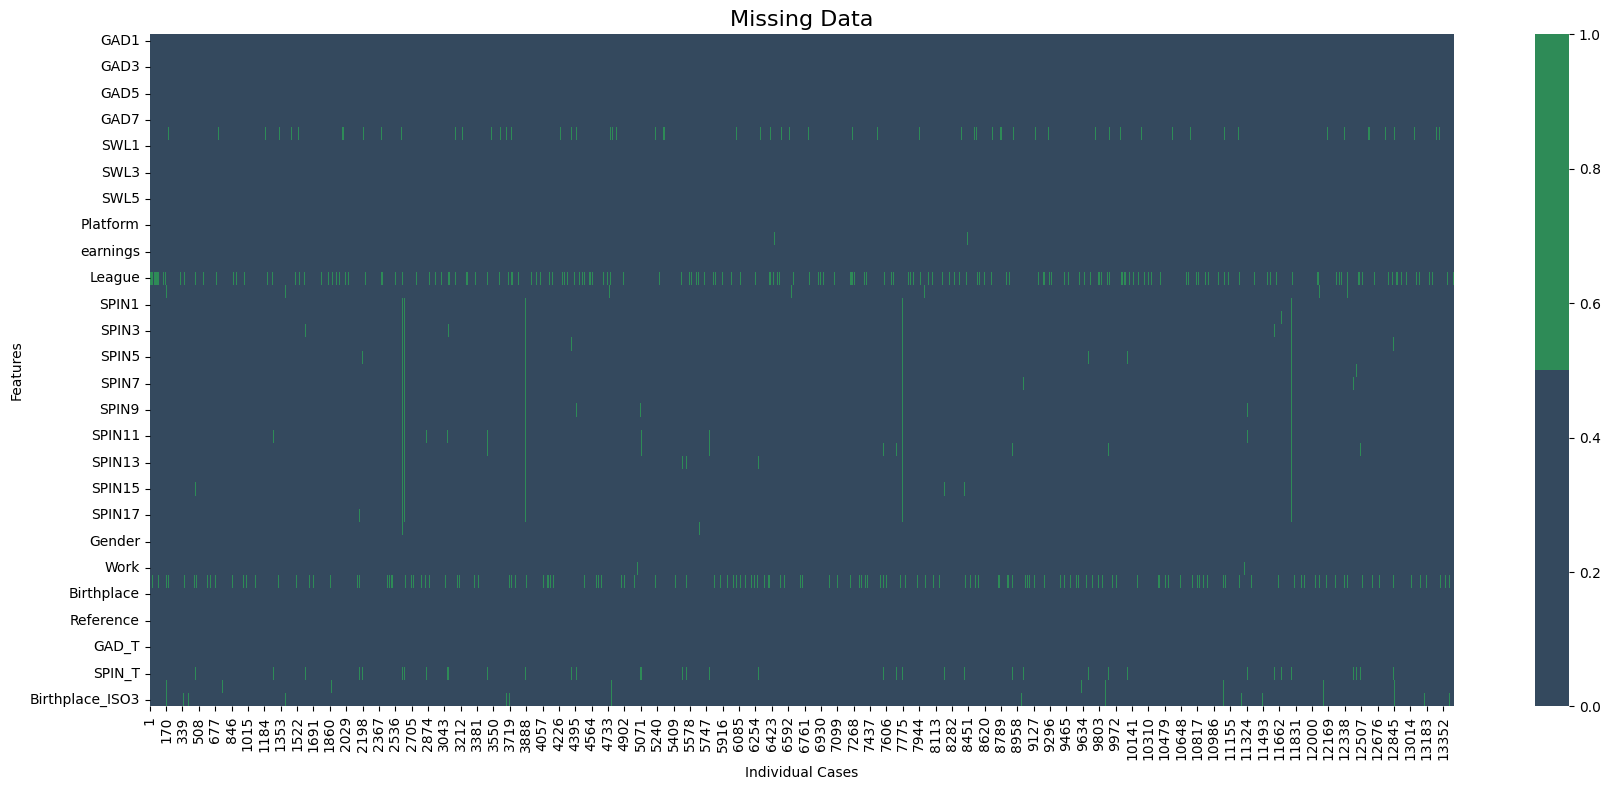

In [ ]:
# Create boolean mask of missing values
missing_matrix = df.isnull()

# Plot the missing_matrix
plt.figure(figsize=(18, 8))
sns.heatmap(df.isnull().T, cmap=['#34495E', 'seagreen'])
plt.title("Missing Data", fontsize=16)
plt.xlabel("Individual Cases")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("Missingdata_heatmap.pdf", format='pdf')
plt.show()

In [ ]:
# Calculate missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_percent = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_values_percent.round(2)})
missing_values_df = missing_summary[missing_summary['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)



missing_values_df

Missing Count  Missing Percentage
League                    1852               13.76
Degree                    1577               11.71
SPIN_T                     650                4.83
GADE                       649                4.82
SPIN13                     187                1.39
SPIN11                     187                1.39
SPIN17                     175                1.30
SPIN12                     168                1.25
SPIN5                      166                1.23
SPIN10                     160                1.19
SPIN4                      159                1.18
SPIN9                      158                1.17
SPIN14                     156                1.16
SPIN6                      156                1.16
SPIN2                      154                1.14
SPIN16                     147                1.09
SPIN15                     147                1.09
SPIN8                      144                1.07
SPIN3                      140                1.04
SPIN7                      138                1.02
SPIN1                      124                0.92
Birthplace_ISO3            121                0.90
Residence_ISO3             110                0.82
streams                    100                0.74
Work                        38                0.28
Hours                       30                0.22
Narcissism                  23                0.17
Reference                   15                0.11

In [ ]:
df.dtypes

GAD1                 int64
GAD2                 int64
GAD3                 int64
GAD4                 int64
GAD5                 int64
GAD6                 int64
GAD7                 int64
GADE                object
SWL1                 int64
SWL2                 int64
SWL3                 int64
SWL4                 int64
SWL5                 int64
Game                object
Platform            object
Hours              float64
earnings            object
whyplay             object
League              object
streams            float64
SPIN1              float64
SPIN2              float64
SPIN3              float64
SPIN4              float64
SPIN5              float64
SPIN6              float64
SPIN7              float64
SPIN8              float64
SPIN9              float64
SPIN10             float64
SPIN11             float64
SPIN12             float64
SPIN13             float64
SPIN14             float64
SPIN15             float64
SPIN16             float64
SPIN17             float64
Narcissism         float64
Gender              object
Age                  int64
Work                object
Degree              object
Birthplace          object
Residence           object
Reference           object
Playstyle           object
GAD_T                int64
SWL_T                int64
SPIN_T             float64
Residence_ISO3      object
Birthplace_ISO3     object
dtype: object

# DATA CLEANING

In [ ]:
# Handling missing data with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

numeric_df = df[numeric_cols].copy()
categorical_df = df[categorical_cols].copy()

# Initialize IterativeImputer for numeric features using RandomForestRegressor
num_imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, max_depth=5, random_state=0),max_iter=5, initial_strategy='median', random_state=0, skip_complete=True)
numeric_imputed = num_imputer.fit_transform(numeric_df)
df_numeric_imputed = pd.DataFrame(numeric_imputed, columns=numeric_df.columns)



In [ ]:
# MICE for categorical features
encoded_categorical_df = df[categorical_cols].copy()
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoded_data = encoder.fit_transform(encoded_categorical_df)
encoded_df = pd.DataFrame(encoded_data, columns=categorical_cols)

# Identify columns with missing values
cat_missing_mask = encoded_df.isna().sum() > 0
cat_missing_cols = cat_missing_mask[cat_missing_mask].index.tolist()
encoded_subset = encoded_df[cat_missing_cols]

# Imputer for categorical features
cat_imputer = IterativeImputer(
    estimator=RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0),
    max_iter=5,
    initial_strategy='most_frequent',
    random_state=0,
    skip_complete=True
)
encoded_subset_imputed = cat_imputer.fit_transform(encoded_subset)
encoded_df[cat_missing_cols] = encoded_subset_imputed

# Decode back to original categories
encoded_df = encoded_df.round().astype(int)
df_categorical_imputed = pd.DataFrame(encoder.inverse_transform(encoded_df), columns=categorical_cols)

# Combine final imputed dataset
df = pd.concat([df_numeric_imputed, df_categorical_imputed], axis=1)

# Final check for missing values
final_missing_check = df.isnull().sum()
final_missing_check


GAD1               0
GAD2               0
GAD3               0
GAD4               0
GAD5               0
GAD6               0
GAD7               0
SWL1               0
SWL2               0
SWL3               0
SWL4               0
SWL5               0
Hours              0
streams            0
SPIN1              0
SPIN2              0
SPIN3              0
SPIN4              0
SPIN5              0
SPIN6              0
SPIN7              0
SPIN8              0
SPIN9              0
SPIN10             0
SPIN11             0
SPIN12             0
SPIN13             0
SPIN14             0
SPIN15             0
SPIN16             0
SPIN17             0
Narcissism         0
Age                0
GAD_T              0
SWL_T              0
SPIN_T             0
GADE               0
Game               0
Platform           0
earnings           0
whyplay            0
League             0
Gender             0
Work               0
Degree             0
Birthplace         0
Residence          0
Reference          0
Playstyle          0
Residence_ISO3     0
Birthplace_ISO3    0
dtype: int64

In [ ]:
# Extract the imputed SPIN items from the final imputed dataset
spin_items = [f'SPIN{i}' for i in range(1, 18) if f'SPIN{i}' in df.columns]

# Recalculate SPIN_T by summing SPIN1 through SPIN17
df['SPIN_T'] = df[spin_items].sum(axis=1)

df[['SPIN_T'] + spin_items].head()

SPIN_T  SPIN1  SPIN2  SPIN3  SPIN4  SPIN5  SPIN6  SPIN7  SPIN8  SPIN9  \
0     5.0    1.0    0.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0   
1    33.0    2.0    1.0    1.0    3.0    2.0    3.0    1.0    3.0    4.0   
2    31.0    1.0    0.0    1.0    2.0    3.0    4.0    2.0    1.0    0.0   
3    11.0    2.0    0.0    0.0    1.0    3.0    0.0    0.0    0.0    0.0   
4    13.0    2.0    0.0    0.0    0.0    1.0    0.0    0.0    4.0    2.0   

   SPIN10  SPIN11  SPIN12  SPIN13  SPIN14  SPIN15  SPIN16  SPIN17  
0     0.0     0.0     0.0     0.0     1.0     0.0     1.0     0.0  
1     0.0     3.0     0.0     1.0     3.0     3.0     1.0     2.0  
2     1.0     1.0     3.0     0.0     2.0     4.0     4.0     2.0  
3     0.0     1.0     3.0     0.0     0.0     1.0     0.0     0.0  
4     0.0     1.0     0.0     0.0     0.0     0.0     3.0     0.0

In [ ]:
# Drop ("Birthplace" and "Residence") since we have them as "IS03"
df.drop(columns=['Birthplace', 'Residence'], inplace =True, errors='ignore')

In [ ]:
df.head()

GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  SWL1  SWL2  SWL3  SWL4  SWL5  \
0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   3.0   5.0   5.0   5.0   5.0   
1   1.0   2.0   2.0   2.0   0.0   1.0   0.0   3.0   5.0   2.0   5.0   1.0   
2   0.0   2.0   2.0   0.0   0.0   3.0   1.0   2.0   6.0   5.0   2.0   2.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0   5.0   5.0   3.0   2.0   
4   2.0   1.0   2.0   2.0   2.0   3.0   2.0   2.0   2.0   4.0   5.0   1.0   

   Hours  streams  SPIN1  SPIN2  SPIN3  SPIN4  SPIN5  SPIN6  SPIN7  SPIN8  \
0   15.0      0.0    1.0    0.0    0.0    1.0    0.0    0.0    1.0    0.0   
1    8.0      2.0    2.0    1.0    1.0    3.0    2.0    3.0    1.0    3.0   
2    0.0      0.0    1.0    0.0    1.0    2.0    3.0    4.0    2.0    1.0   
3   20.0      5.0    2.0    0.0    0.0    1.0    3.0    0.0    0.0    0.0   
4   20.0      1.0    2.0    0.0    0.0    0.0    1.0    0.0    0.0    4.0   

   SPIN9  SPIN10  SPIN11  SPIN12  SPIN13  SPIN14  SPIN15  SPIN16  SPIN17  \
0    0.0     0.0     0.0     0.0     0.0     1.0     0.0     1.0     0.0   
1    4.0     0.0     3.0     0.0     1.0     3.0     3.0     1.0     2.0   
2    0.0     1.0     1.0     3.0     0.0     2.0     4.0     4.0     2.0   
3    0.0     0.0     1.0     3.0     0.0     0.0     1.0     0.0     0.0   
4    2.0     0.0     1.0     0.0     0.0     0.0     0.0     3.0     0.0   

   Narcissism   Age  GAD_T  SWL_T  SPIN_T                  GADE    Game  \
0         1.0  25.0    1.0   23.0     5.0  Not difficult at all  Skyrim   
1         1.0  41.0    8.0   16.0    33.0    Somewhat difficult   Other   
2         4.0  32.0    8.0   17.0    31.0  Not difficult at all   Other   
3         2.0  28.0    0.0   17.0    11.0  Not difficult at all   Other   
4         1.0  19.0   14.0   14.0    13.0        Very difficult   Other   

                  Platform        earnings     whyplay   League  Gender  \
0  Console (PS, Xbox, ...)  I play for fun  having fun     Gold    Male   
1                       PC  I play for fun  having fun     Gold    Male   
2                       PC  I play for fun  having fun     Gold  Female   
3                       PC  I play for fun   improving     Gold    Male   
4  Console (PS, Xbox, ...)  I play for fun  having fun  Rank 15    Male   

                        Work                               Degree Reference  \
0  Unemployed / between jobs             Bachelor (or equivalent)    Reddit   
1  Unemployed / between jobs             Bachelor (or equivalent)    Reddit   
2                   Employed             Bachelor (or equivalent)    Reddit   
3                   Employed             Bachelor (or equivalent)    Reddit   
4                   Employed  High school diploma (or equivalent)    Reddit   

                                                       Playstyle  \
0                                                   Singleplayer   
1                          Multiplayer - online - with strangers   
2                                                   Singleplayer   
3  Multiplayer - online - with online acquaintances or teammates   
4                          Multiplayer - online - with strangers   

  Residence_ISO3 Birthplace_ISO3  
0            USA             USA  
1            USA             USA  
2            DEU             DEU  
3            USA             USA  
4            KOR             USA

In [ ]:
df.shape

(13464, 49)

In [ ]:
#Filtering
#Handling Residence
top_countries = df['Residence_ISO3'].value_counts()[df['Residence_ISO3'].value_counts() >= 50].index
df['Residence_ISO3'] = df['Residence_ISO3'].apply(lambda x: x if x in top_countries else 'Other')
top_countries_birth = df['Birthplace_ISO3'].value_counts()[df['Birthplace_ISO3'].value_counts() >= 50].index
df['Birthplace_ISO3'] = df['Birthplace_ISO3'].apply(lambda x: x if x in top_countries_birth else 'Other')


# EDA

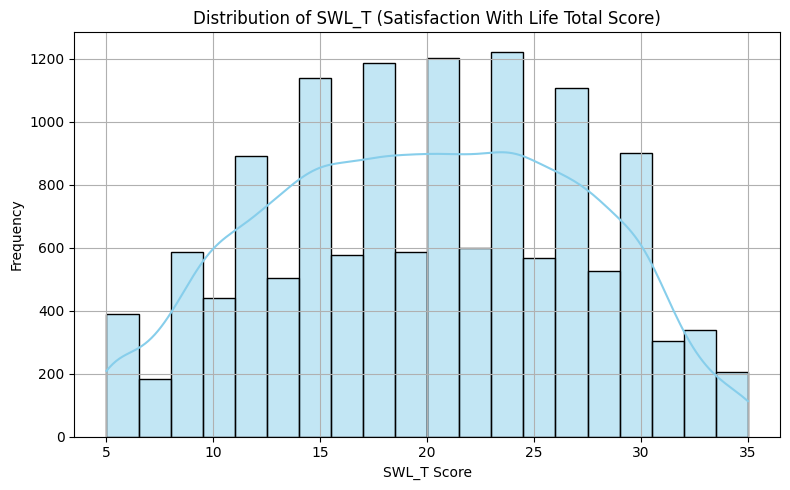

In [ ]:
# Distribution of SWL_T
plt.figure(figsize=(8, 5))
sns.histplot(df['SWL_T'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of SWL_T (Satisfaction With Life Total Score)')
plt.xlabel('SWL_T Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.savefig("SWL_T_distribution.pdf", format='pdf')
plt.show()

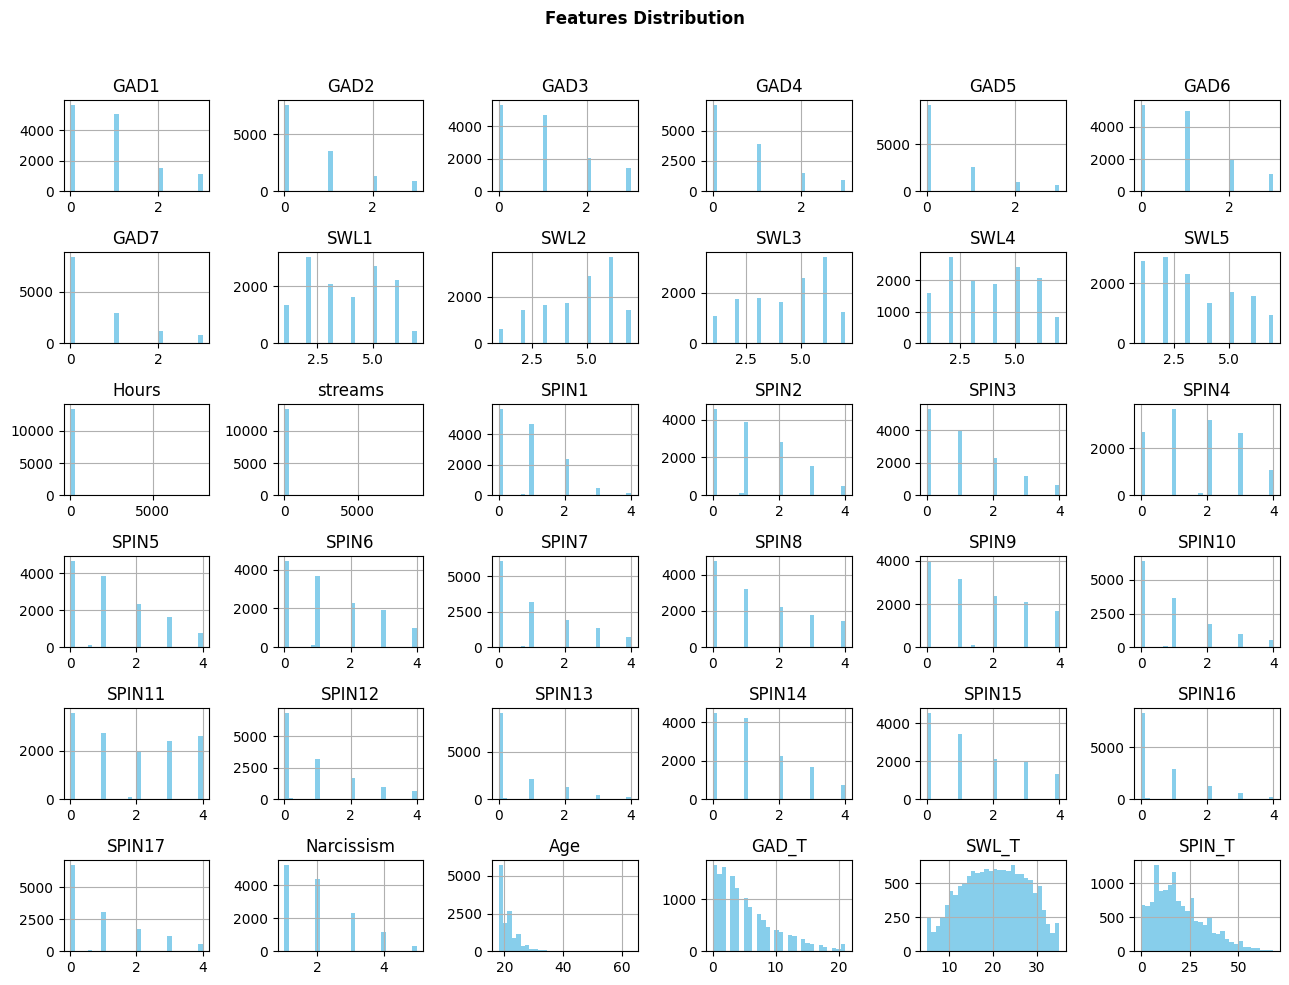

In [ ]:
# Distribution of all the features
df.hist(figsize=(13,10), bins=30, color='skyblue')
plt.suptitle("Features Distribution", fontsize =12, fontweight= 'bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("Features_distribution.pdf", format='pdf')
plt.show()

In [ ]:
summary_stats = df.describe(include='all')
summary_stats

GAD1          GAD2          GAD3          GAD4          GAD5  \
count   13464.000000  13464.000000  13464.000000  13464.000000  13464.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.860963      0.673351      0.965761      0.724079      0.488042   
std         0.926542      0.915724      0.982776      0.921971      0.837014   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000      0.000000      0.000000      0.000000      0.000000   
50%         1.000000      0.000000      1.000000      0.000000      0.000000   
75%         1.000000      1.000000      2.000000      1.000000      1.000000   
max         3.000000      3.000000      3.000000      3.000000      3.000000   

                GAD6          GAD7          SWL1          SWL2         SWL3  \
count   13464.000000  13464.000000  13464.000000  13464.000000  13464.00000   
unique           NaN           NaN           NaN           NaN          NaN   
top              NaN           NaN           NaN           NaN          NaN   
freq             NaN           NaN           NaN           NaN          NaN   
mean        0.911022      0.588755      3.720440      4.602050      4.34544   
std         0.931168      0.894408      1.736264      1.696276      1.80943   
min         0.000000      0.000000      1.000000      1.000000      1.00000   
25%         0.000000      0.000000      2.000000      3.000000      3.00000   
50%         1.000000      0.000000      4.000000      5.000000      5.00000   
75%         1.000000      1.000000      5.000000      6.000000      6.00000   
max         3.000000      3.000000      7.000000      7.000000      7.00000   

                SWL4          SWL5         Hours       streams         SPIN1  \
count   13464.000000  13464.000000  13464.000000  13464.000000  13464.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        3.762032      3.358883     22.251153     11.231619      0.855338   
std         1.818136      1.916319     70.206538     78.257123      0.903354   
min         1.000000      1.000000      0.000000      0.000000      0.000000   
25%         2.000000      2.000000     12.000000      4.000000      0.000000   
50%         4.000000      3.000000     20.000000      8.000000      1.000000   
75%         5.000000      5.000000     28.000000     15.000000      1.000000   
max         7.000000      7.000000   8000.000000   9001.000000      4.000000   

               SPIN2         SPIN3         SPIN4         SPIN5         SPIN6  \
count   13464.000000  13464.000000  13464.000000  13464.000000  13464.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        1.209050      1.094755      1.684374      1.244118      1.344456   
std         1.138225      1.159522      1.222942      1.216883      1.272886   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000      0.000000      1.000000      0.000000      0.000000   
50%         1.000000      1.000000      2.000000      1.000000      1.000000   
75%         2.000000      2.000000      3.000000      2.000000      2.000000   
max         4.000000      4.000000      4.000000      4.000000      4.000000   

               SPIN7         SPIN8         SPIN9        SPIN10        SPIN11  \
count   13464.000000  13464.000000  13464.000000  13464.000000  13464.000000   
unique           NaN    

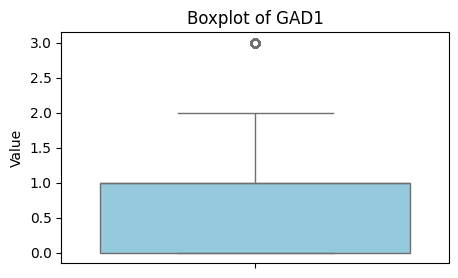

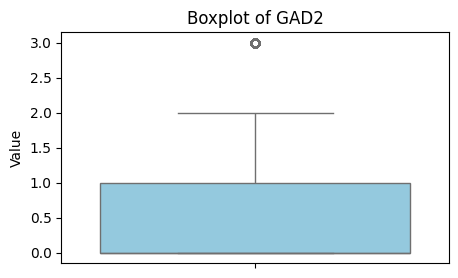

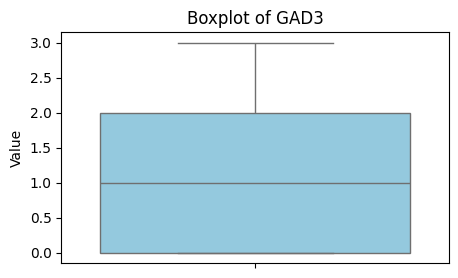

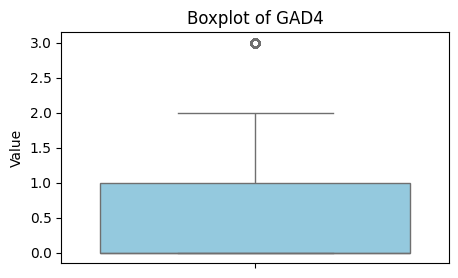

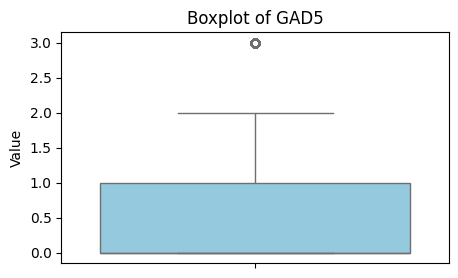

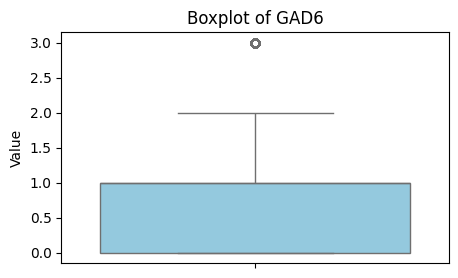

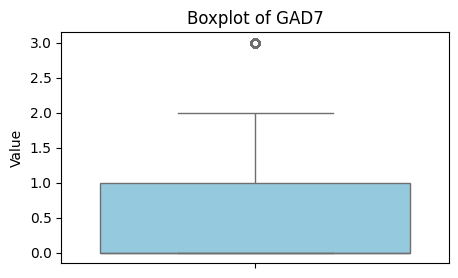

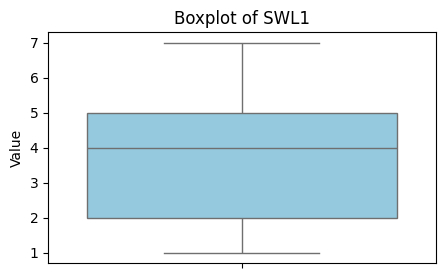

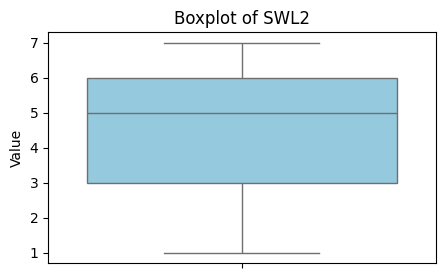

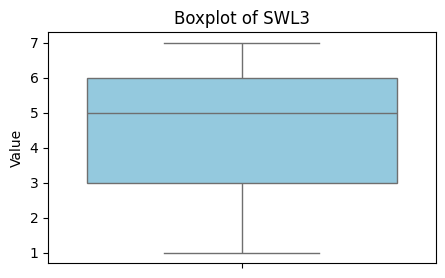

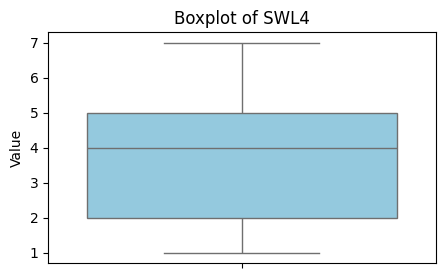

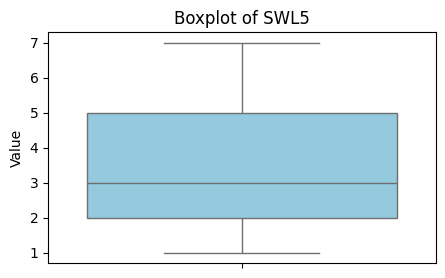

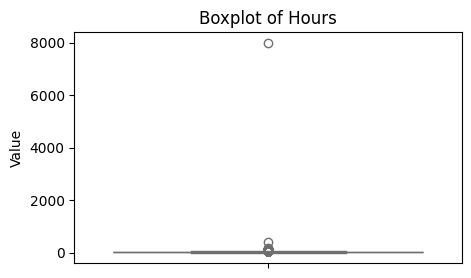

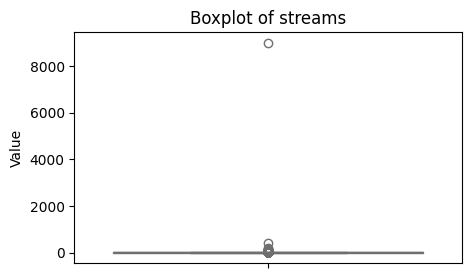

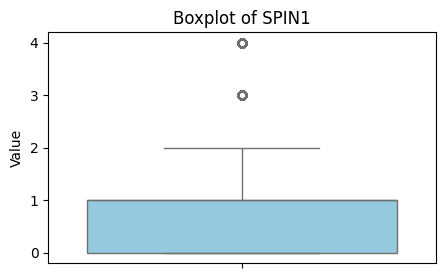

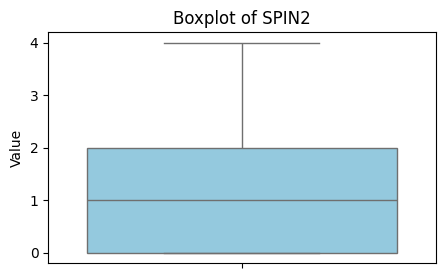

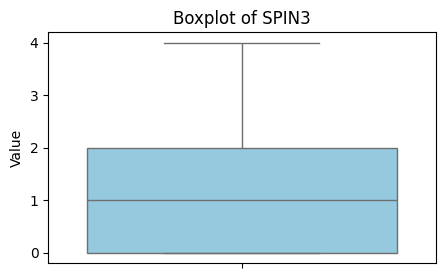

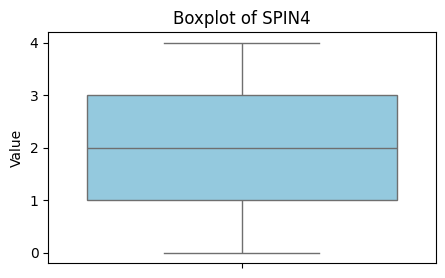

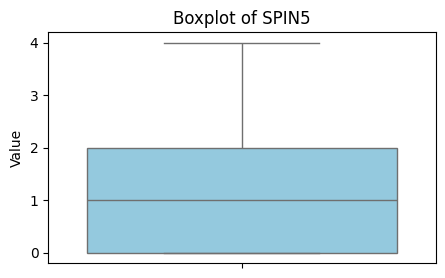

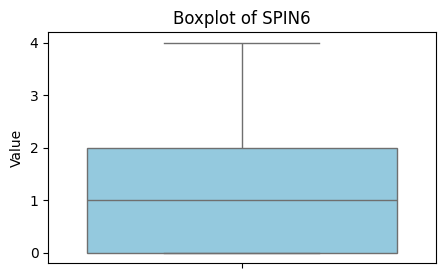

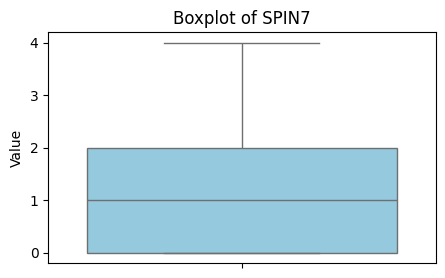

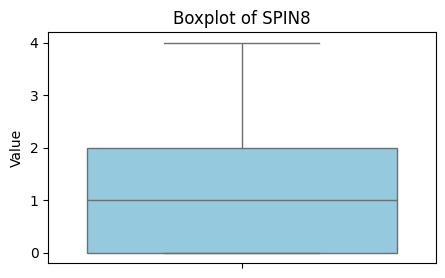

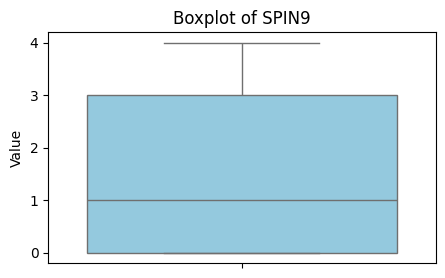

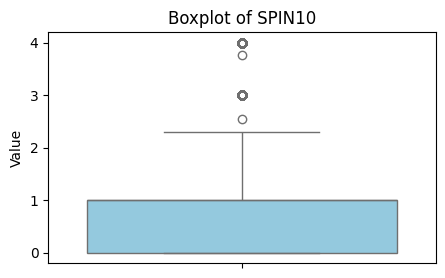

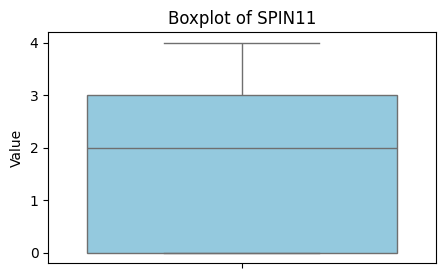

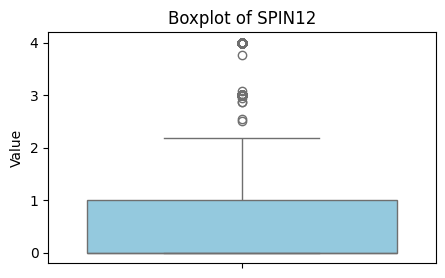

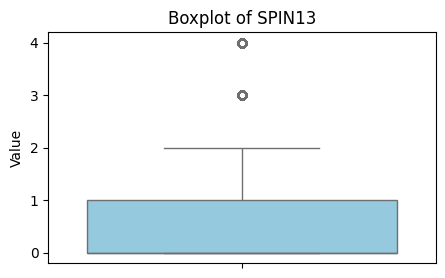

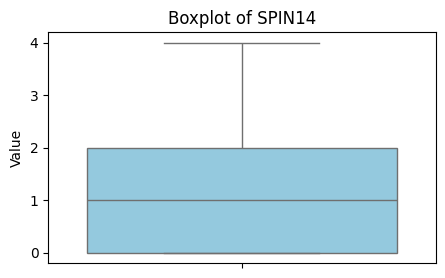

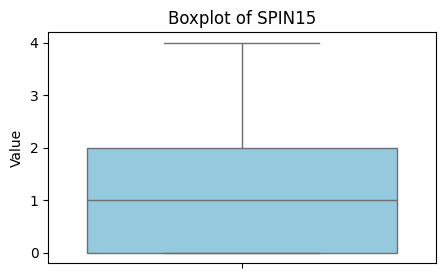

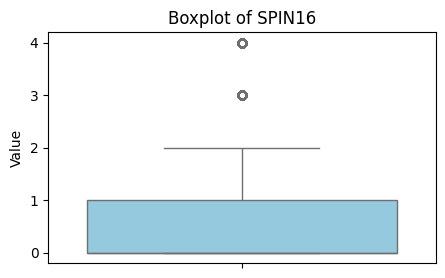

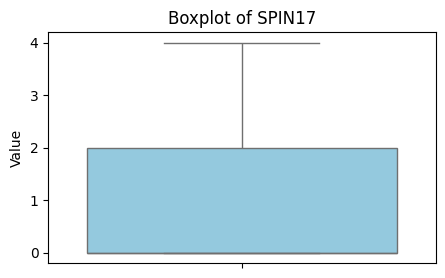

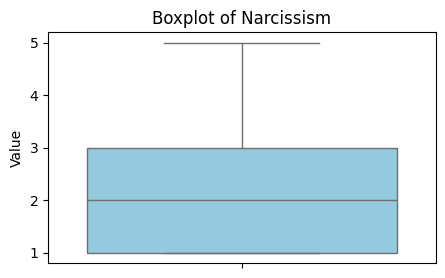

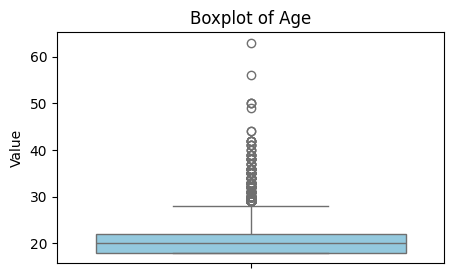

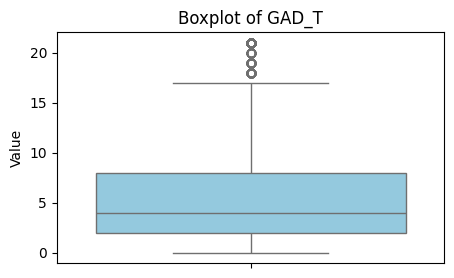

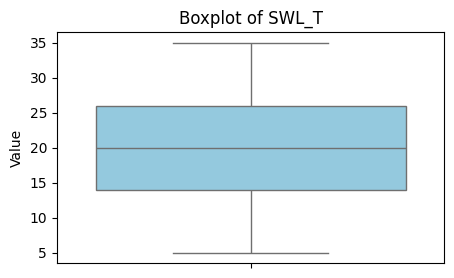

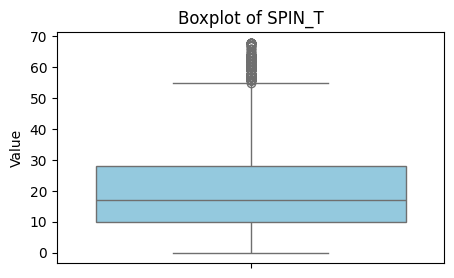

In [ ]:
# Plot boxplots for numerical features
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols
for col in numerical_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.ylabel("Value")
    plt.show()

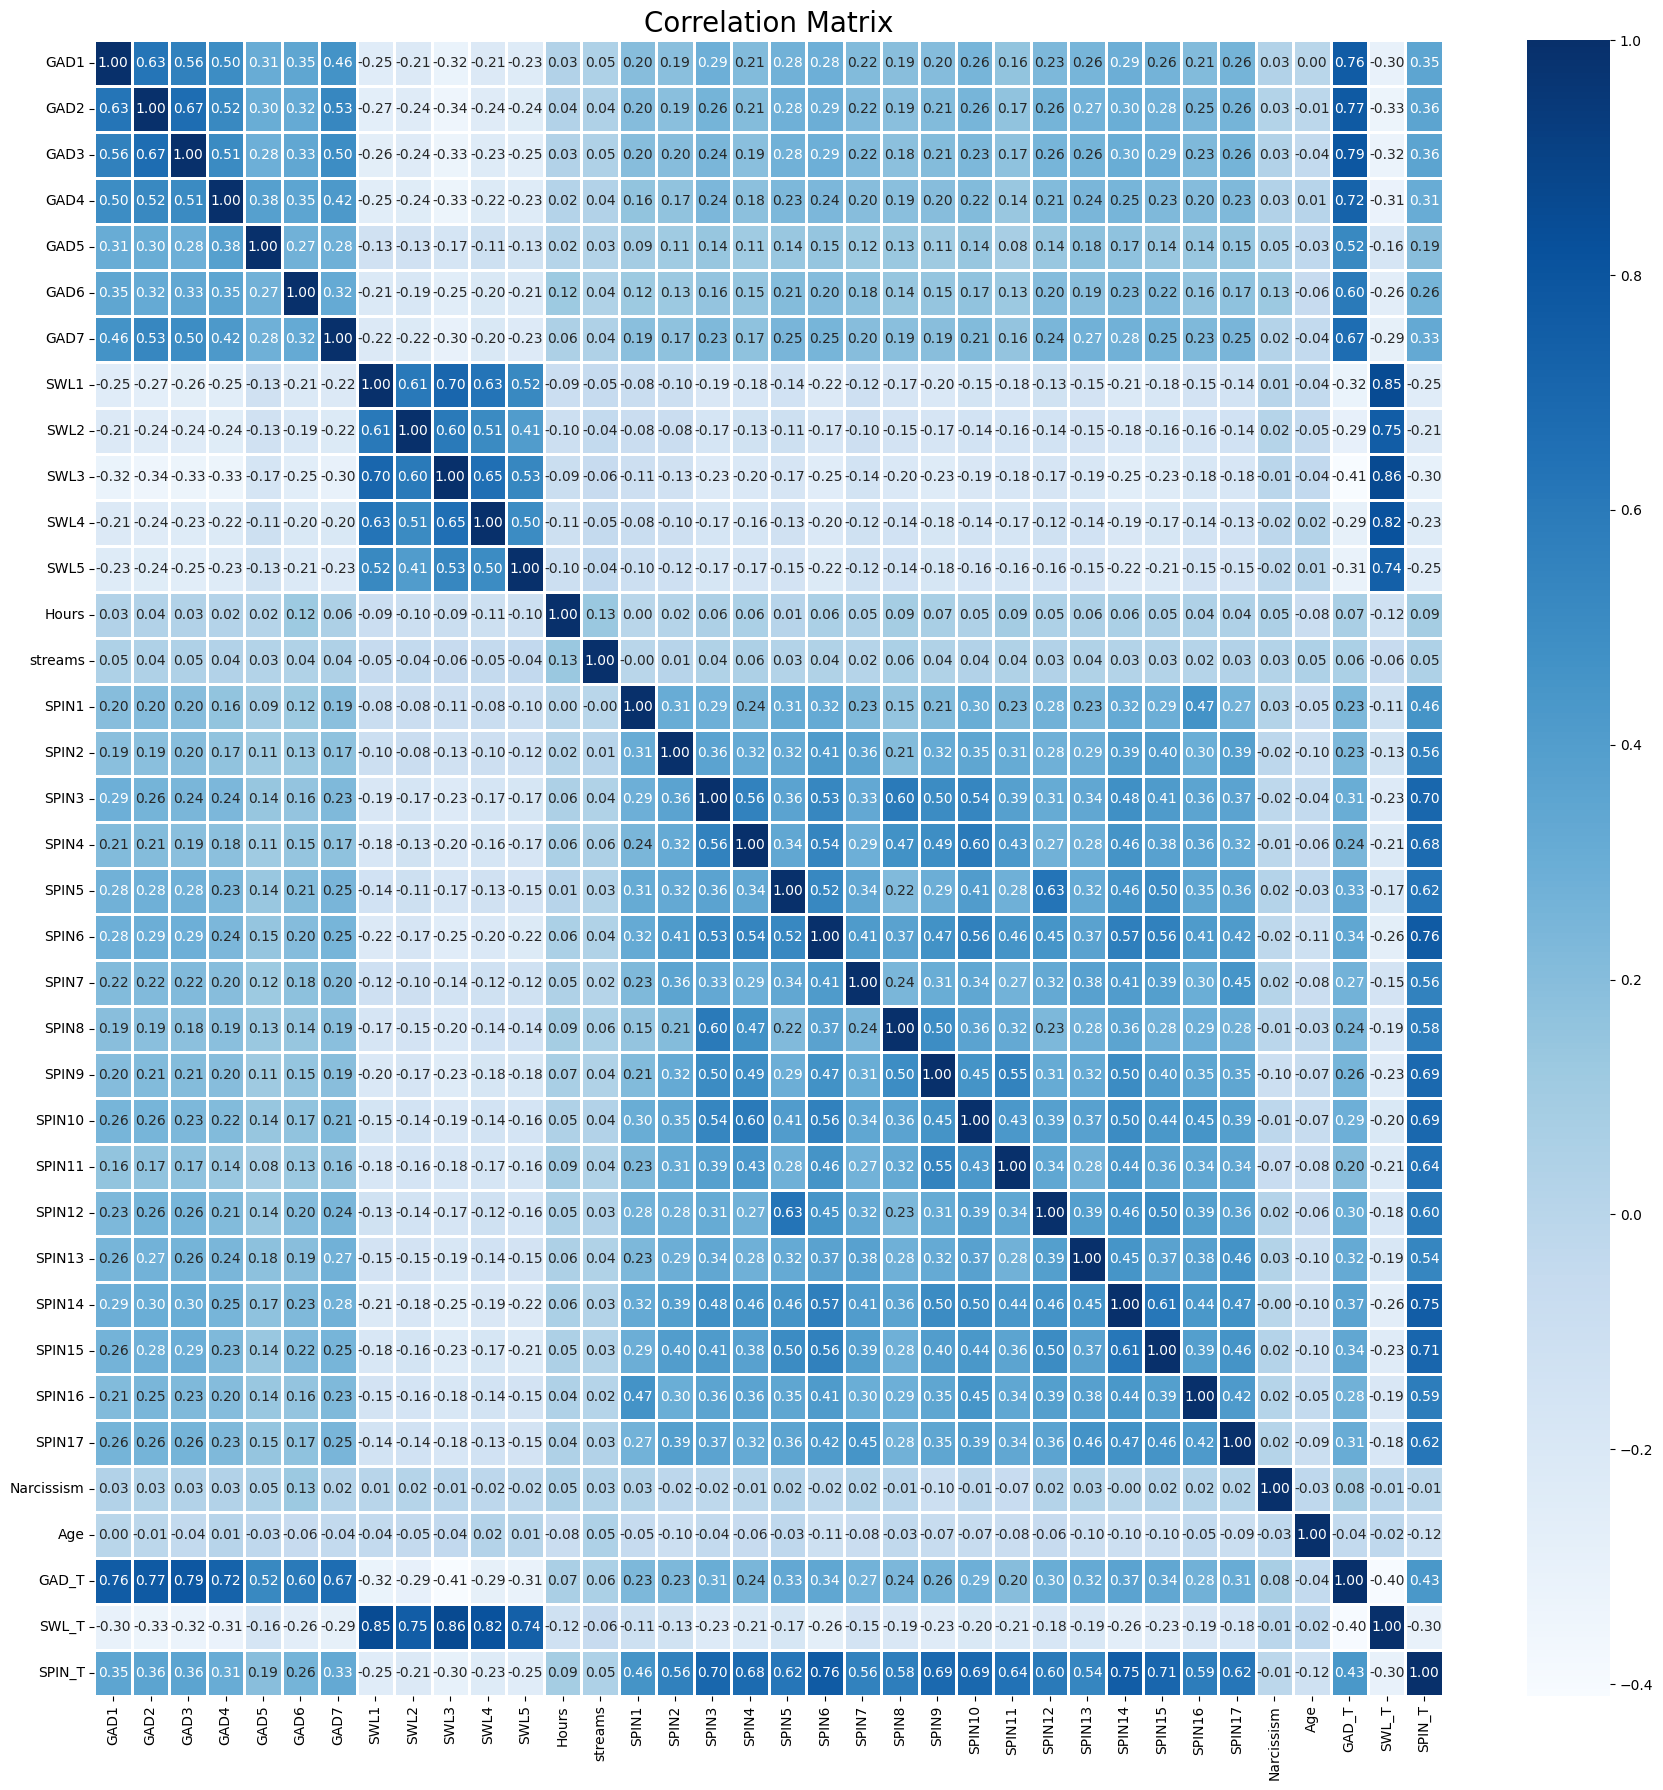

In [ ]:
# Compute Spearman correlation
numeric_df = df.select_dtypes(include='number')


corr = numeric_df.corr(method='spearman')
# Plot the heatmap
plt.figure(figsize=(18, 18))
cormat = sns.heatmap(
    corr,
    annot=True,
    cmap='Blues',
    linewidths=1,
    fmt=".2f"
)
cormat.set_title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig("Correlation_matrix.pdf", format='pdf')
plt.show()


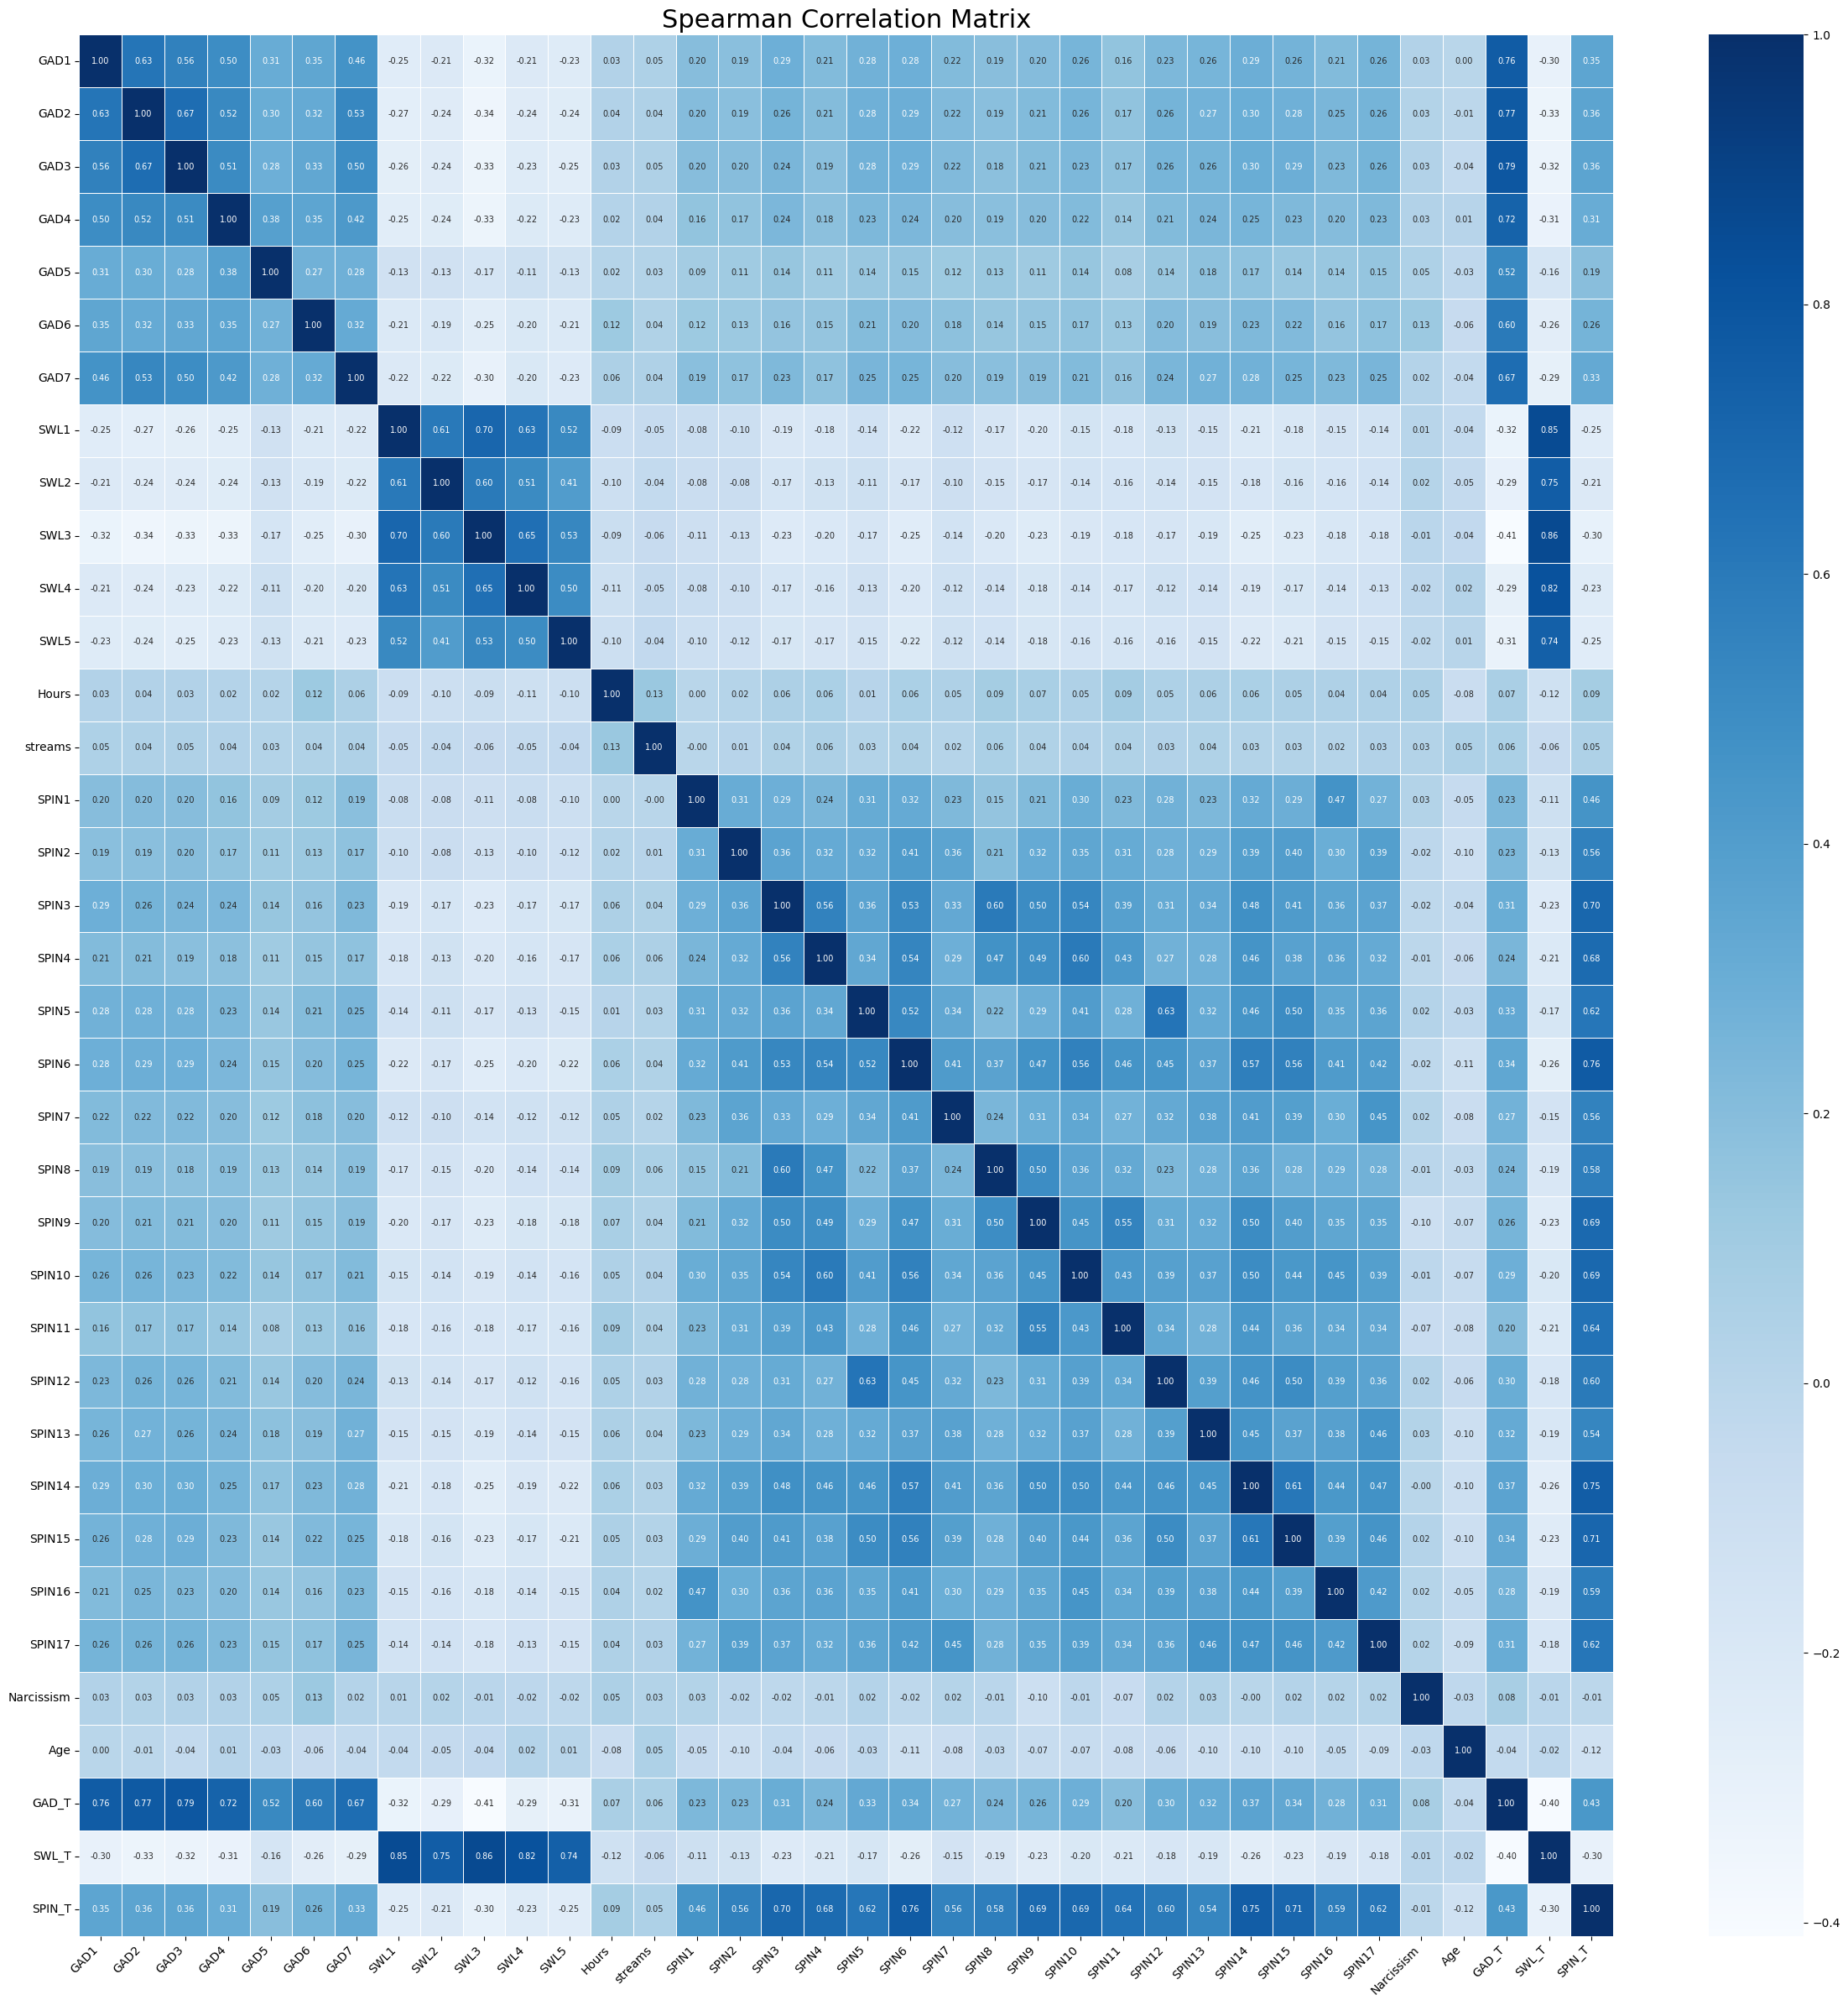

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Spearman correlation
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr(method='spearman')

# Larger heatmap with bigger fonts
plt.figure(figsize=(24, 24))  # increase size
cormat = sns.heatmap(
    corr,
    annot=True,
    cmap='Blues',
    linewidths=0.5,
    fmt=".2f",
    annot_kws={"size": 7}  # smaller numbers to prevent overlap
)
cormat.set_title('Spearman Correlation Matrix', fontsize=22)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig("Improved_Correlation_Matrix.pdf", format='pdf')
plt.show()


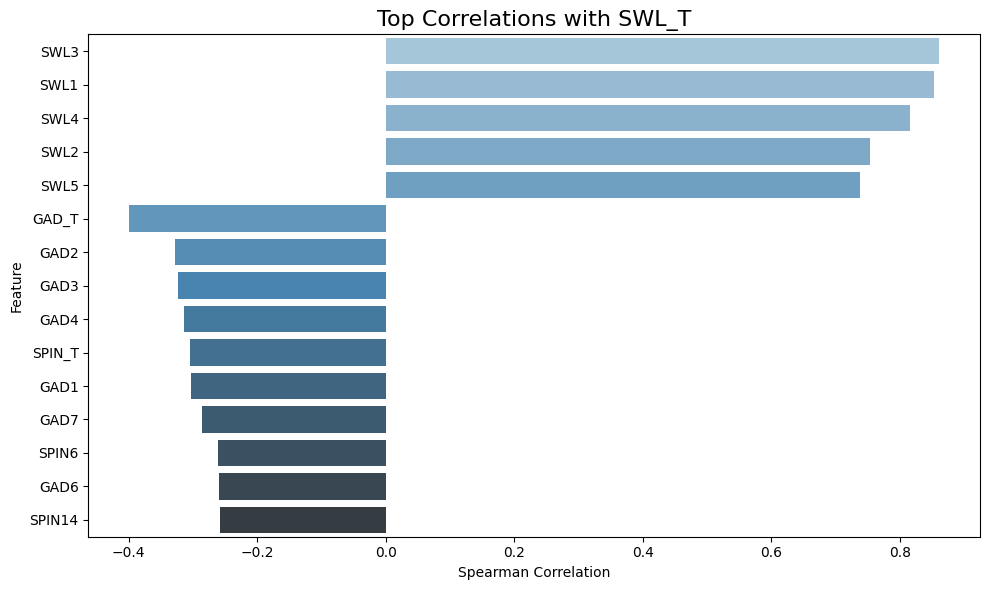

In [ ]:
target = 'SWL_T'

# Calculate correlation with target only
correlations = corr[target].drop(target).sort_values(key=abs, ascending=False)

# Plot top 15 correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values[:15], y=correlations.index[:15], palette='Blues_d')
plt.title(f'Top Correlations with {target}', fontsize=16)
plt.xlabel('Spearman Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig("Top_Correlations_with_SWL_T.pdf", format='pdf')
plt.show()


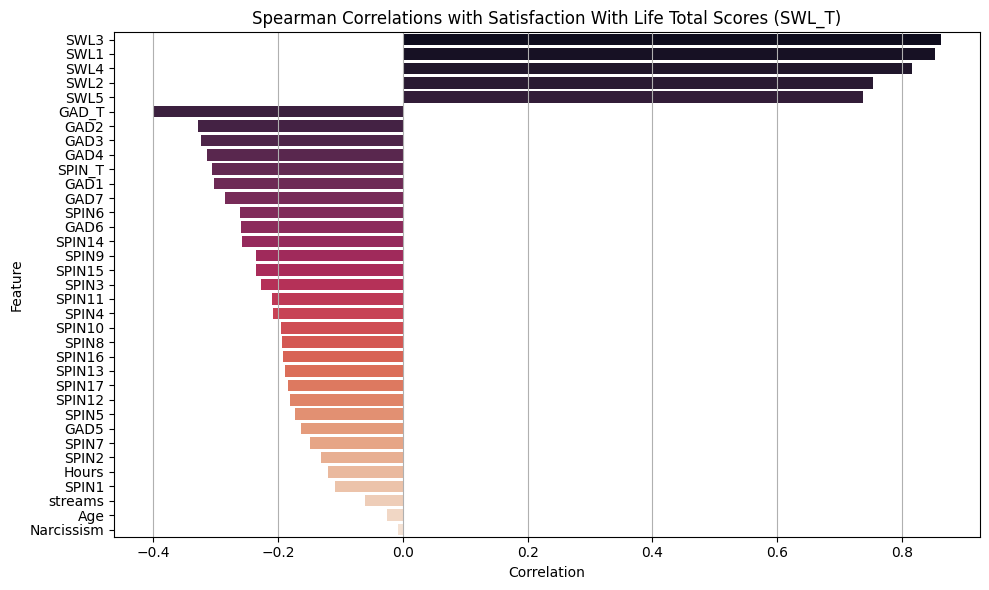

In [ ]:
# Extract and sort only the correlations with SWL_T
swl_corr = numeric_df.corr(method='spearman')['SWL_T'].drop('SWL_T').sort_values(key=abs, ascending=False)

# Create a focused barplot for top correlations with SWL_T
plt.figure(figsize=(10, 6))
sns.barplot(x=swl_corr.values, y=swl_corr.index, palette='rocket')
plt.title('Spearman Correlations with Satisfaction With Life Total Scores (SWL_T)')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.grid(True, axis='x')
plt.tight_layout()
plt.savefig("Spearman_correlations_withSWL_T.pdf", format='pdf')
plt.show()


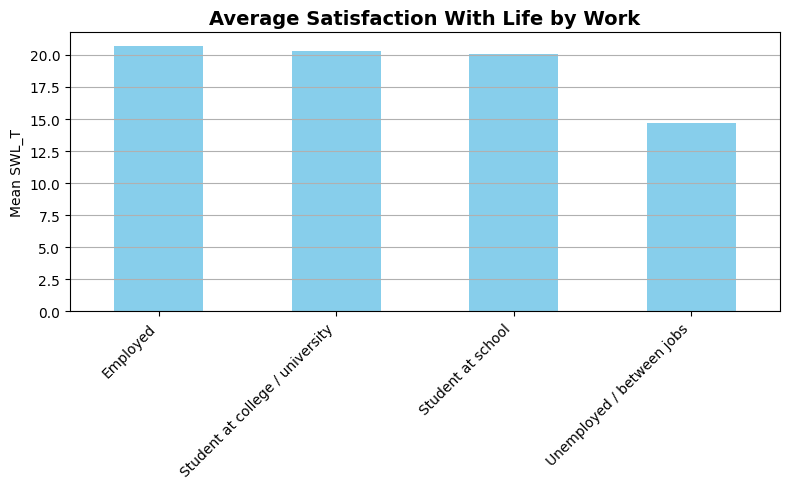

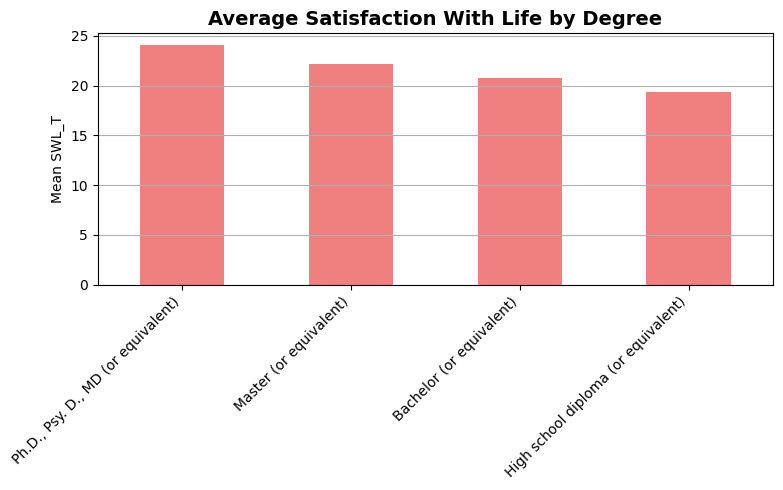

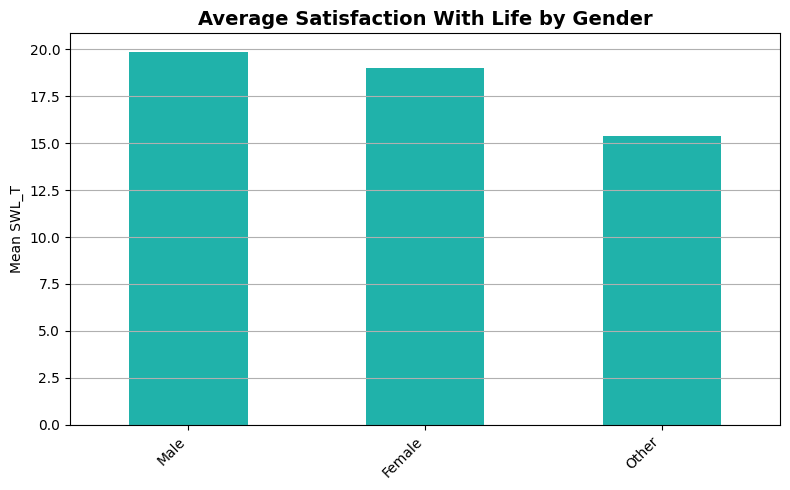

In [ ]:
import matplotlib.pyplot as plt

labels = ['Work', 'Degree', 'Gender']
score = 'SWL_T'
title_prefix = 'Average Satisfaction With Life'

# Define a custom color per variable
colors = {
    'Work': 'skyblue',
    'Degree': 'lightcoral',
    'Gender': 'lightseagreen'
}

for col in labels:
    plt.figure(figsize=(8, 5))
    group_means = df.groupby(col)[score].mean().sort_values(ascending=False).head(10)
    group_means.plot(kind='bar', color=colors[col])
    plt.title(f'{title_prefix} by {col}', fontsize=14, fontweight='bold')
    plt.ylabel(f'Mean {score}')
    plt.xlabel('')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.savefig(f'{title_prefix.replace(" ", "_")}_by_{col}.pdf', format='pdf')
    plt.show()


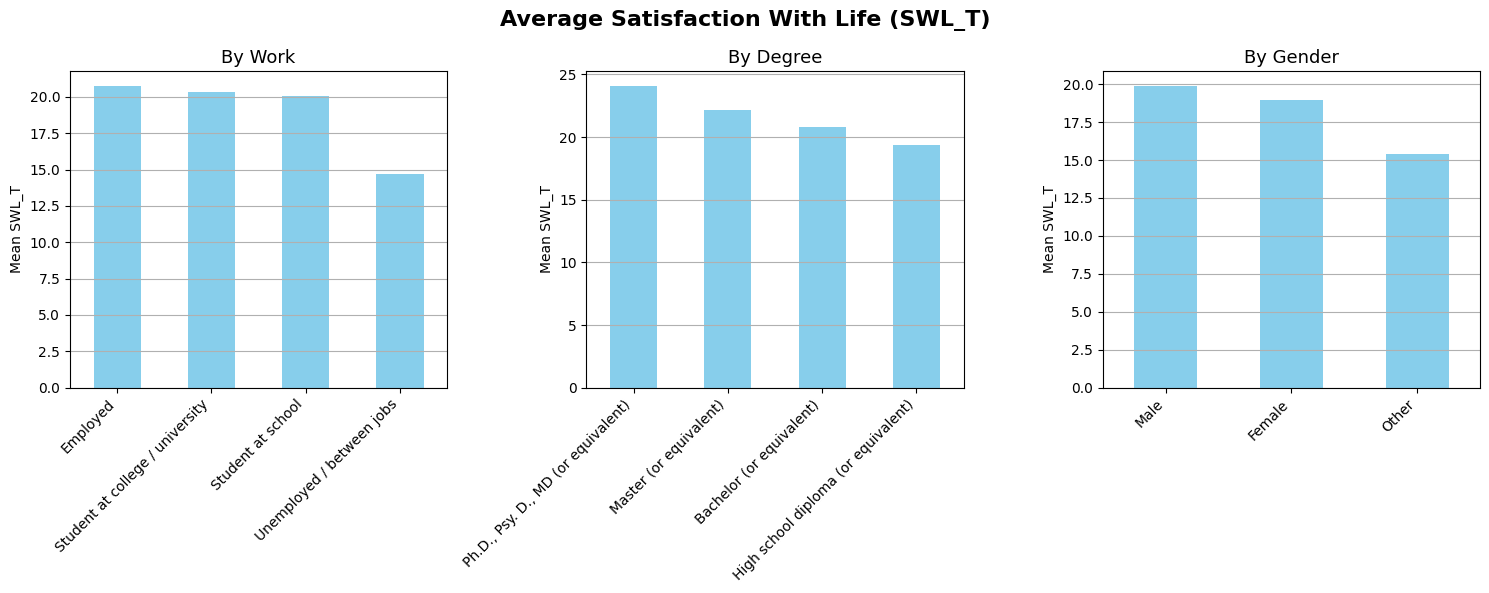

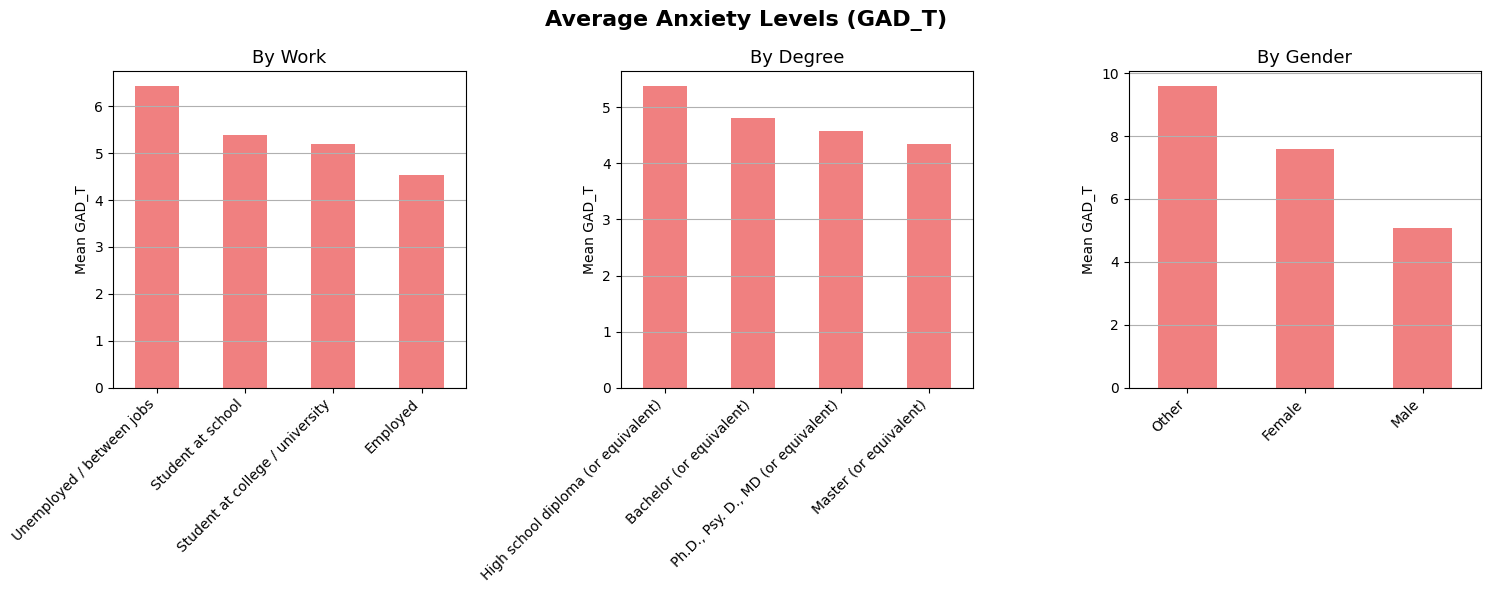

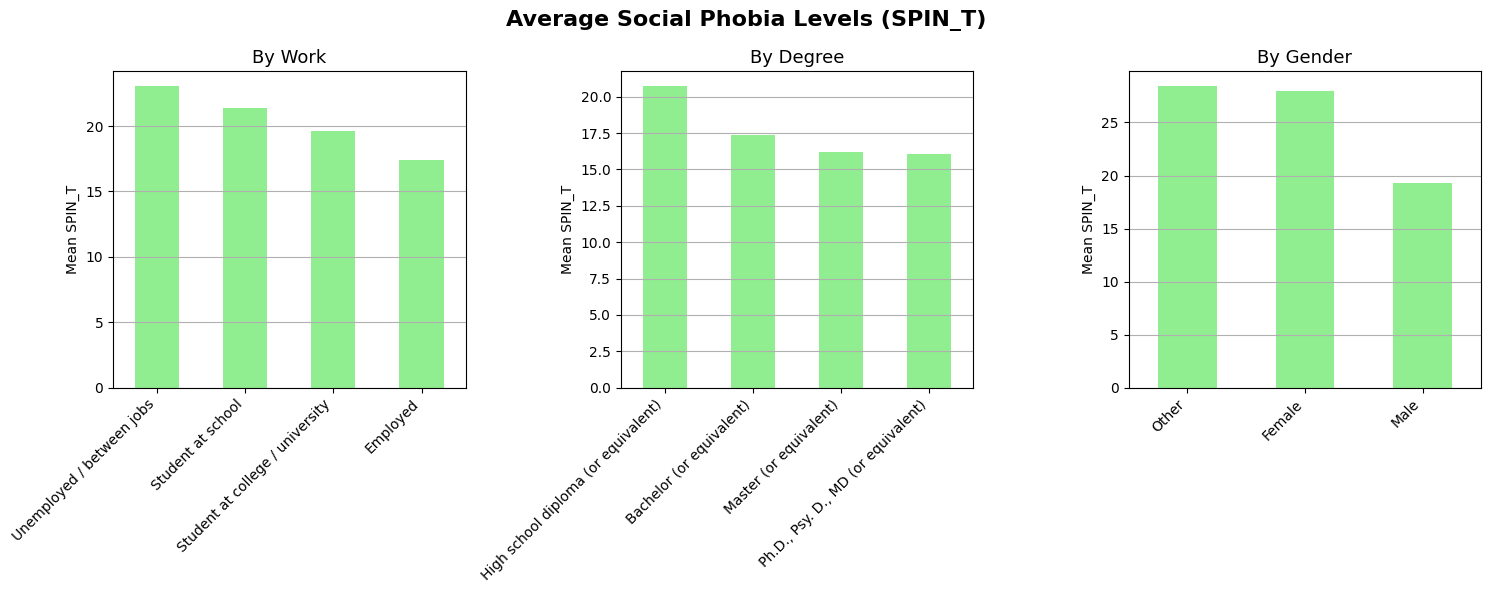

In [ ]:
# Plotting average SWL_T, GAD_T, SPIN_T for 'Work', 'Degree', 'Gender'
labels = ['Work', 'Degree', 'Gender']

plt.figure(figsize=(15, 6))
plt.suptitle('Average Satisfaction With Life (SWL_T)', fontsize=16, fontweight='bold')

for count, col in enumerate(labels, 1):
    plt.subplot(1, 3, count)
    group_means = df.groupby(col)['SWL_T'].mean().sort_values(ascending=False).head(10)
    group_means.plot(kind='bar', color='skyblue')
    plt.title(f'By {col}', fontsize=13)
    plt.xlabel('')
    plt.ylabel('Mean SWL_T')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.savefig("Average_SWL_T_by_Work_Degree_Gender.pdf", format='pdf')

plt.show()



plt.figure(figsize=(15, 6))
plt.suptitle('Average Anxiety Levels (GAD_T)', fontsize=16, fontweight='bold')

for count, col in enumerate(labels, 1):
    plt.subplot(1, 3, count)
    group_means = df.groupby(col)['GAD_T'].mean().sort_values(ascending=False).head(10)
    group_means.plot(kind='bar', color='lightcoral')
    plt.title(f'By {col}', fontsize=13)
    plt.xlabel('')
    plt.ylabel('Mean GAD_T')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.savefig("Average_GAD_T_by_Work_Degree_Gender.pdf", format='pdf')

plt.show()




plt.figure(figsize=(15, 6))
plt.suptitle('Average Social Phobia Levels (SPIN_T)', fontsize=16, fontweight='bold')

for count, col in enumerate(labels, 1):
    plt.subplot(1, 3, count)
    group_means = df.groupby(col)['SPIN_T'].mean().sort_values(ascending=False).head(10)
    group_means.plot(kind='bar', color='lightgreen')
    plt.title(f'By {col}', fontsize=13)
    plt.xlabel('')
    plt.ylabel('Mean SPIN_T')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.savefig("Average_SPIN_T_by_Work_Degree_Gender.pdf", format='pdf')

plt.show()

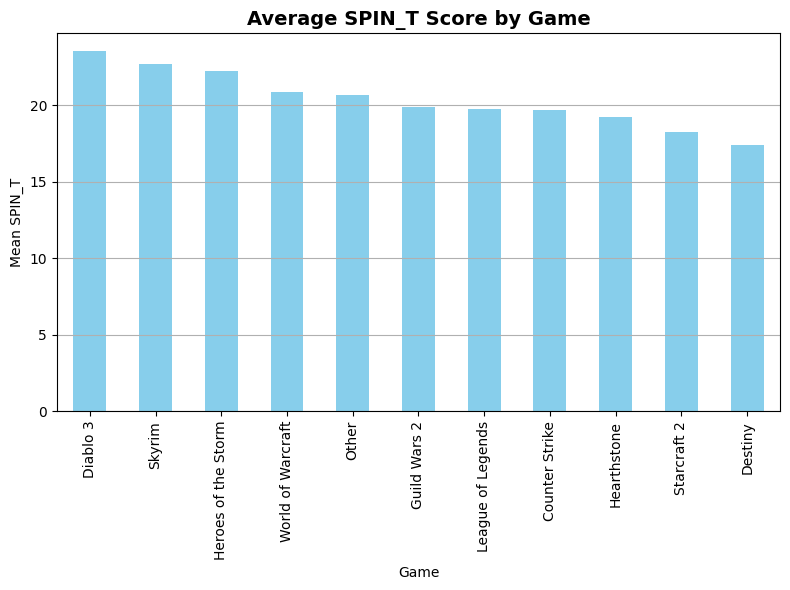

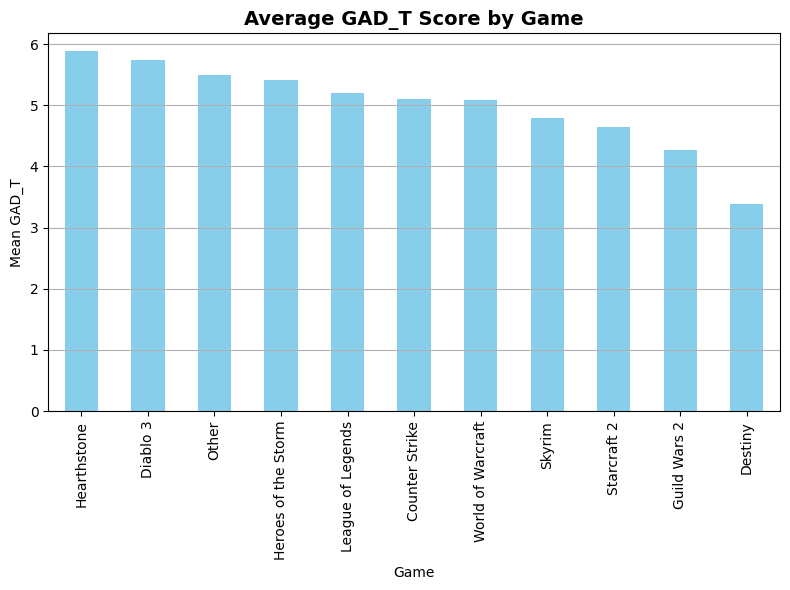

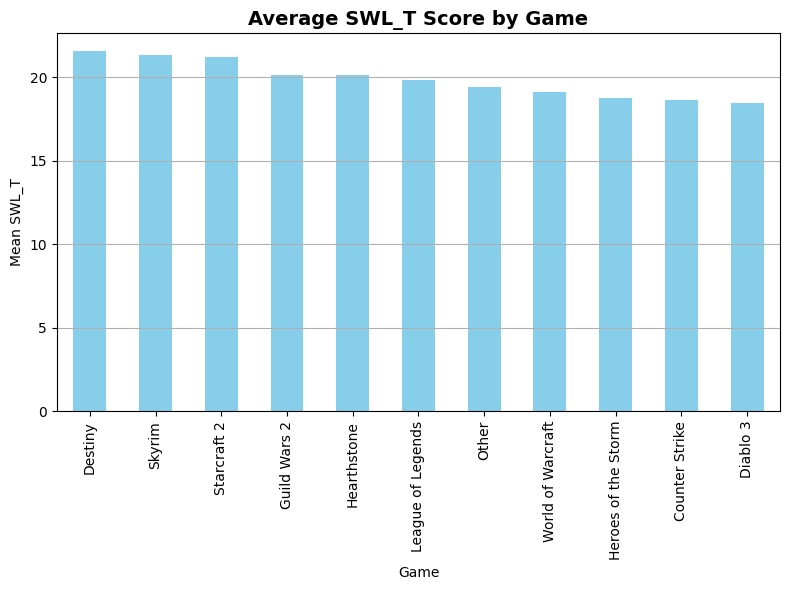

In [ ]:

labels = ['SPIN_T', 'GAD_T', 'SWL_T']

for score in labels:
    plt.figure(figsize=(8, 6))
    game_means = df.groupby('Game')[score].mean().sort_values(ascending=False)
    game_means.plot(kind='bar', color='skyblue')
    plt.title(f'Average {score} Score by Game', fontsize=14, fontweight='bold')
    plt.ylabel(f'Mean {score}')
    plt.xticks(rotation=90)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.savefig(f"Average_{score}_by_Game.pdf", format='pdf')
    plt.show()


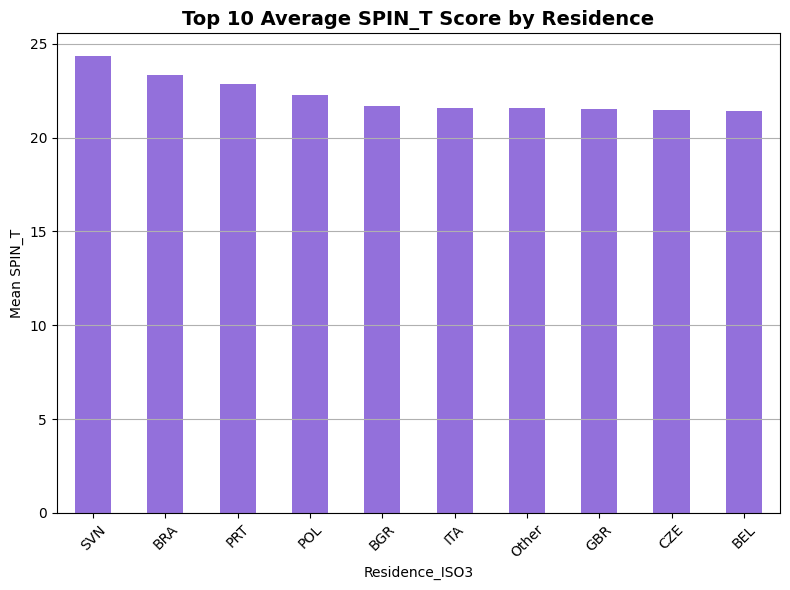

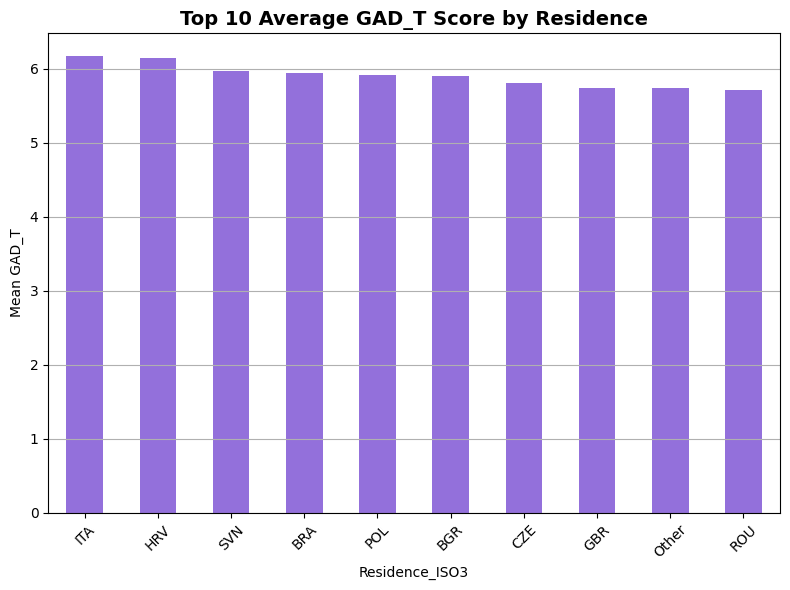

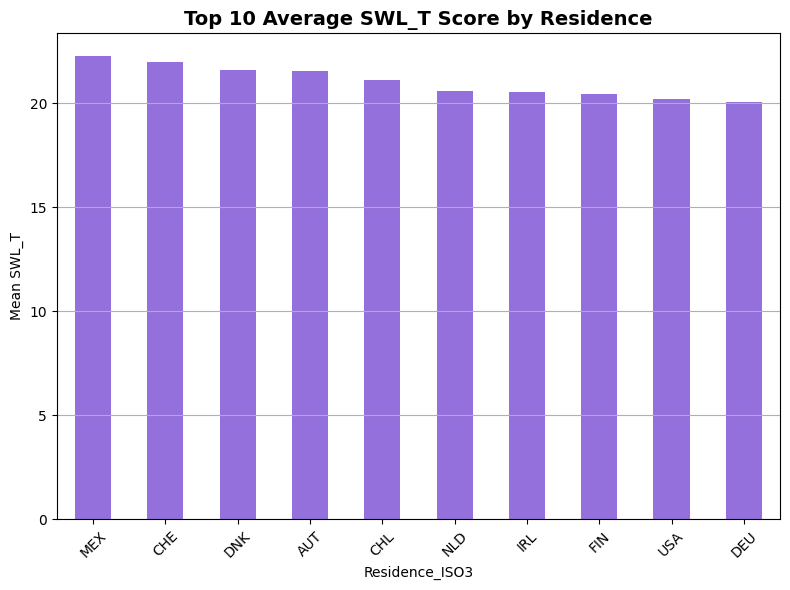

In [ ]:
for score in labels:
    plt.figure(figsize=(8, 6))
    res_means = df.groupby('Residence_ISO3')[score].mean().sort_values(ascending=False).head(10)
    res_means.plot(kind='bar', color='mediumpurple')
    plt.title(f'Top 10 Average {score} Score by Residence', fontsize=14, fontweight='bold')
    plt.ylabel(f'Mean {score}')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.savefig(f"Top10_Average_{score}_by_Residence.pdf", format='pdf')
    plt.show()


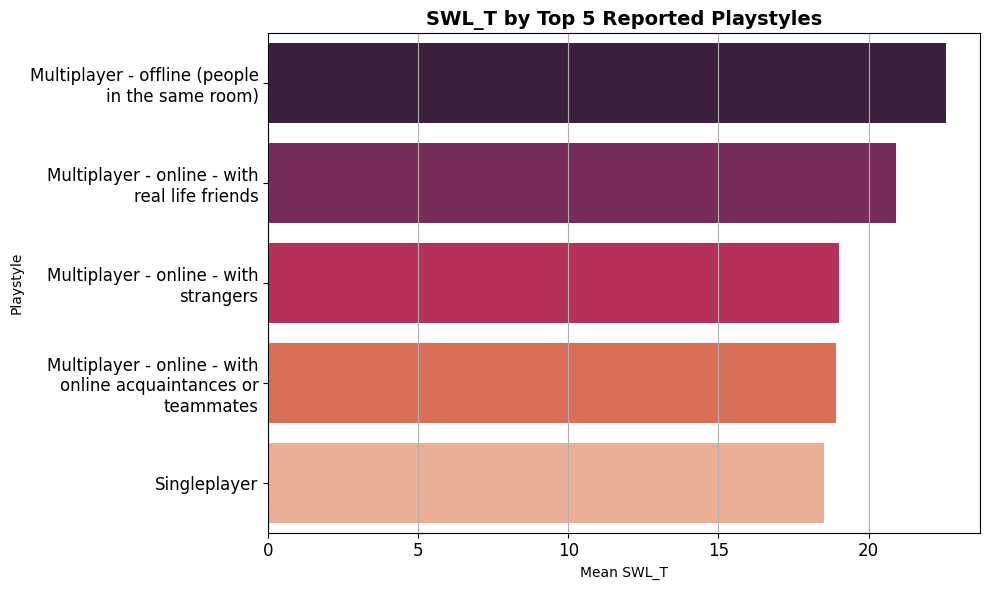

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Only for Playstyle
field = 'Playstyle'
score = 'SWL_T'

# Get top 5 most common playstyles
top_values = df[field].value_counts().head(5).index
df_filtered = df[df[field].isin(top_values)]

# Compute group means
group_means = df_filtered.groupby(field)[score].mean().sort_values(ascending=False)

# Wrap long y-axis labels
wrapped_labels = [
    "\n".join(textwrap.wrap(label, width=30)) for label in group_means.index
]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=group_means.values, y=wrapped_labels, palette='rocket')

plt.title(f'{score} by Top 5 Reported Playstyles', fontsize=14, fontweight='bold')
plt.xlabel(f'Mean {score}')
plt.ylabel('Playstyle')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='x')

plt.tight_layout()
plt.savefig(f'{score}_by_Top5_{field}.pdf', format='pdf')
plt.show()



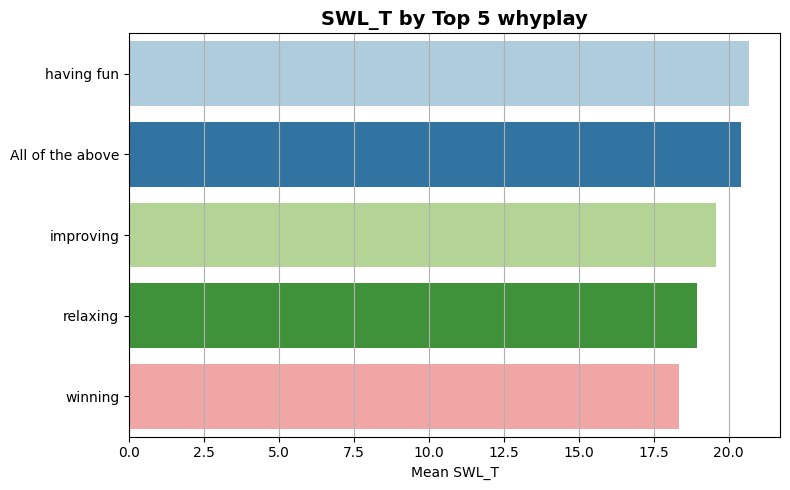

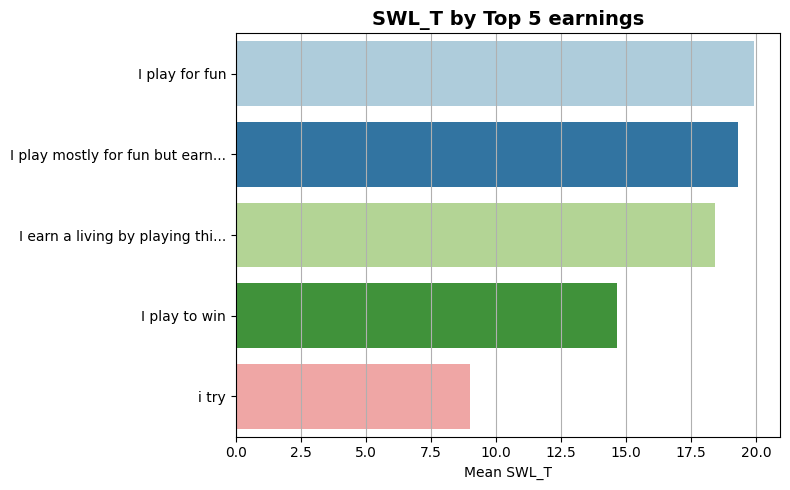

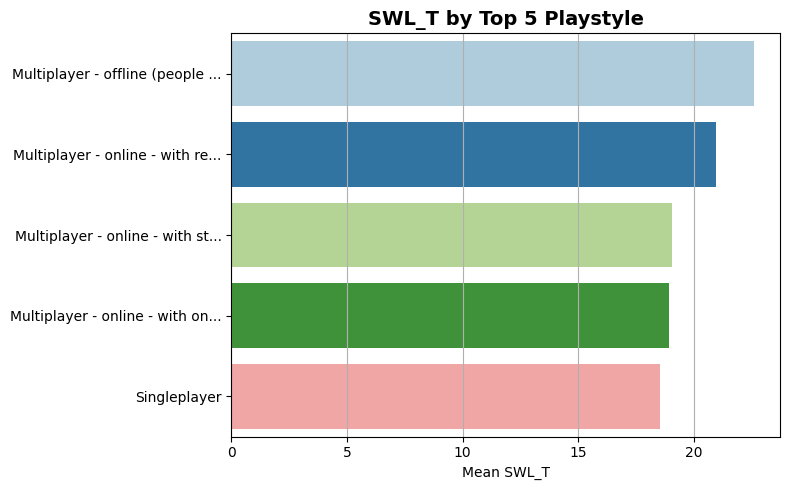

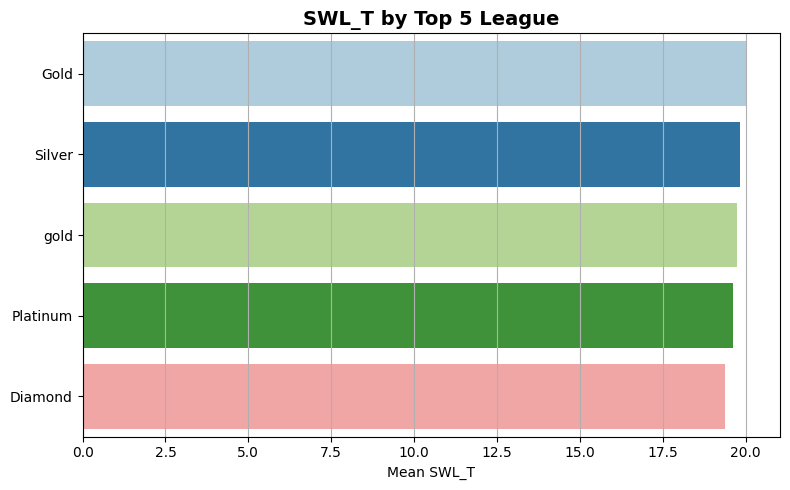

In [ ]:
text_fields = ['whyplay', 'earnings', 'Playstyle', 'League']
scores = ['SWL_T']

for score in scores:
    for field in text_fields:
        top_values = df[field].value_counts().head(5).index
        df_filtered = df[df[field].isin(top_values)]
        group_means = df_filtered.groupby(field)[score].mean().sort_values(ascending=False)

        plt.figure(figsize=(8, 5))
        sns.barplot(x=group_means.values, y=group_means.index, palette='Paired')
        plt.title(f'{score} by Top 5 {field}', fontsize=14, fontweight='bold')
        plt.xlabel(f'Mean {score}')
        plt.ylabel('')
        plt.grid(True, axis='x')
        plt.yticks(
            ticks=range(len(group_means.index)),
            labels=[label[:30] + '...' if len(label) > 30 else label for label in group_means.index]
        )
        plt.tight_layout()
        plt.savefig(f'{score}_by_Top5_{field}.pdf', format='pdf')
        plt.show()



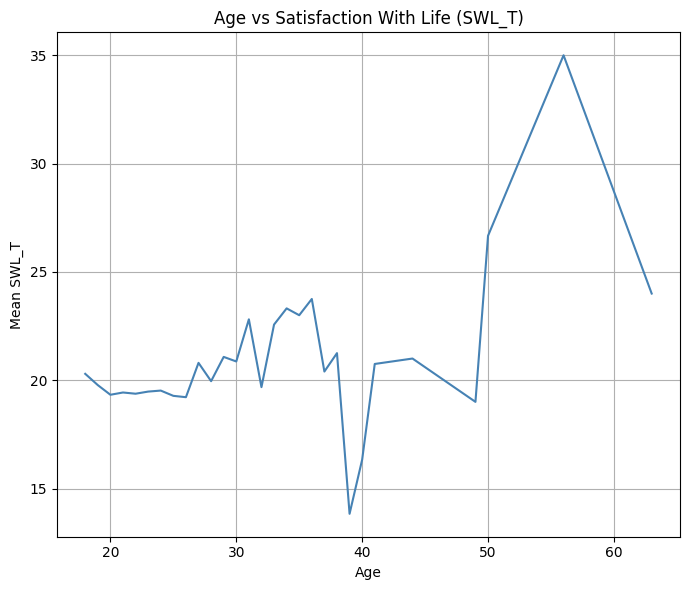

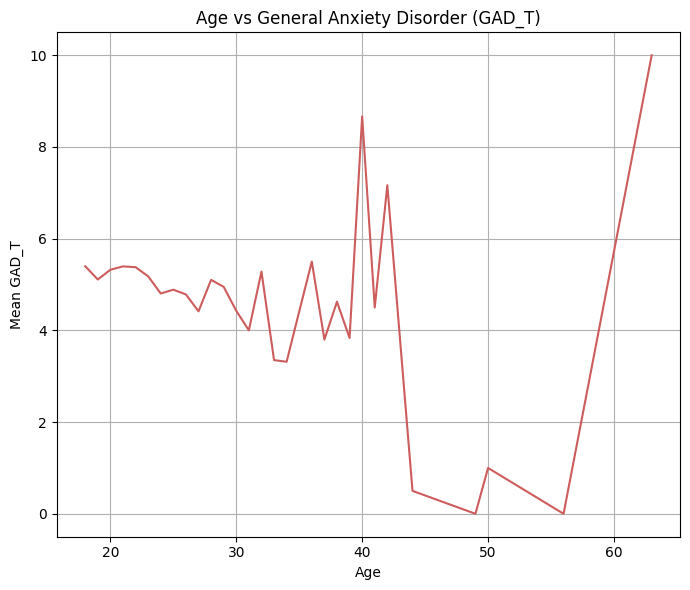

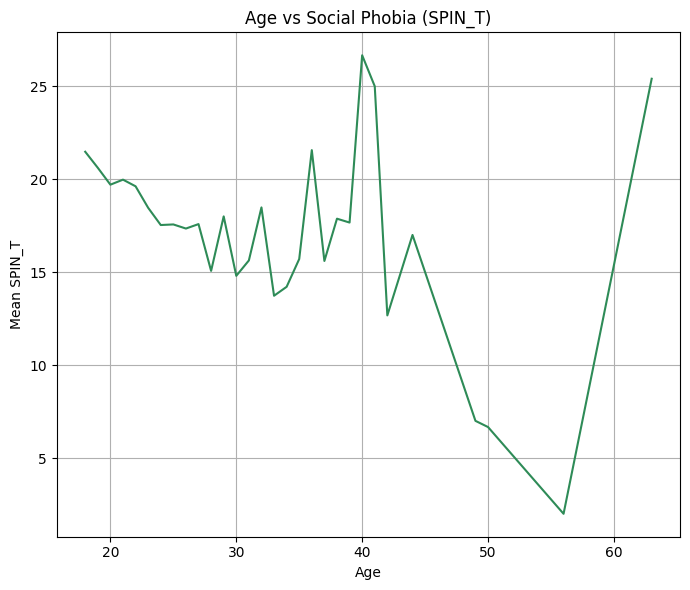

In [ ]:
# Phychological scores vs 'Age'

# Plot SWL_T
plt.figure(figsize=(7, 6))
df.groupby('Age')['SWL_T'].mean().plot(color='steelblue')
plt.title("Age vs Satisfaction With Life (SWL_T)")
plt.xlabel("Age")
plt.ylabel("Mean SWL_T")
plt.grid(True)
plt.tight_layout()
plt.savefig("Age_vs_SWL_T.pdf", format='pdf')
plt.show()

# Plot GAD_T
plt.figure(figsize=(7, 6))
df.groupby('Age')['GAD_T'].mean().plot(color='indianred')
plt.title("Age vs General Anxiety Disorder (GAD_T)")
plt.xlabel("Age")
plt.ylabel("Mean GAD_T")
plt.grid(True)
plt.tight_layout()
plt.savefig("Age_vs_GAD_T.pdf", format='pdf')
plt.show()

# Plot SPIN_T
plt.figure(figsize=(7, 6))
df.groupby('Age')['SPIN_T'].mean().plot(color='seagreen')
plt.title("Age vs Social Phobia (SPIN_T)")
plt.xlabel("Age")
plt.ylabel("Mean SPIN_T")
plt.grid(True)
plt.tight_layout()
plt.savefig("Age_vs_SPIN_T.pdf", format='pdf')
plt.show()


In [ ]:
# one-way ANOVA for categorical features vs SWL_T
from scipy.stats import f_oneway

categorical_cols = [
    'GADE', 'Work', 'Degree', 'Gender', 'Game', 'Residence_ISO3','Birthplace_ISO3','Platform', 'Reference'
]

# Run ANOVA tests for each categorical feature vs SWL_T
anova_results = {}
for col in categorical_cols:
    groups = [df[df[col] == val]['SWL_T'].dropna() for val in df[col].dropna().unique()]
    # Only include features where all groups have sufficient data
    if all(len(group) >= 0 for group in groups) and len(groups) >= 0:
        f_stat, p_val = f_oneway(*groups)
        anova_results[col] = (f_stat, p_val)

# Format as DataFrame
anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['F_statistic', 'p_value'])
anova_df.sort_values(by='p_value', inplace=True)
print(anova_df)


                 F_statistic        p_value
GADE              704.190629   0.000000e+00
Work              275.814530  9.498995e-174
Degree             61.865258   1.021670e-39
Residence_ISO3      2.550544   4.206894e-16
Birthplace_ISO3     2.286381   3.342004e-14
Gender             14.591794   4.674380e-07
Game                3.136911   5.150865e-04
Platform            1.822154   1.617169e-01
Reference           0.883444   4.487621e-01


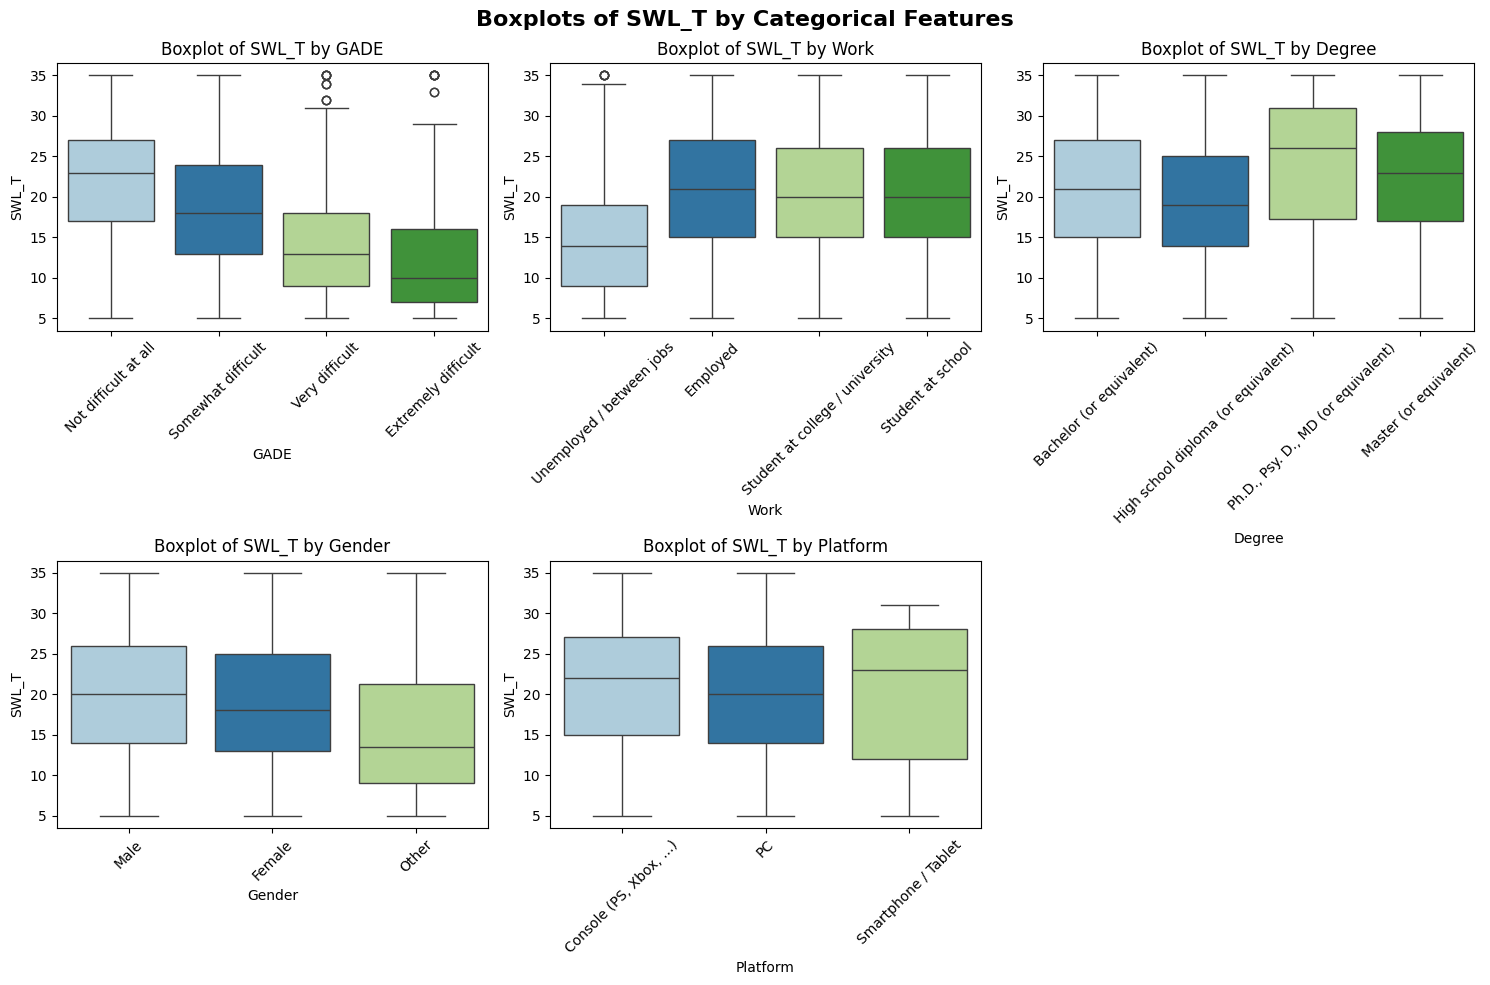

In [ ]:
#Plot categorical features
significant_feautures = ['GADE', 'Work','Degree','Gender','Platform']
# Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(significant_feautures, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], y=df['SWL_T'], palette='Paired')
    plt.title(f'Boxplot of SWL_T by {col}')
    plt.xlabel(col)
    plt.ylabel('SWL_T')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle('Boxplots of SWL_T by Categorical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig("Boxplots_of_SWL_T_by_Categorical_Features.pdf", format='pdf')
plt.show()

In [ ]:
#Filtering
#Handling Residence
top_countries = df['Residence_ISO3'].value_counts()[df['Residence_ISO3'].value_counts() >= 50].index
df['Residence_ISO3'] = df['Residence_ISO3'].apply(lambda x: x if x in top_countries else 'Other')
top_countries_birth = df['Birthplace_ISO3'].value_counts()[df['Birthplace_ISO3'].value_counts() >= 50].index
df['Birthplace_ISO3'] = df['Birthplace_ISO3'].apply(lambda x: x if x in top_countries_birth else 'Other')




# FEATURE ENGINEERING

In [ ]:
# Handling 'Hours'
df['Hours'].describe(include='all')

count    13464.000000
mean        22.251153
std         70.206538
min          0.000000
25%         12.000000
50%         20.000000
75%         28.000000
max       8000.000000
Name: Hours, dtype: float64

In [ ]:
df['streams'].describe(include='all')

count    13464.000000
mean        11.231619
std         78.257123
min          0.000000
25%          4.000000
50%          8.000000
75%         15.000000
max       9001.000000
Name: streams, dtype: float64

In [ ]:
#Combine 'Hours' and 'streams'
df['GamingTime'] = df['Hours'] + df['streams']
df['GamingTime'].describe(include='all')

count    13464.000000
mean        33.482772
std        147.568625
min          0.000000
25%         20.000000
50%         29.000000
75%         40.000000
max      17001.000000
Name: GamingTime, dtype: float64

In [ ]:
# extreme hours responses
extreme_hours = df[df['GamingTime']> 140]
extreme_hours

GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  SWL1  SWL2  SWL3  SWL4  SWL5  \
3112    3.0   3.0   3.0   3.0   3.0   3.0   3.0   7.0   1.0   7.0   1.0   7.0   
3482    1.0   1.0   1.0   1.0   0.0   1.0   0.0   2.0   1.0   2.0   3.0   7.0   
3860    0.0   0.0   0.0   1.0   0.0   1.0   0.0   4.0   1.0   2.0   3.0   2.0   
5430    0.0   1.0   2.0   0.0   0.0   1.0   3.0   1.0   2.0   2.0   2.0   4.0   
5641    3.0   2.0   0.0   0.0   0.0   1.0   0.0   1.0   1.0   1.0   1.0   7.0   
6171    2.0   2.0   2.0   0.0   0.0   1.0   0.0   1.0   6.0   1.0   1.0   1.0   
7615    3.0   0.0   0.0   3.0   3.0   3.0   0.0   1.0   1.0   1.0   1.0   1.0   
8418    1.0   2.0   2.0   1.0   1.0   2.0   1.0   1.0   1.0   3.0   2.0   1.0   
8482    0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0   4.0   4.0   6.0   3.0   
8776    3.0   3.0   3.0   3.0   3.0   3.0   3.0   7.0   7.0   7.0   7.0   7.0   
8961    0.0   0.0   0.0   0.0   0.0   1.0   0.0   7.0   7.0   7.0   7.0   7.0   
9070    1.0   0.0   0.0   2.0   3.0   3.0   1.0   4.0   5.0   2.0   4.0   1.0   
9094    0.0   0.0   0.0   0.0   0.0   0.0   0.0   6.0   6.0   6.0   6.0   7.0   
9435    0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   
13279   0.0   0.0   0.0   0.0   0.0   3.0   0.0   4.0   3.0   6.0   2.0   1.0   

        Hours  streams  SPIN1  SPIN2  SPIN3  SPIN4     SPIN5     SPIN6  SPIN7  \
3112    140.0     28.0    0.0    4.0    4.0    4.0  1.000000  4.000000    4.0   
3482     70.0    100.0    0.0    0.0    1.0    1.0  1.000000  0.000000    0.0   
3860   8000.0   9001.0    4.0    4.0    4.0    4.0  4.000000  4.000000    4.0   
5430    100.0    100.0    3.0    2.0    1.0    1.0  2.000000  1.000000    2.0   
5641     35.0    168.0    0.0    0.0    2.0    0.0  0.000000  0.000000    0.0   
6171     44.0    100.0    1.0    3.0    2.0    2.0  1.000000  4.000000    3.0   
7615    140.0    140.0    4.0    4.0    4.0    4.0  0.000000  0.000000    0.0   
8418    100.0    200.0    0.0    0.0    1.0    3.0  2.000000  2.000000    2.0   
8482     80.0     80.0    0.0    0.0    0.0    0.0  0.000000  0.000000    0.0   
8776    120.0     50.0    0.0    0.0    0.0    0.0  0.000000  0.000000    0.0   
8961    160.0      8.0    0.0    0.0    0.0    0.0  0.000000  0.000000    0.0   
9070     84.0     60.0    0.0    2.0    3.0    3.0  4.000000  4.000000    2.0   
9094     90.0     90.0    1.0    0.0    1.0    0.0  0.000000  2.000000    1.0   
9435    420.0    420.0    0.0    0.0    0.0    0.0  0.000000  0.000000    0.0   
13279   150.0      8.0    0.0    1.0    3.0    4.0  0.964723  2.467062    0.0   

       SPIN8  SPIN9    SPIN10  SPIN11  SPIN12  SPIN13  SPIN14  SPIN15  SPIN16  \
3112     4.0    4.0  4.000000     4.0     3.0     2.0     0.0     4.0     4.0   
3482     2.0    1.0  0.637784     3.0     1.0     0.0     0.0     0.0     0.0   
3860     4.0    4.0  4.000000     4.0     4.0     4.0     4.0     4.0     4.0   
5430     0.0    0.0  0.000000     0.0     0.0     0.0     2.0     2.0     1.0   
5641     1.0    0.0  0.000000     0.0     0.0     0.0     0.0     0.0     0.0   
6171     3.0    4.0  0.000000     4.0     2.0     1.0     2.0     2.0     1.0   
7615     4.0    4.0  4.000000     4.0     0.0     4.0     4.0     0.0     4.0   
8418     2.0    2.0  1.000000     4.0     1.0     0.0     0.0     1.0     0.0   
8482     0.0    2.0  0.000000     3.0     0.0     0.0     0.0     0.0     0.0   
8776     4.0    4.0  4.000000     0.0     4.0     4.0     4.0     4.0     4.0   
8961     0.0    0.0  0.000000     0.0     0.0     0.0     0.0     0.0     0.0   
9070     4.0    4.0  3.000000     4.0     4.0     2.0     4.0     4.0     2.0   
9094     0.0    0.0  0.000000     0.0     0.0     0.0     1.0     1.0     1.0   
9435     0.0    0.0  0.000000     0.0     0.0     0.0     0.0     0.0     0.0   
13279    4.0    4.0  1.000000     4.0     0.0     0.0     1.0     2.0     1.0   

       SPIN17  Narcissism   Age  GAD_T  SWL_T     SPIN_T  \
3112      0.0         1.0  22.0   21.0   23.0  50.000000

In [ ]:
df = df[df['GamingTime'] < 140]
df.shape

(13444, 50)

In [ ]:
# Define the SWL category using refined thresholds from literature
def categorize_swl(swl_score):

    if 31 <= swl_score <= 35:
        return 'Extremely satisfied'
    elif 26 <= swl_score <= 30:
        return 'Satisfied'
    elif 21 <= swl_score <= 25:
        return 'Slightly satisfied'
    elif swl_score == 20:
        return 'Neutral'
    elif 15 <= swl_score <= 19:
        return 'Slightly dissatisfied'
    elif 10 <= swl_score <= 14:
        return 'Dissatisfied'
    elif 5 <= swl_score <= 9:
        return 'Extremely dissatisfied'
    else:
        return 'Other'

# Apply the refined thresholds
df['SWL_category'] = df['SWL_T'].apply(categorize_swl)

# Display updated distribution
swl_summary = df['SWL_category'].value_counts(dropna=False)
swl_summary.columns = ['SWL Category', 'Count']

print(swl_summary)


SWL_category
Slightly satisfied        2986
Slightly dissatisfied     2934
Satisfied                 2535
Dissatisfied              2379
Extremely dissatisfied    1156
Extremely satisfied        847
Neutral                    607
Name: count, dtype: int64


In [ ]:
# Define risk levels based on refined SWL categories
def assign_mental_health_risk(category):
    if category in ['Extremely dissatisfied', 'Dissatisfied']:
        return 'High risk'
    elif category in ['Slightly dissatisfied', 'Neutral']:
        return 'Moderate risk'
    elif category in ['Slightly satisfied', 'Satisfied', 'Extremely satisfied']:
        return 'Low risk'
    else:
        return None


df['mental_health_risk'] = df['SWL_category'].apply(assign_mental_health_risk)

# Show distribution
risk_summary = df['mental_health_risk'].value_counts(dropna=False).reset_index()
risk_summary.columns = ['Mental Health Risk Level', 'Count']

print(risk_summary)




  Mental Health Risk Level  Count
0                 Low risk   6368
1            Moderate risk   3541
2                High risk   3535


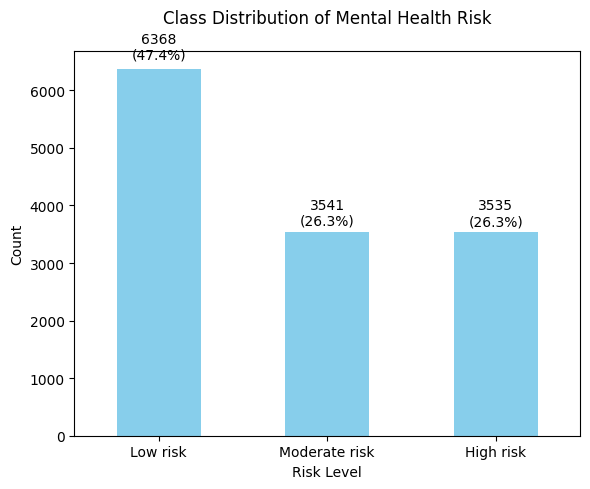

In [ ]:
import matplotlib.pyplot as plt

# Calculate counts and proportions
counts = df['mental_health_risk'].value_counts()
proportions = counts / counts.sum()

# Plot
plt.figure(figsize=(6, 5))  # slightly taller for spacing
ax = counts.plot(kind='bar', color='skyblue')

# Add count and percentage above bars with better spacing
for i, (count, prop) in enumerate(zip(counts, proportions)):
    plt.text(i, count + count * 0.02, f'{count}\n({prop:.1%})',
             ha='center', va='bottom', fontsize=10)

# Formatting
plt.title("Class Distribution of Mental Health Risk", pad=20)
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


In [ ]:
df['Playstyle'].value_counts()

Playstyle
Multiplayer - online - with real life friends                                                                                                                5564
Multiplayer - online - with strangers                                                                                                                        4133
Multiplayer - online - with online acquaintances or teammates                                                                                                2652
Singleplayer                                                                                                                                                  760
Multiplayer - offline (people in the same room)                                                                                                                48
all of the above                                                                                                                                                7
All of the above                                                                                                                                                6
I usually play online with my real life friends and the internet ones alike.                                                                                    1
Multiplayer - Online - With real friends, and with online acquaintances, and strangers                                                                          1
last 3 options                                                                                                                                                  1
Multiplayers online with both strangers and friends                                                                                                             1
With real life friends, and online friends.                                                                                                                     1
an equal mix                                                                                                                                                    1
Mutiplayer with both real life friends and online                                                                                                               1
With my ranked team, a mix of real life friends and online acquaintances.                                                                                       1
Porn                                                                                                                                                            1
with girlfriend                                                                                                                                                 1
usually combination of all                                                                                                                                      1
Both                                                                                                                                                            1
both with friends and with strangers                                                                                                                            1
Multiplayer with and without friends                                                                                                                            1
multiplayer real life and online friends and random people                                                                                                      1
online - duo - ranked with friend.                                                                                                                              1
Multiplayer - online - with friends ive met                                                                                                                     1
It's an online game                                                                                   

In [ ]:
df['earnings'].value_counts()

earnings
I play for fun                                                                                                                                                                                                                                                                                                                                                                        12111
I play mostly for fun but earn a little on the side (tournament winnings, streaming, etc)                                                                                                                                                                                                                                                                                               990
I earn a living by playing this game                                                                                                                                                                                                                                                                                                                                                     46
I play to win                                                                                                                                                                                                                                                                                                                                                                             3
i try                                                                                                                                                                                                                                                                                                                                                                                     2
I play for fun, but am starting to stream.                                                                                                                                                                                                                                                                                                                                                1
I don't earn jack ****                                                                                                                                                                                                                                                                                                                                                                    1
I play for relaxation and it gives me a few minutes to release everything                                                                                                                                                                                                                                                                                                                 1
making money from boosting,but mostly fun                                                                                                                                                                                                                                                                                                                                                 1
I play because it's installed                                                                                                                                                                                                                                                                                                                                                             1
competitive drive                                                                                                                                                                              

In [ ]:
df['whyplay'].value_counts()

whyplay
having fun                                                                                                                                                                                                                          5289
improving                                                                                                                                                                                                                           4926
winning                                                                                                                                                                                                                             2089
relaxing                                                                                                                                                                                                                             654
All of the above                                                                                                                                                                                                                      26
all of the above                                                                                                                                                                                                                      22
Improving and having fun                                                                                                                                                                                                              10
improving and having fun                                                                                                                                                                                                               8
winning and improving                                                                                                                                                                                                                  6
having fun and improving                                                                                                                                                                                                               5
Wasting time                                                                                                                                                                                                                           4
distraction                                                                                                                                                                                                                            4
relaxing and having fun                                                                                                                                                                                                                3
both relaxing and having fun                                                                                                                                                                                                           3
All                                                                                                                                                                                                                                    3
winning while having fun                                                                                                                                                                                                               3
winning and relaxing                                                                                                                                                                                                                   2
all above                      

In [ ]:
df['League'].value_counts()

League
Gold                                                                                                                                                          2317
Silver                                                                                                                                                        1086
Platinum                                                                                                                                                       670
Diamond                                                                                                                                                        568
gold                                                                                                                                                           316
Unranked                                                                                                                                                       264
Diamond 5                                                                                                                                                      217
silver                                                                                                                                                         212
Gold V                                                                                                                                                         205
Gold 1                                                                                                                                                         204
Silver 1                                                                                                                                                       197
Gold 3                                                                                                                                                         197
Gold 5                                                                                                                                                         194
Silver 2                                                                                                                                                       180
Gold 2                                                                                                                                                         171
platinum                                                                                                                                                       167
diamond                                                                                                                                                        154
Silver 3                                                                                                                                                       151
Bronze                                                                                                                                                         137
Gold 4                                                                                                                                                         127
Platinum 3                                                                                                                                                     123
unranked                                                                                                                                                       118
Silver 4                                                                                                                                                       118
Platinum 2                                                                                                                                                     117
Platinum 1                                                                       

In [ ]:
df.to_csv('df_cleaned_data.csv', index=False)

In [ ]:
import string as st
# Select and clean text columns
text_features = ['whyplay', 'Playstyle', 'earnings', 'League']
def clean_text(text):
    text = str(text).lower().strip()
    return ' '.join(word.strip(st.punctuation) for word in text.split())

df_text = df[text_features].copy()
df_text = df_text.applymap(clean_text)


COMPUTING EMBEDDINGS FOR 'EARNINGS', 'WHYPLAY', 'PLAYSTYLE', 'LEAGUE' (ALTERNTIVE TO RULE-BASED CATEGORIZATION)

In [ ]:
!pip install -q sentence-transformers
from sentence_transformers import SentenceTransformer


In [ ]:
# Load the SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute embeddings per column
embeddings = {}
for col in text_features:
    embeddings[col] = model.encode(df_text[col].tolist(), show_progress_bar=True)


embedding_matrix = np.hstack([embeddings[col] for col in text_features])

Batches:   0%|          | 0/421 [00:00<?, ?it/s]

Batches:   0%|          | 0/421 [00:00<?, ?it/s]

Batches:   0%|          | 0/421 [00:00<?, ?it/s]

Batches:   0%|          | 0/421 [00:00<?, ?it/s]

In [ ]:
print("Embedding matrix shape:", embedding_matrix.shape)

Embedding matrix shape: (13444, 1536)


In [ ]:
from sklearn.decomposition import PCA

# Run PCA on the embedding matrix
pca = PCA(n_components=25, random_state=42)
embedding_pca = pca.fit_transform(embedding_matrix)

# Combine with the dataframe
embedding_pca_df = pd.DataFrame(embedding_pca, columns=[f'pca_emb_{i}' for i in range(25)])
embedding_pca_df.index = df.index  # match index

#Merge with imputed dataset
df_final = pd.concat([df, embedding_pca_df], axis=1)

df_final.head()


GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  SWL1  SWL2  SWL3  SWL4  SWL5  \
0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   3.0   5.0   5.0   5.0   5.0   
1   1.0   2.0   2.0   2.0   0.0   1.0   0.0   3.0   5.0   2.0   5.0   1.0   
2   0.0   2.0   2.0   0.0   0.0   3.0   1.0   2.0   6.0   5.0   2.0   2.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0   5.0   5.0   3.0   2.0   
4   2.0   1.0   2.0   2.0   2.0   3.0   2.0   2.0   2.0   4.0   5.0   1.0   

   Hours  streams  SPIN1  SPIN2  SPIN3  SPIN4  SPIN5  SPIN6  SPIN7  SPIN8  \
0   15.0      0.0    1.0    0.0    0.0    1.0    0.0    0.0    1.0    0.0   
1    8.0      2.0    2.0    1.0    1.0    3.0    2.0    3.0    1.0    3.0   
2    0.0      0.0    1.0    0.0    1.0    2.0    3.0    4.0    2.0    1.0   
3   20.0      5.0    2.0    0.0    0.0    1.0    3.0    0.0    0.0    0.0   
4   20.0      1.0    2.0    0.0    0.0    0.0    1.0    0.0    0.0    4.0   

   SPIN9  SPIN10  SPIN11  SPIN12  SPIN13  SPIN14  SPIN15  SPIN16  SPIN17  \
0    0.0     0.0     0.0     0.0     0.0     1.0     0.0     1.0     0.0   
1    4.0     0.0     3.0     0.0     1.0     3.0     3.0     1.0     2.0   
2    0.0     1.0     1.0     3.0     0.0     2.0     4.0     4.0     2.0   
3    0.0     0.0     1.0     3.0     0.0     0.0     1.0     0.0     0.0   
4    2.0     0.0     1.0     0.0     0.0     0.0     0.0     3.0     0.0   

   Narcissism   Age  GAD_T  SWL_T  SPIN_T                  GADE    Game  \
0         1.0  25.0    1.0   23.0     5.0  Not difficult at all  Skyrim   
1         1.0  41.0    8.0   16.0    33.0    Somewhat difficult   Other   
2         4.0  32.0    8.0   17.0    31.0  Not difficult at all   Other   
3         2.0  28.0    0.0   17.0    11.0  Not difficult at all   Other   
4         1.0  19.0   14.0   14.0    13.0        Very difficult   Other   

                  Platform        earnings     whyplay   League  Gender  \
0  Console (PS, Xbox, ...)  I play for fun  having fun     Gold    Male   
1                       PC  I play for fun  having fun     Gold    Male   
2                       PC  I play for fun  having fun     Gold  Female   
3                       PC  I play for fun   improving     Gold    Male   
4  Console (PS, Xbox, ...)  I play for fun  having fun  Rank 15    Male   

                        Work                               Degree Reference  \
0  Unemployed / between jobs             Bachelor (or equivalent)    Reddit   
1  Unemployed / between jobs             Bachelor (or equivalent)    Reddit   
2                   Employed             Bachelor (or equivalent)    Reddit   
3                   Employed             Bachelor (or equivalent)    Reddit   
4                   Employed  High school diploma (or equivalent)    Reddit   

                                                       Playstyle  \
0                                                   Singleplayer   
1                          Multiplayer - online - with strangers   
2                                                   Singleplayer   
3  Multiplayer - online - with online acquaintances or teammates   
4                          Multiplayer - online - with strangers   

  Residence_ISO3 Birthplace_ISO3  GamingTime           SWL_category  \
0            USA             USA        15.0     Slightly satisfied   
1            USA             USA        10.0  Slightly dissatisfied   
2            DEU             DEU         0.0  Slightly dissatisfied   
3            USA             USA        25.0  Slightly dissatisfied   
4            KOR             USA        21.0           Dissatisfied   

  mental_health_risk  pca_emb_0  pca_emb_1  pca_emb_2  pca_emb_3  pca_emb_4  \
0           Low risk  -0.611324   0.484712   0.186410  -0.324829   0.822923   
1      Moderate risk  -0.573157   0.400932   0.177149  -0.267783   0.008030   
2      Moderate risk  -0.611327   0.484714   0.186402  -0.324829   0.822922   
3      Moderate risk   0.572906   0.520740   0.274026  -0.233488  -0.114383   
4          H

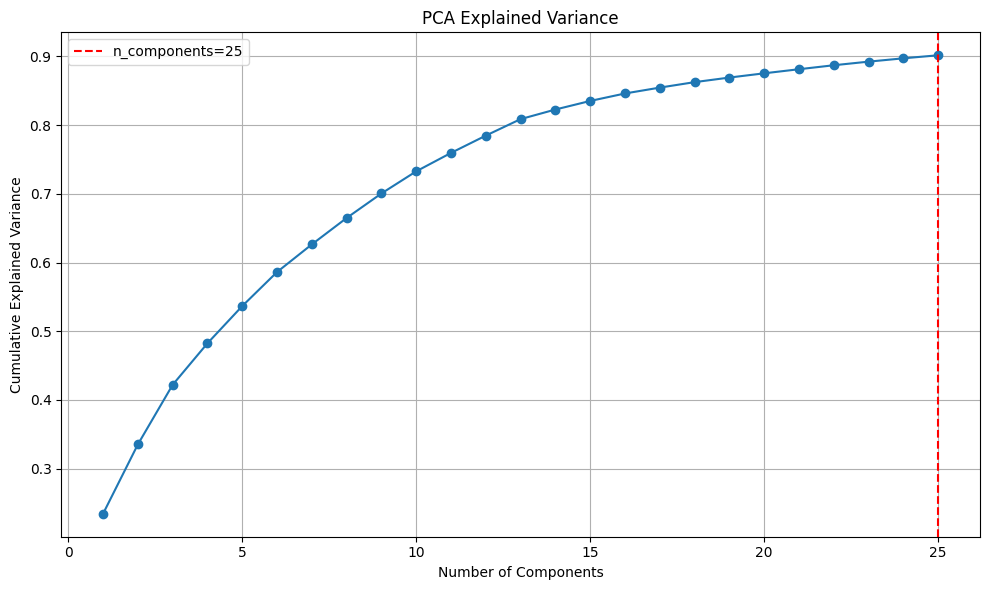

In [ ]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, 26), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axvline(x=25, color='red', linestyle='--', label='n_components=25')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("PCA_explained_variance.pdf", format='pdf')
plt.show()


In [ ]:
print("Variance explained by 25 components:", round(np.sum(pca.explained_variance_ratio_) * 100, 2), "%")


Variance explained by 25 components: 90.15 %


In [ ]:
component_idx = 20  # Change from 0 to 24 for each PCA component

# Get indices of top 5 absolute values in this component
top_indices = embedding_pca_df.iloc[:, component_idx].abs().sort_values(ascending=False).head(10).index

# Display their corresponding text responses
df_text.loc[top_indices, ['whyplay', 'Playstyle', 'earnings', 'League']]


whyplay  \
8860   having fun   
8981    improving   
1862    improving   
3541    improving   
12144   improving   
3356    improving   
12801  having fun   
2957     relaxing   
10120  having fun   
1094      winning   

                                                         Playstyle  \
8860                                                  singleplayer   
8981   multiplayer  online  with online acquaintances or teammates   
1862   multiplayer  online  with online acquaintances or teammates   
3541   multiplayer  online  with online acquaintances or teammates   
12144                  multiplayer  online  with real life friends   
3356                   multiplayer  online  with real life friends   
12801                           with strangers and with my friends   
2957                           multiplayer  online  with strangers   
10120                          multiplayer  online  with strangers   
1094                                                  singleplayer   

                                                                                    earnings  \
8860                                                                          i play for fun   
8981                                                                          i play for fun   
1862   i play mostly for fun but earn a little on the side tournament winnings streaming etc   
3541   i play mostly for fun but earn a little on the side tournament winnings streaming etc   
12144  i play mostly for fun but earn a little on the side tournament winnings streaming etc   
3356   i play mostly for fun but earn a little on the side tournament winnings streaming etc   
12801                                                                         i play for fun   
2957                                                                          i play for fun   
10120                                                                         i play for fun   
1094                                                                          i play for fun   

             League  
8860   platinium ii  
8981      platin ii  
1862      platinium  
3541      platinium  
12144     platinium  
3356      platinium  
12801   platinium 2  
2957    platinium i  
10120   platinium 2  
1094    platinium 2

In [ ]:
df_final.to_csv('df_final.csv', index=False)

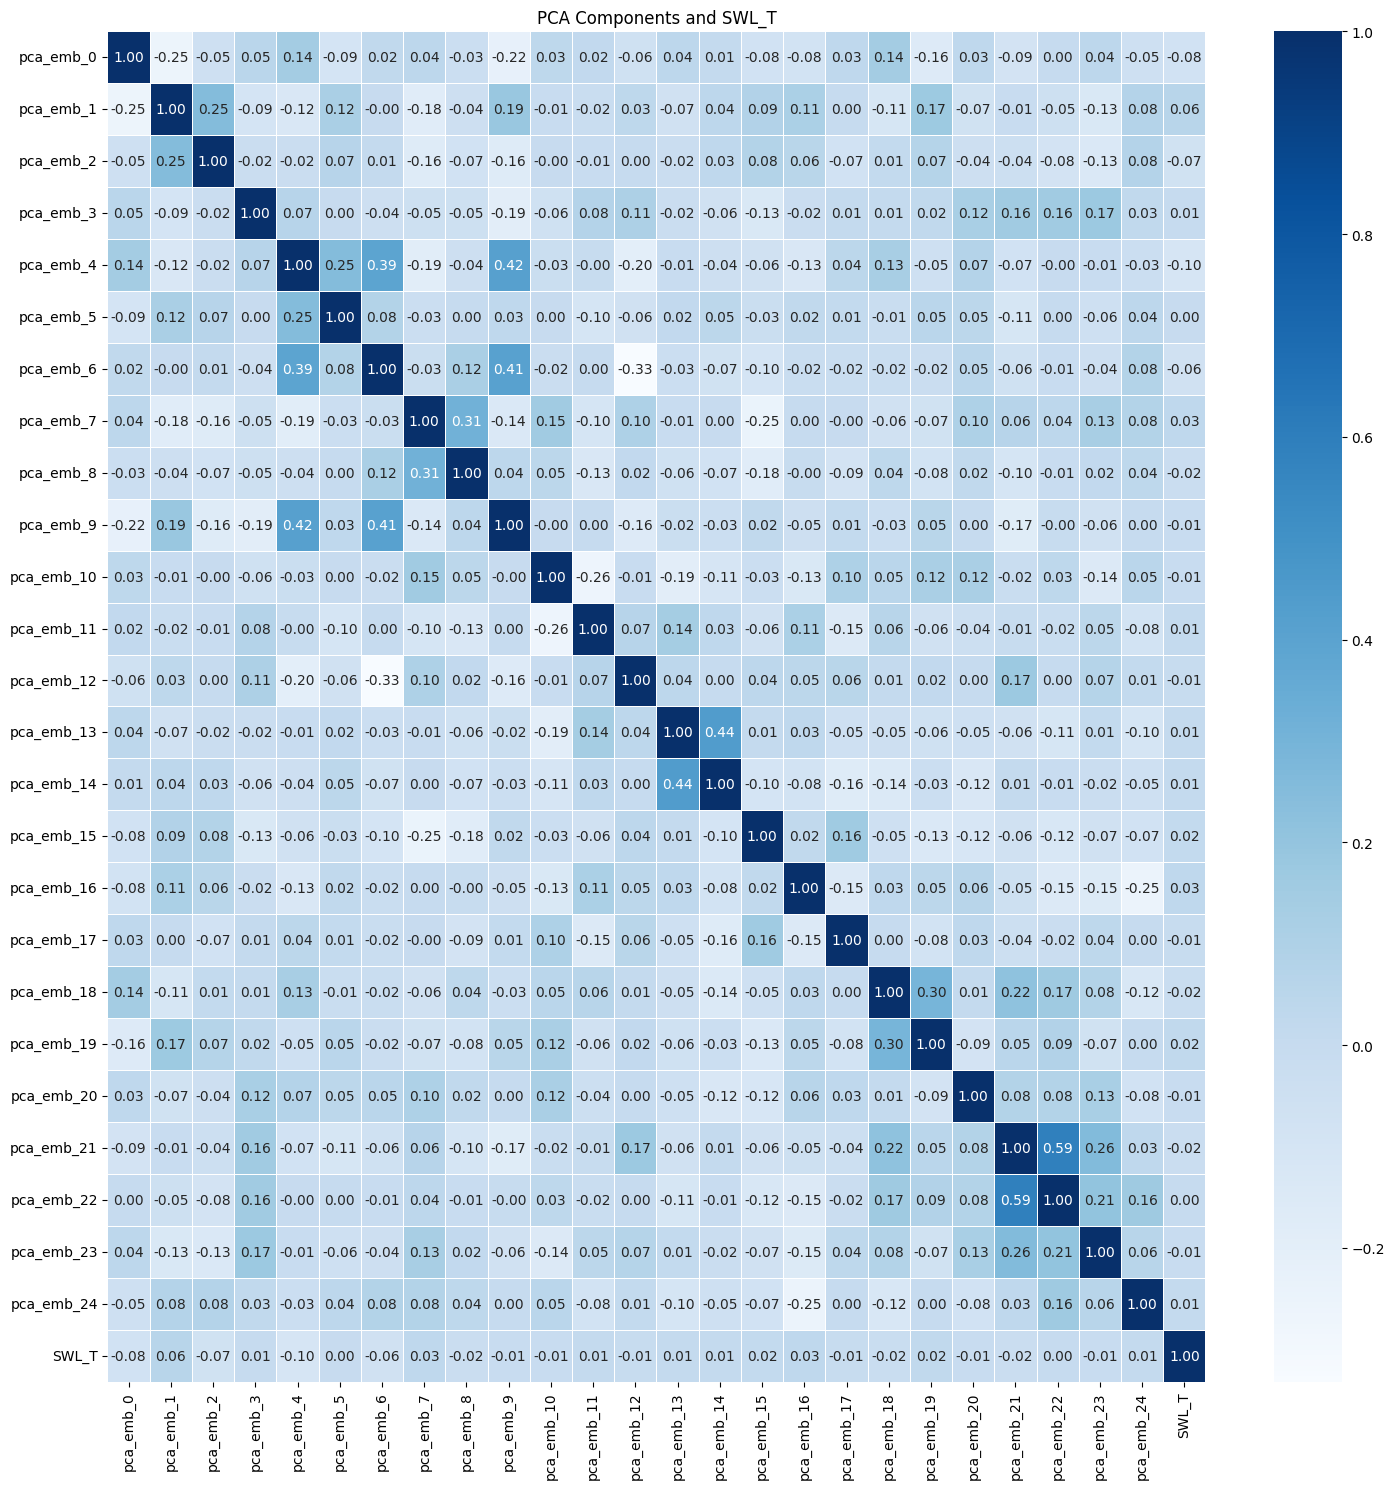

In [ ]:
#Correlation matrix of PCA_emb with SWL_T
# Identify PCA features
pca_features = [col for col in df_final.columns if col.startswith('pca_emb_')]

corr_matrix = df_final[pca_features + ['SWL_T']].corr(method='spearman')

# Plot the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("PCA Components and SWL_T")
plt.tight_layout()
plt.savefig("PCA_Components_and_SWL_T.pdf", format='pdf')
plt.show()

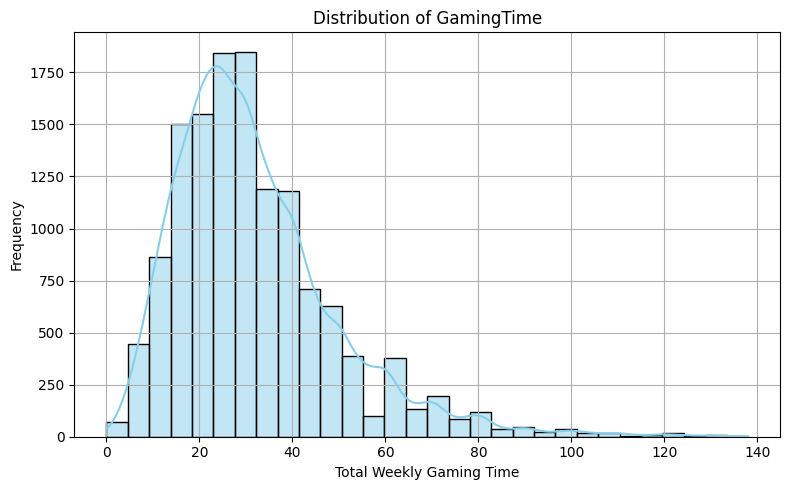

In [ ]:
# Plot distribution of GamingTime_Total
plt.figure(figsize=(8, 5))
sns.histplot(df_final['GamingTime'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of GamingTime")
plt.xlabel("Total Weekly Gaming Time")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.savefig("Distribution_of_GamingTime.pdf", format='pdf')
plt.show()

In [ ]:
from scipy.stats import f_oneway

# Re-filter the countries after replacing low-frequency values with 'Other'
residence_groups = [df_final[df_final['Residence_ISO3'] == country]['SWL_T'].dropna() for country in df_final['Residence_ISO3'].unique() if country != 'Other']
birthplace_groups = [df_final[df_final['Birthplace_ISO3'] == country]['SWL_T'].dropna() for country in df_final['Birthplace_ISO3'].unique() if country != 'Other']

# Apply ANOVA
f_stat_residence, p_val_residence = f_oneway(*residence_groups)
f_stat_birthplace, p_val_birthplace = f_oneway(*birthplace_groups)

(f_stat_residence, p_val_residence), (f_stat_birthplace, p_val_birthplace)


((np.float64(2.556488650116277), np.float64(3.476204487770271e-16)),
 (np.float64(2.2950224586169834), np.float64(2.4784363923556718e-14)))

# LOAD AGAIN DATASET AND LIBRARIES

In [ ]:
#LOADING DATA
csv_file_path = 'df_final.csv'
df_final = pd.read_csv(csv_file_path, encoding="ISO-8859-1")
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13444 entries, 0 to 13443
Data columns (total 77 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GAD1                13444 non-null  float64
 1   GAD2                13444 non-null  float64
 2   GAD3                13444 non-null  float64
 3   GAD4                13444 non-null  float64
 4   GAD5                13444 non-null  float64
 5   GAD6                13444 non-null  float64
 6   GAD7                13444 non-null  float64
 7   SWL1                13444 non-null  float64
 8   SWL2                13444 non-null  float64
 9   SWL3                13444 non-null  float64
 10  SWL4                13444 non-null  float64
 11  SWL5                13444 non-null  float64
 12  Hours               13444 non-null  float64
 13  streams             13444 non-null  float64
 14  SPIN1               13444 non-null  float64
 15  SPIN2               13444 non-null  float64
 16  SPIN

In [ ]:
columns_to_drop = ['whyplay','Playstyle','earnings','League', 'Birthplace_ISO3', 'Hours', 'streams','Reference','SWL_T','SWL_category','SWL1','SWL2','SWL3','SWL4','SWL5']
df_final = df_final.drop(columns=columns_to_drop, errors='ignore')
df_final.head()

GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  SPIN1  SPIN2  SPIN3  SPIN4  \
0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    1.0    0.0    0.0    1.0   
1   1.0   2.0   2.0   2.0   0.0   1.0   0.0    2.0    1.0    1.0    3.0   
2   0.0   2.0   2.0   0.0   0.0   3.0   1.0    1.0    0.0    1.0    2.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0    2.0    0.0    0.0    1.0   
4   2.0   1.0   2.0   2.0   2.0   3.0   2.0    2.0    0.0    0.0    0.0   

   SPIN5  SPIN6  SPIN7  SPIN8  SPIN9  SPIN10  SPIN11  SPIN12  SPIN13  SPIN14  \
0    0.0    0.0    1.0    0.0    0.0     0.0     0.0     0.0     0.0     1.0   
1    2.0    3.0    1.0    3.0    4.0     0.0     3.0     0.0     1.0     3.0   
2    3.0    4.0    2.0    1.0    0.0     1.0     1.0     3.0     0.0     2.0   
3    3.0    0.0    0.0    0.0    0.0     0.0     1.0     3.0     0.0     0.0   
4    1.0    0.0    0.0    4.0    2.0     0.0     1.0     0.0     0.0     0.0   

   SPIN15  SPIN16  SPIN17  Narcissism   Age  GAD_T  SPIN_T  \
0     0.0     1.0     0.0         1.0  25.0    1.0     5.0   
1     3.0     1.0     2.0         1.0  41.0    8.0    33.0   
2     4.0     4.0     2.0         4.0  32.0    8.0    31.0   
3     1.0     0.0     0.0         2.0  28.0    0.0    11.0   
4     0.0     3.0     0.0         1.0  19.0   14.0    13.0   

                   GADE    Game                 Platform  Gender  \
0  Not difficult at all  Skyrim  Console (PS, Xbox, ...)    Male   
1    Somewhat difficult   Other                       PC    Male   
2  Not difficult at all   Other                       PC  Female   
3  Not difficult at all   Other                       PC    Male   
4        Very difficult   Other  Console (PS, Xbox, ...)    Male   

                        Work                               Degree  \
0  Unemployed / between jobs            BachelorÂ (or equivalent)   
1  Unemployed / between jobs            BachelorÂ (or equivalent)   
2                   Employed            BachelorÂ (or equivalent)   
3                   Employed            BachelorÂ (or equivalent)   
4                   Employed  High school diploma (or equivalent)   

  Residence_ISO3  GamingTime mental_health_risk  pca_emb_0  pca_emb_1  \
0            USA        15.0           Low risk  -0.611325   0.484715   
1            USA        10.0      Moderate risk  -0.573157   0.400932   
2            DEU         0.0      Moderate risk  -0.611327   0.484713   
3            USA        25.0      Moderate risk   0.572906   0.520740   
4          Other        21.0          High risk  -0.486502  -0.188609   

   pca_emb_2  pca_emb_3  pca_emb_4  pca_emb_5  pca_emb_6  pca_emb_7  \
0   0.186415  -0.324829   0.822921  -0.171567  -0.230835   0.134970   
1   0.177150  -0.267784   0.008028   0.079618   0.284518  -0.087212   
2   0.186402  -0.324829   0.822923  -0.171563  -0.230841   0.134969   
3   0.274026  -0.233487  -0.114382   0.028108   0.087060  -0.091894   
4  -0.335629   0.011631   0.103808  -0.040124   0.244272  -0.379291   

   pca_emb_8  pca_emb_9  pca_emb_10  pca_emb_11  pca_emb_12  pca_emb_13  \
0   0.032080   0.239129   -0.005930   -0.006635    0.039427   -0.004795   
1  -0.031350   0.124668   -0.018056   -0.037921   -0.155058   -0.016201   
2   0.032070   0.239131   -0.005934   -0.006634    0.039431   -0.004788   
3   0.007102   0.046741    0.005307   -0.080582    0.313349   -0.000775   
4  -0.140464   0.130110    0.184073    0.160456   -0.121084   -0.166762   

   pca_emb_14  pca_emb_15  pca_emb_16  pca_emb_17  pca_emb_18  pca_emb_19  \
0    0.032842   -0.004802    0.009438   -0.010470    0.013467   -0.008632   
1    0.026080   -0.015142    0.012567   -0.016429   -0.003696   -0.005154   
2    0.032833   -0.004801    0.009452   -0.010476    0.013479   -0.008645   
3    0.035324   -0.004516    0.016030   -0.010244    0.004461   -0.007843   
4   -0.037353    0.094391    0.090434    0.057799    0.016170   -0.005735   

   pca_emb_20  pca_emb_21  pca_emb_22  pca_emb_23  pca_emb_24  
0   -0.010458   -0.001550   -0

In [ ]:
df_final.dtypes

GAD1                  float64
GAD2                  float64
GAD3                  float64
GAD4                  float64
GAD5                  float64
GAD6                  float64
GAD7                  float64
SPIN1                 float64
SPIN2                 float64
SPIN3                 float64
SPIN4                 float64
SPIN5                 float64
SPIN6                 float64
SPIN7                 float64
SPIN8                 float64
SPIN9                 float64
SPIN10                float64
SPIN11                float64
SPIN12                float64
SPIN13                float64
SPIN14                float64
SPIN15                float64
SPIN16                float64
SPIN17                float64
Narcissism            float64
Age                   float64
GAD_T                 float64
SPIN_T                float64
GADE                   object
Game                   object
Platform               object
Gender                 object
Work                   object
Degree                 object
Reference              object
Residence_ISO3         object
GamingTime            float64
mental_health_risk     object
pca_emb_0             float64
pca_emb_1             float64
pca_emb_2             float64
pca_emb_3             float64
pca_emb_4             float64
pca_emb_5             float64
pca_emb_6             float64
pca_emb_7             float64
pca_emb_8             float64
pca_emb_9             float64
pca_emb_10            float64
pca_emb_11            float64
pca_emb_12            float64
pca_emb_13            float64
pca_emb_14            float64
pca_emb_15            float64
pca_emb_16            float64
pca_emb_17            float64
pca_emb_18            float64
pca_emb_19            float64
pca_emb_20            float64
pca_emb_21            float64
pca_emb_22            float64
pca_emb_23            float64
pca_emb_24            float64
dtype: object

# FEATURE SCALING AND SPLITTING DATA

In [ ]:
# Custom mapping based on target
risk_order = {
    'Low risk': 0,
    'Moderate risk': 1,
    'High risk': 2
}

df_final['mental_health_risk_encoded'] = df_final['mental_health_risk'].map(risk_order)
df_final.mental_health_risk_encoded.value_counts()

mental_health_risk_encoded
0    6368
1    3541
2    3535
Name: count, dtype: int64

In [ ]:
#Encoding version
# Separate features and target
X = df_final.drop(columns=['mental_health_risk', 'mental_health_risk_encoded'])
y = df_final['mental_health_risk_encoded']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include="object").columns.tolist()
numerical_features = X.select_dtypes(include=["float64","float32", "int64"]).columns.tolist()


# One-hot encode categorical features using the categorical_features
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Scale numeric features
scaler = StandardScaler()
X_encoded[numerical_features] = scaler.fit_transform(X_encoded[numerical_features])

# Stratified split: 70% train, 15% val, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(X_encoded, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)

# Output shapes and class distributions
X_train.shape, X_val.shape, X_test.shape

((9410, 109), (2017, 109), (2017, 109))

In [ ]:
#RAW VERSION FOR CATBOOST
# Separate features and target
df_raw = df_final.copy()
X_raw = df_raw.drop(columns=['mental_health_risk', 'mental_health_risk_encoded'])
y_raw = df_raw['mental_health_risk_encoded']

# Stratified split for raw version (same proportions as before)
X_temp_raw, X_test_raw, y_temp_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.15, random_state=42, stratify=y_raw)
X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(X_temp_raw, y_temp_raw, test_size=0.1765, random_state=42, stratify=y_temp_raw)

# Output confirmation
X_train_raw.shape, X_val_raw.shape, X_test_raw.shape


((9410, 61), (2017, 61), (2017, 61))

In [ ]:
df_final.to_csv('df_final_encoded.csv', index=False)

# FEATURE IMPORTANCE

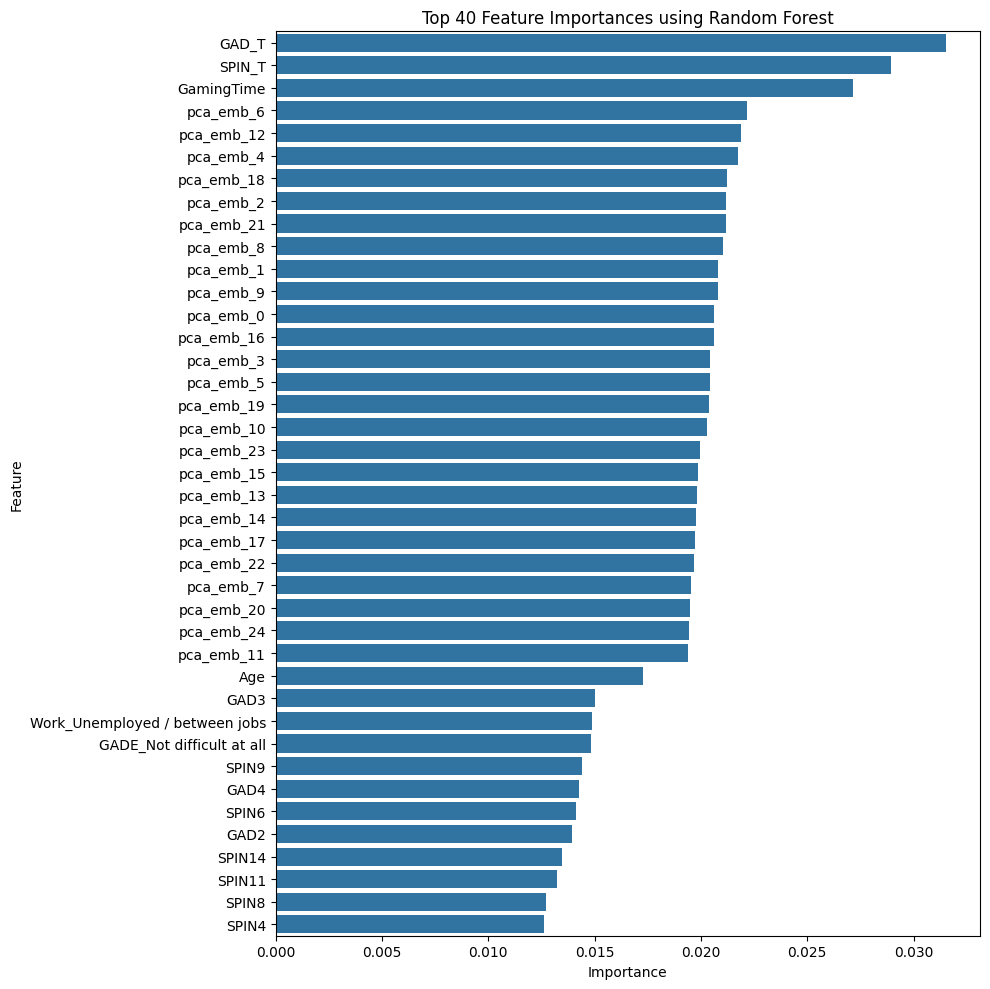

GAD_T    SPIN_T  GamingTime  pca_emb_6  pca_emb_12  pca_emb_4  \
13217 -1.106255 -0.658995    0.736816   1.634438   -0.915353   0.688635   
4664   1.654123  0.238029    2.150679   0.826721   -0.704933  -0.049950   
10417  0.167766 -1.182259   -0.903266   1.320181   -0.931305   0.032110   
11476 -1.106255 -0.958003    1.302361  -0.977628   -0.186771  -0.860595   
3780  -0.469245  1.583566   -0.450830   0.582180    0.002452   0.095404   

       pca_emb_18  pca_emb_2  pca_emb_21  pca_emb_8  pca_emb_1  pca_emb_9  \
13217    0.337874   0.658296    0.439453  -0.098237   1.352392  -3.936549   
4664     0.103276   2.924673   -0.047825  -0.288206  -0.235748   0.180744   
10417   -0.042043   0.559666   -0.115689  -0.154451   1.174901   0.646522   
11476   -0.115641   0.100451    0.649872  -0.057161   0.838627  -0.088147   
3780    -0.485712  -0.709626    0.006287   0.478396   0.127783   0.401008   

       pca_emb_0  pca_emb_16  pca_emb_3  pca_emb_5  pca_emb_19  pca_emb_10  \
13217  -0.426440    0.076559  -1.081069   0.120441   -0.283083    0.017816   
4664   -0.298930    0.100346  -0.552933  -0.075534   -0.148628    0.170881   
10417  -1.101549    0.126494  -1.014018   0.332890   -0.061069   -0.102578   
11476   1.141938    0.298253  -0.000309  -0.518651   -2.103308   -0.910993   
3780   -1.016607    1.090589   1.744074   0.157785   -1.948937   -0.614981   

       pca_emb_23  pca_emb_15  pca_emb_13  pca_emb_14  pca_emb_17  pca_emb_22  \
13217   -0.356327   -0.076487   -0.127233    0.272047   -0.099116   -0.539897   
4664    -0.336465   -0.136430   -0.149138    0.189604   -0.221396   -0.326075   
10417   -0.280514   -0.135108   -0.127675    0.217403   -0.171540   -0.227448   
11476    0.723597   -0.781951    1.560305    0.929031   -0.811475    1.347324   
3780    -0.110854   -1.096717    1.249786    0.599204   -0.871154    0.320349   

       pca_emb_7  pca_emb_20  pca_emb_24  pca_emb_11       Age      GAD3  \
13217  -0.536056   -0.219329   -0.295418   -0.223141  1.237707 -0.983071   
4664   -0.461719   -0.093371   -0.353633   -0.226832 -0.281654  1.052572   
10417  -0.414133   -0.104355   -0.295704   -0.222480  2.453195  0.034750   
11476   0.237509    1.723214    0.353583    1.938622 -0.585526 -0.983071   
3780    0.526469    0.640907   -0.551223    0.833439 -0.889398 -0.983071   

       Work_Unemployed / between jobs  GADE_Not difficult at all     SPIN9  \
13217                           False                       True  0.316322   
4664                            False                      False -1.138123   
10417                           False                      False -0.410900   
11476                            True                       True  0.316322   
3780                            False                       True  1.043544   

           GAD4     SPIN6      GAD2    SPIN14    SPIN11     SPIN8     SPIN4  
13217 -0.785498 -0.270635 -0.735309 -1.040998  1.469469 -1.025822 -0.559991  
4664   0.299718 -0.270635  1.449813 -0.207922  1.469469  1.171541 -0.559991  
10417  0.299718 -1.056593  0.357252 -1.040998 -1.235455 -0.293368 -1.378183  
11476 -0.785498 -1.056593 -0.735309 -1.040998 -0.559224 -1.025822  0.258201  
3780  -0.785498  1.301279 -0.735309  1.458228  1.469469  0.439087  0.258201

In [ ]:
#FEATURE IMPORTANCE USING RANDOM FOREST

forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
forest_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot top 40 features
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=forest_importances.head(40))
plt.title("Top 40 Feature Importances using Random Forest")
plt.tight_layout()
plt.savefig("Top_40ebm_Feature_Importances_using_Random_Forest.pdf", format='pdf')
plt.show()


top_features_datasets = {}
for n_features in [5, 10, 15, 20, 25, 30,40]:
    top_n_features = forest_importances['Feature'].head(n_features)
    X_top_n = X_train[top_n_features]
    top_features_datasets[f'top_{n_features}_features'] = X_top_n

top_features_datasets['top_40_features'].head()


In [ ]:
# ANOVA F-test

# Feature selection using ANOVA (F-test)
selector = SelectKBest(score_func=f_classif, k=30)
selector.fit(X_train, y_train)
anova_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'ANOVA_F_score': selector.scores_,
    'ANOVA_p_value': selector.pvalues_
    }).sort_values(by='ANOVA_F_score', ascending=False)

print("ANOVA F-test scores:")
print(anova_scores.head(40))




ANOVA F-test scores:
                                        Feature  ANOVA_F_score  ANOVA_p_value
26                                        GAD_T     795.517869  6.335404e-320
1                                          GAD2     552.539007  1.303893e-227
2                                          GAD3     525.621013  4.013437e-217
3                                          GAD4     502.250376  5.668725e-208
0                                          GAD1     475.813581  1.424131e-197
54                    GADE_Not difficult at all     431.484029  5.154990e-180
27                                       SPIN_T     427.596904  1.816006e-178
6                                          GAD7     400.295491  1.435174e-167
5                                          GAD6     347.108770  3.594546e-146
20                                       SPIN14     332.585210  2.742318e-140
12                                        SPIN6     320.982605  1.411630e-135
73               Work_Unemployed / between 

In [ ]:
# Mutual Information

mi_scores= mutual_info_classif(X_train, y_train, random_state=42)
mi_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Mutual_Information': mi_scores
}).sort_values(by='Mutual_Information', ascending=False)

print("Mutual Information Scores:")
print(mi_df)

Mutual Information Scores:
                                        Feature  Mutual_Information
26                                        GAD_T            0.068400
54                    GADE_Not difficult at all            0.056588
2                                          GAD3            0.053456
0                                          GAD1            0.051889
1                                          GAD2            0.046484
27                                       SPIN_T            0.044473
3                                          GAD4            0.042473
6                                          GAD7            0.041298
73               Work_Unemployed / between jobs            0.040457
5                                          GAD6            0.036482
20                                       SPIN14            0.034141
14                                        SPIN8            0.031930
10                                        SPIN4            0.030730
15                   

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Initialize Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Apply RFECV
rfecv = RFECV(
    estimator=log_reg,
    step=1,
    cv=StratifiedKFold(5),
    scoring='f1_macro',
    n_jobs=-1
)
rfecv.fit(X_train, y_train)
selected_features = X_train.columns[rfecv.support_]

selected_rfecv_df = pd.DataFrame({'Selected_Features': selected_features})

In [ ]:
print("Selected Features using RFECV_logreg:")
print(selected_rfecv_df)

Selected Features using RFECV_logreg:
                              Selected_Features
0                                          GAD1
1                                          GAD2
2                                          GAD3
3                                          GAD4
4                                          GAD5
5                                          GAD6
6                                          GAD7
7                                         SPIN2
8                                         SPIN3
9                                         SPIN4
10                                        SPIN5
11                                        SPIN6
12                                        SPIN7
13                                        SPIN8
14                                        SPIN9
15                                       SPIN10
16                                       SPIN11
17                                       SPIN12
18                                       SPIN13
19

In [ ]:
#Apply RFECV with XGBoost
from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, max_depth=5)

rfecv_xgb = RFECV(
    estimator=xgb_model,
    step=2,
    cv=StratifiedKFold(5),
    scoring='f1_macro',
    n_jobs=-1
)

rfecv_xgb.fit(X_train, y_train)
selected_features_xgb = X_train.columns[rfecv_xgb.support_]


In [ ]:
print("Selected Features using RFECV_xgb:")
print(selected_features_xgb)


Selected Features using RFECV_xgb:
Index(['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'SPIN1',
       'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9',
       'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16',
       'SPIN17', 'Narcissism', 'Age', 'GAD_T', 'SPIN_T', 'GamingTime',
       'pca_emb_0', 'pca_emb_1', 'pca_emb_2', 'pca_emb_3', 'pca_emb_4',
       'pca_emb_5', 'pca_emb_6', 'pca_emb_7', 'pca_emb_8', 'pca_emb_9',
       'pca_emb_10', 'pca_emb_11', 'pca_emb_12', 'pca_emb_13', 'pca_emb_14',
       'pca_emb_15', 'pca_emb_16', 'pca_emb_17', 'pca_emb_18', 'pca_emb_19',
       'pca_emb_20', 'pca_emb_21', 'pca_emb_22', 'pca_emb_23', 'pca_emb_24',
       'GADE_Not difficult at all', 'GADE_Somewhat difficult',
       'GADE_Very difficult', 'Game_Diablo 3', 'Game_Guild Wars 2',
       'Game_Heroes of the Storm', 'Game_League of Legends', 'Game_Other',
       'Game_Starcraft 2', 'Game_World of Warcraft', 'Platform_PC',
       'Gender_Ma

In [ ]:
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert feature lists to sets (use actual lists if available)
top50_rf = set(forest_importances['Feature'].head(50).tolist())
top20_rf = set(forest_importances['Feature'].head(20).tolist())
top50_anova = set(anova_scores['Feature'].head(50).tolist())
top50_mi = set(mi_df['Feature'].head(50).tolist())
top50_rfecv_lg = set(selected_rfecv_df['Selected_Features'].tolist())
top50_rfecv_xgb = set(selected_features_xgb.tolist())


In [ ]:
top50_rfecv_xgb = set(selected_features_xgb.tolist())
# 3. RFECV - XGBoost features
rfecv_xgb_features = selected_features_xgb.tolist()
X_train_rfecv_xgb = X_train[rfecv_xgb_features]
X_val_rfecv_xgb = X_val[rfecv_xgb_features]
X_test_rfecv_xgb = X_test[rfecv_xgb_features]

In [ ]:
# Create reduced datasets for modeling using different feature sets


# 1. Full feature set
full_features_train = X_train.copy()
full_features_val = X_val.copy()
full_features_test = X_test.copy()

# 2. RFECV - Logistic Regression features
rfecv_logreg_features = selected_rfecv_df['Selected_Features'].tolist()
X_train_rfecv_logreg = X_train[rfecv_logreg_features]
X_val_rfecv_logreg = X_val[rfecv_logreg_features]
X_test_rfecv_logreg = X_test[rfecv_logreg_features]

# 3. RFECV - XGBoost features
rfecv_xgb_features = selected_features_xgb.tolist()
X_train_rfecv_xgb = X_train[rfecv_xgb_features]
X_val_rfecv_xgb = X_val[rfecv_xgb_features]
X_test_rfecv_xgb = X_test[rfecv_xgb_features]

# 4. Consensus set: features that appear in 5 methods
# Build all feature sets first
top50_rf = set(forest_importances['Feature'].head(50).tolist())
top50_anova = set(anova_scores['Feature'].head(50).tolist())
top50_mi = set(mi_df['Feature'].head(50).tolist())
top50_rfecv_logreg = set(selected_rfecv_df['Selected_Features'].tolist())
top50_rfecv_xgb = set(selected_features_xgb.tolist())

# Count occurrences
from collections import Counter
feature_counts = Counter(
    feat for group in [top50_rf, top50_anova, top50_mi, top50_rfecv_logreg, top50_rfecv_xgb]
    for feat in group
)
consensus_features = [feat for feat, count in feature_counts.items() if count >= 3]

X_train_consensus = X_train[consensus_features]
X_val_consensus = X_val[consensus_features]
X_test_consensus = X_test[consensus_features]

# 5. top 20 from random forest
top20_rf = set(forest_importances['Feature'].head(20).tolist())
feature_counts = Counter(
    feat for group in [top20_rf]
    for feat in group
)
rf_features = [feat for feat, count in feature_counts.items() if count >= 1]
X_train_rf20 = X_train[rf_features]
X_val_rf20 = X_val[rf_features]
X_test_rf20 = X_test[rf_features]





# Summary of dataset shapes
summary = {
    "Full": full_features_train.shape[1],
    "RFECV_LogReg": X_train_rfecv_logreg.shape[1],
    "RFECV_XGB_AUC": X_train_rfecv_xgb.shape[1],
    "Consensus (5 methods)": X_train_consensus.shape[1],
    "Top-20 RF": X_train_rf20.shape[1]
}

summary_df = pd.DataFrame.from_dict(summary, orient='index', columns=['Number of Features'])
print(summary_df)
full_features_train.to_csv('full_features_train.csv', index=False)
X_train_rfecv_logreg.to_csv('X_train_rfecv_logreg.csv', index=False)
X_train_rfecv_xgb.to_csv('X_train_rfecv_xgb.csv', index=False)
X_train_consensus.to_csv('X_train_consensus.csv', index=False)
X_train_rf20.to_csv('X_train_rf20.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_val_rfecv_logreg.to_csv('X_val_rfecv_logreg.csv', index=False)
X_val_rfecv_xgb.to_csv('X_val_rfecv_xgb.csv', index=False)
X_val_consensus.to_csv('X_val_consensus.csv', index=False)
X_val_rf20.to_csv('X_val_rf20.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
X_test_rfecv_logreg.to_csv('X_test_rfecv_logreg.csv', index=False)
X_test_rfecv_xgb.to_csv('X_test_rfecv_xgb.csv', index=False)
X_test_consensus.to_csv('X_test_consensus.csv', index=False)
X_test_rf20.to_csv('X_test_rf20.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


                       Number of Features
Full                                  183
RFECV_LogReg                          166
RFECV_XGB_AUC                         109
Consensus (5 methods)                  70
Top-20 RF                              20


# BASELINE MODELING

In [ ]:
df_full = pd.read_csv('full_features_train.csv')
df_logreg = pd.read_csv('X_train_rfecv_logreg.csv')
df_xgb = pd.read_csv('X_train_rfecv_xgb.csv')
df_consensus = pd.read_csv('X_train_consensus.csv')
df_rf20 = pd.read_csv('X_train_rf20.csv')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
import pandas as pd


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Evaluate across feature sets
logreg_results = []

feature_sets = {
    "Full": df_full,
    "RFECV_LogReg": df_logreg,
    "RFECV_XGB": df_xgb,
    "Consensus_5_Methods": df_consensus,
    "Top20_rf": df_rf20
}

for name, X in feature_sets.items():
     accuracy = cross_val_score(log_reg, X, y_train, cv=skf, scoring='accuracy')
     precision = cross_val_score(log_reg, X, y_train, cv=skf, scoring='precision_macro')
     recall = cross_val_score(log_reg, X, y_train, cv=skf, scoring='recall_macro')
     f1 = cross_val_score(log_reg, X, y_train, cv=skf, scoring='f1_macro')
     auc = cross_val_score(log_reg, X, y_train, cv=skf, scoring='roc_auc_ovr')


     logreg_results.append({
        "Feature Set": name,
        "Accuracy": f"{accuracy.mean():.4f} ± {accuracy.std():.4f}",
        "Precision": f"{precision.mean():.4f} ± {precision.std():.4f}",
        "Recall": f"{recall.mean():.4f} ± {recall.std():.4f}",
        "F1 Score": f"{f1.mean():.4f} ± {f1.std():.4f}",
        "AUC": f"{auc.mean():.4f} ± {auc.std():.4f}"
    })

# Display results
logreg_results_df = pd.DataFrame(logreg_results)
print(logreg_results_df)


           Feature Set         Accuracy        Precision           Recall  \
0                 Full  0.5624 ± 0.0058  0.4926 ± 0.0121  0.4869 ± 0.0090   
1         RFECV_LogReg  0.5607 ± 0.0050  0.4864 ± 0.0106  0.4841 ± 0.0080   
2            RFECV_XGB  0.5657 ± 0.0058  0.4984 ± 0.0125  0.4894 ± 0.0083   
3  Consensus_5_Methods  0.5675 ± 0.0033  0.5021 ± 0.0102  0.4901 ± 0.0057   
4             Top20_rf  0.5419 ± 0.0087  0.4463 ± 0.0430  0.4528 ± 0.0102   

          F1 Score              AUC  
0  0.4606 ± 0.0109  0.6962 ± 0.0093  
1  0.4562 ± 0.0094  0.6980 ± 0.0098  
2  0.4621 ± 0.0097  0.6991 ± 0.0093  
3  0.4587 ± 0.0076  0.6985 ± 0.0104  
4  0.3972 ± 0.0097  0.6694 ± 0.0088  


In [ ]:
# Initialize Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_forest = RandomForestClassifier(random_state=42)

random_forest_results = []

feature_sets = {
    "Full": df_full,
    "RFECV_LogReg": df_logreg,
    "RFECV_XGB_AUC": df_xgb,
    "Consensus_5_Methods": df_consensus,
    "Top20_rf": df_rf20
}

for name, X in feature_sets.items():
     accuracy = cross_val_score(random_forest, X, y_train, cv=skf, scoring='accuracy')
     precision = cross_val_score(random_forest, X, y_train, cv=skf, scoring='precision_macro')
     recall = cross_val_score(random_forest, X, y_train, cv=skf, scoring='recall_macro')
     f1 = cross_val_score(random_forest, X, y_train, cv=skf, scoring='f1_macro')
     auc = cross_val_score(random_forest, X, y_train, cv=skf, scoring='roc_auc_ovr')


     random_forest_results.append({
        "Feature Set": name,
        "Accuracy": f"{accuracy.mean():.4f} ± {accuracy.std():.4f}",
        "Precision": f"{precision.mean():.4f} ± {precision.std():.4f}",
        "Recall": f"{recall.mean():.4f} ± {recall.std():.4f}",
        "F1 Score": f"{f1.mean():.4f} ± {f1.std():.4f}",
        "AUC": f"{auc.mean():.4f} ± {auc.std():.4f}"
    })

# Display results
random_forest_df = pd.DataFrame(random_forest_results)
print(random_forest_df)



           Feature Set         Accuracy        Precision           Recall  \
0                 Full  0.5440 ± 0.0086  0.4757 ± 0.0190  0.4643 ± 0.0095   
1         RFECV_LogReg  0.5533 ± 0.0057  0.4909 ± 0.0054  0.4747 ± 0.0074   
2        RFECV_XGB_AUC  0.5460 ± 0.0062  0.4729 ± 0.0138  0.4688 ± 0.0079   
3  Consensus_5_Methods  0.5425 ± 0.0085  0.4692 ± 0.0129  0.4672 ± 0.0102   
4             Top20_rf  0.4889 ± 0.0054  0.4294 ± 0.0080  0.4304 ± 0.0069   

          F1 Score              AUC  
0  0.4372 ± 0.0106  0.6709 ± 0.0091  
1  0.4490 ± 0.0074  0.6773 ± 0.0032  
2  0.4434 ± 0.0087  0.6732 ± 0.0072  
3  0.4418 ± 0.0102  0.6729 ± 0.0084  
4  0.4226 ± 0.0076  0.6206 ± 0.0072  


In [ ]:
#save models
import joblib


joblib.dump(log_reg, 'log_reg_model.pkl')

joblib.dump(random_forest, 'random_forest_model.pkl')



['random_forest_model.pkl']

In [ ]:
#Initialise SVM Model
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svm = SVC(probability=True, random_state=42)

svm_results = []

feature_sets = {
    "Full": df_full,
    "RFECV_LogReg": df_logreg,
    "RFECV_XGB_AUC": df_xgb,
    "Consensus_5_Methods": df_consensus,
    "Top20_rf": df_rf20
}

for name, X in feature_sets.items():
     accuracy = cross_val_score(svm, X, y_train, cv=skf, scoring='accuracy')
     precision = cross_val_score(svm, X, y_train, cv=skf, scoring='precision_macro')
     recall = cross_val_score(svm, X, y_train, cv=skf, scoring='recall_macro')
     f1 = cross_val_score(svm, X, y_train, cv=skf, scoring='f1_macro')
     auc = cross_val_score(svm, X, y_train, cv=skf, scoring='roc_auc_ovr')

     svm_results.append({
        "Feature Set": name,
        "Accuracy": f"{accuracy.mean():.4f} ± {accuracy.std():.4f}",
        "Precision": f"{precision.mean():.4f} ± {precision.std():.4f}",
        "Recall": f"{recall.mean():.4f} ± {recall.std():.4f}",
        "F1 Score": f"{f1.mean():.4f} ± {f1.std():.4f}",
        "AUC": f"{auc.mean():.4f} ± {auc.std():.4f}"
            })

# Display results
svm_df = pd.DataFrame(svm_results)
print(svm_df)





           Feature Set         Accuracy        Precision           Recall  \
0                 Full  0.5562 ± 0.0038  0.4855 ± 0.0121  0.4711 ± 0.0042   
1         RFECV_LogReg  0.5538 ± 0.0078  0.4773 ± 0.0103  0.4696 ± 0.0089   
2        RFECV_XGB_AUC  0.5566 ± 0.0040  0.4858 ± 0.0107  0.4716 ± 0.0046   
3  Consensus_5_Methods  0.5533 ± 0.0072  0.4784 ± 0.0117  0.4686 ± 0.0078   
4             Top20_rf  0.5332 ± 0.0071  0.4534 ± 0.0179  0.4406 ± 0.0074   

          F1 Score              AUC  
0  0.4346 ± 0.0040  0.6805 ± 0.0112  
1  0.4345 ± 0.0077  0.6831 ± 0.0107  
2  0.4351 ± 0.0043  0.6806 ± 0.0112  
3  0.4331 ± 0.0058  0.6801 ± 0.0110  
4  0.3983 ± 0.0068  0.6389 ± 0.0081  


ADDITIONAL MODELS


In [ ]:
# Initialize XGBoost Model
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd

# Set up stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Define feature sets (same as used in the SVM approach)
feature_sets = {
    "Full": df_full,
    "RFECV_LogReg": df_logreg,
    "RFECV_XGB_AUC": df_xgb,
    "Consensus_5_Methods": df_consensus,
    "Top20_rf": df_rf20
}

# Store results
xgb_results = []

# Perform cross-validation for each feature set
for name, X in feature_sets.items():
    accuracy = cross_val_score(xgb_model, X, y_train, cv=skf, scoring='accuracy')
    precision = cross_val_score(xgb_model, X, y_train, cv=skf, scoring='precision_macro')
    recall = cross_val_score(xgb_model, X, y_train, cv=skf, scoring='recall_macro')
    f1 = cross_val_score(xgb_model, X, y_train, cv=skf, scoring='f1_macro')
    auc = cross_val_score(xgb_model, X, y_train, cv=skf, scoring='roc_auc_ovr')

    xgb_results.append({
        "Feature Set": name,
        "Accuracy": f"{accuracy.mean():.4f} ± {accuracy.std():.4f}",
        "Precision": f"{precision.mean():.4f} ± {precision.std():.4f}",
        "Recall": f"{recall.mean():.4f} ± {recall.std():.4f}",
        "F1 Score": f"{f1.mean():.4f} ± {f1.std():.4f}",
        "AUC": f"{auc.mean():.4f} ± {auc.std():.4f}"
    })

# Display results
xgb_df = pd.DataFrame(xgb_results)
print("\nXGBoost - 5-Fold Cross-Validation Results for Multiple Feature Sets:")
print(xgb_df)




XGBoost - 5-Fold Cross-Validation Results for Multiple Feature Sets:
           Feature Set         Accuracy        Precision           Recall  \
0                 Full  0.5352 ± 0.0041  0.4767 ± 0.0047  0.4730 ± 0.0061   
1         RFECV_LogReg  0.5377 ± 0.0038  0.4802 ± 0.0040  0.4761 ± 0.0031   
2        RFECV_XGB_AUC  0.5392 ± 0.0092  0.4815 ± 0.0086  0.4771 ± 0.0066   
3  Consensus_5_Methods  0.5371 ± 0.0088  0.4823 ± 0.0106  0.4772 ± 0.0094   
4             Top20_rf  0.5034 ± 0.0114  0.4419 ± 0.0143  0.4419 ± 0.0142   

          F1 Score              AUC  
0  0.4652 ± 0.0054  0.6741 ± 0.0053  
1  0.4688 ± 0.0036  0.6715 ± 0.0077  
2  0.4693 ± 0.0066  0.6710 ± 0.0078  
3  0.4709 ± 0.0094  0.6721 ± 0.0096  
4  0.4338 ± 0.0146  0.6322 ± 0.0093  


In [ ]:
# Initialize LightGBM Model
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import pandas as pd
import numpy as np

# Set up stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize LightGBM classifier with error handling
lgbm_model = LGBMClassifier(force_col_wise=True, random_state=42, verbose=-1)

# Define feature sets (same as used in the SVM approach)
feature_sets = {
    "Full": df_full,
    "RFECV_LogReg": df_logreg,
    "RFECV_XGB": df_xgb,
    "Consensus_5_Methods": df_consensus,
    "Top20_rf": df_rf20
}

# Helper function to clean feature names that cause LightGBM errors
def clean_dataframe_for_lightgbm(df):
    # Create a copy to avoid modifying the original
    clean_df = df.copy()

    # Clean column names to avoid LightGBM's JSON character issue
    clean_df.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_lt_')
                       .replace('>', '_gt_').replace(':', '_colon_').replace('"', '_quote_')
                       .replace('{', '_brace1_').replace('}', '_brace2_').replace(',', '_comma_')
                       for col in clean_df.columns]

    return clean_df

# Store results
lgbm_results = []

# Perform cross-validation for each feature set - manually to avoid the feature name issue
for name, X_original in feature_sets.items():
    print(f"Processing {name} feature set...")

    # Clean feature names
    X = clean_dataframe_for_lightgbm(X_original)

    # Manual cross-validation to handle potential errors
    accuracies, precisions, recalls, f1s, aucs = [], [], [], [], []

    # Perform manual cross-validation
    for train_idx, val_idx in skf.split(X, y_train):
        X_train_fold = X.iloc[train_idx]
        X_val_fold = X.iloc[val_idx]
        y_train_fold = y_train.iloc[train_idx]
        y_val_fold = y_train.iloc[val_idx]

        try:
            # Fit model
            lgbm_model.fit(X_train_fold, y_train_fold)

            # Make predictions
            y_pred = lgbm_model.predict(X_val_fold)
            y_proba = lgbm_model.predict_proba(X_val_fold)

            # Binarize targets for ROC AUC
            classes = sorted(y_train.unique())
            y_val_bin = label_binarize(y_val_fold, classes=classes)

            # Calculate metrics
            accuracies.append(accuracy_score(y_val_fold, y_pred))
            precisions.append(precision_score(y_val_fold, y_pred, average='macro'))
            recalls.append(recall_score(y_val_fold, y_pred, average='macro'))
            f1s.append(f1_score(y_val_fold, y_pred, average='macro'))
            aucs.append(roc_auc_score(y_val_bin, y_proba, average='macro', multi_class='ovr'))
        except Exception as e:
            print(f"Error in fold: {str(e)}")
            continue

    # Only append results if we have valid metrics
    if accuracies:
        lgbm_results.append({
            "Feature Set": name,
            "Accuracy": f"{np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}",
            "Precision": f"{np.mean(precisions):.4f} ± {np.std(precisions):.4f}",
            "Recall": f"{np.mean(recalls):.4f} ± {np.std(recalls):.4f}",
            "F1 Score": f"{np.mean(f1s):.4f} ± {np.std(f1s):.4f}",
            "AUC": f"{np.mean(aucs):.4f} ± {np.std(aucs):.4f}"
        })
    else:
        print(f"Warning: No valid results for {name} feature set")

# Display results
lgbm_df = pd.DataFrame(lgbm_results)
print("\nLightGBM - 5-Fold Cross-Validation Results for Multiple Feature Sets:")
print(lgbm_df)



Processing Full feature set...
Processing RFECV_LogReg feature set...
Processing RFECV_XGB feature set...
Processing Consensus_5_Methods feature set...
Processing Top20_rf feature set...

LightGBM - 5-Fold Cross-Validation Results for Multiple Feature Sets:
           Feature Set         Accuracy        Precision           Recall  \
0                 Full  0.5506 ± 0.0078  0.4862 ± 0.0094  0.4827 ± 0.0071   
1         RFECV_LogReg  0.5491 ± 0.0117  0.4871 ± 0.0183  0.4815 ± 0.0109   
2            RFECV_XGB  0.5496 ± 0.0071  0.4832 ± 0.0056  0.4807 ± 0.0054   
3  Consensus_5_Methods  0.5486 ± 0.0096  0.4848 ± 0.0131  0.4797 ± 0.0113   
4             Top20_rf  0.5165 ± 0.0092  0.4453 ± 0.0110  0.4471 ± 0.0113   

          F1 Score              AUC  
0  0.4689 ± 0.0070  0.6832 ± 0.0079  
1  0.4677 ± 0.0129  0.6843 ± 0.0099  
2  0.4649 ± 0.0038  0.6837 ± 0.0081  
3  0.4658 ± 0.0111  0.6829 ± 0.0098  
4  0.4316 ± 0.0111  0.6448 ± 0.0113  


In [ ]:
X_train_raw.to_csv('X_train_raw.csv', index=False)
X_val_raw.to_csv('X_val_raw.csv', index=False)
X_test_raw.to_csv('X_test_raw.csv', index=False)
y_train_raw.to_csv('y_train_raw.csv', index=False)
y_val_raw.to_csv('y_val_raw.csv', index=False)
y_test_raw.to_csv('y_test_raw.csv', index=False)

In [ ]:
# Initialize CatBoost Model and necessary libraries
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
import numpy as np
import pandas as pd

# Define feature sets - note that for CatBoost, we might need to handle categorical features differently
feature_sets = {
    "Full": {"X": df_full, "categorical": df_full.select_dtypes(include="object").columns.tolist()},
    "RFECV_LogReg": {"X": df_logreg, "categorical": df_logreg.select_dtypes(include="object").columns.tolist()},
    "RFECV_XGB_AUC": {"X": df_xgb, "categorical": df_xgb.select_dtypes(include="object").columns.tolist()},
    "Consensus_5_Methods": {"X": df_consensus, "categorical": df_consensus.select_dtypes(include="object").columns.tolist()},
    "Top20_rf": {"X": df_rf20, "categorical": df_rf20.select_dtypes(include="object").columns.tolist()}
}

# Additionally, include the raw data
feature_sets["Raw"] = {"X": X_train_raw, "categorical": X_train_raw.select_dtypes(include="object").columns.tolist()}

# Setup for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cat_model = CatBoostClassifier(verbose=0, random_state=42)

# Store results
cat_results = []

# For each feature set, perform manual cross-validation (similar to your example)
for name, data in feature_sets.items():
    X = data["X"]
    categorical_features = data["categorical"]

    # Store metrics for this feature set
    accuracies, precisions, recalls, f1s, aucs = [], [], [], [], []

    # Perform cross-validation
    for train_idx, val_idx in skf.split(X, y_train):
        X_train_fold = X.iloc[train_idx]
        X_val_fold = X.iloc[val_idx]
        y_train_fold = y_train.iloc[train_idx]
        y_val_fold = y_train.iloc[val_idx]

        # Fit model with categorical features
        cat_model.fit(X_train_fold, y_train_fold, cat_features=categorical_features)

        # Predict
        y_pred = cat_model.predict(X_val_fold)
        y_proba = cat_model.predict_proba(X_val_fold)

        # Binarize for AUC
        classes = sorted(y_train.unique())
        y_val_bin = label_binarize(y_val_fold, classes=classes)

        # Calculate metrics
        accuracies.append(accuracy_score(y_val_fold, y_pred))
        precisions.append(precision_score(y_val_fold, y_pred, average='macro'))
        recalls.append(recall_score(y_val_fold, y_pred, average='macro'))
        f1s.append(f1_score(y_val_fold, y_pred, average='macro'))
        aucs.append(roc_auc_score(y_val_bin, y_proba, average='macro', multi_class='ovr'))

    # Store results for this feature set
    cat_results.append({
        "Feature Set": name,
        "Accuracy": f"{np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}",
        "Precision": f"{np.mean(precisions):.4f} ± {np.std(precisions):.4f}",
        "Recall": f"{np.mean(recalls):.4f} ± {np.std(recalls):.4f}",
        "F1 Score": f"{np.mean(f1s):.4f} ± {np.std(f1s):.4f}",
        "AUC": f"{np.mean(aucs):.4f} ± {np.std(aucs):.4f}"
    })

# Display results
cat_df = pd.DataFrame(cat_results)
print("\nCatBoost - 5-Fold Cross-Validation Results for Multiple Feature Sets:")
print(cat_df)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 20.7 MB/s eta 0:00:00

CatBoost - 5-Fold Cross-Validation Results for Multiple Feature Sets:
           Feature Set         Accuracy        Precision           Recall  \
0                 Full  0.5548 ± 0.0060  0.4968 ± 0.0069  0.4900 ± 0.0032   
1         RFECV_LogReg  0.5538 ± 0.0077  0.4950 ± 0.0104  0.4888 ± 0.0085   
2        RFECV_XGB_AUC  0.5528 ± 0.0058  0.4946 ± 0.0067  0.4883 ± 0.0068   
3  Consensus_5_Methods  0.5506 ± 0.0041  0.4932 ± 0.0037  0.4881 ± 0.0064   
4             Top20_rf  0.5082 ± 0.0061  0.4444 ± 0.0080  0.4451 ± 0.0066   
5                  Raw  0.5521 ± 0.0090  0.4932 ± 0.0132  0.4878 ± 0.0064   

          F1 Score              AUC  
0  0.4793 ± 0.0034  0.6870 ± 0.0068  
1  0.4767 ± 0.0083  0.6847 ± 0.0063  
2  0.4775 ± 0.0061  0.6837 ± 0.0063  
3  0.4779 ± 0.0058  0.6830 ± 0.0092  
4  0.4345 ± 0.0073  0.6377 ± 0.0092  
5  0.4758 ± 0.0081  0.6834 ± 0.0067  


In [ ]:
#save models
import joblib


joblib.dump(svm, 'svm_model.pkl')

joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(lgbm_model, 'lgbm_model.pkl')


['lgbm_model.pkl']

In [ ]:
cat_model.save_model('catboost_model.cbm')

In [ ]:
!pip install pytorch-tabnet

from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import numpy as np
import pandas as pd
import torch

# Define feature sets
feature_sets = {
    "Full": df_full,
    "RFECV_LogReg": df_logreg,
    "RFECV_XGB_AUC": df_xgb,
    "Consensus_5_Methods": df_consensus,
    "Top20_rf": df_rf20,
    "Raw": X_train_raw
}

tabnet_results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_np = y_train.values

for name, X_df in feature_sets.items():
    print(f"\nEvaluating TabNet on {name} feature set...")

    try:
        X_tabnet = X_df.copy()
        categorical_cols = X_tabnet.select_dtypes(include=["object", "category"]).columns.tolist()

        # Handle missing values
        for col in X_tabnet.columns:
            if X_tabnet[col].dtype.kind in 'fc':
                X_tabnet[col] = X_tabnet[col].fillna(X_tabnet[col].mean())
            else:
                X_tabnet[col] = X_tabnet[col].fillna(X_tabnet[col].mode()[0] if not X_tabnet[col].mode().empty else "unknown")

        categorical_indices = [X_tabnet.columns.get_loc(col) for col in categorical_cols]
        cat_dims = []

        for col in categorical_cols:
            le = LabelEncoder()
            X_tabnet[col] = le.fit_transform(X_tabnet[col].astype(str))
            cat_dims.append(X_tabnet[col].nunique())

        X_np = X_tabnet.values.astype(np.float32)

        accuracies, precisions, recalls, f1s, aucs = [], [], [], [], []

        for fold, (train_idx, val_idx) in enumerate(skf.split(X_np, y_np)):
            print(f"  Fold {fold + 1}")
            X_train_fold, X_val_fold = X_np[train_idx], X_np[val_idx]
            y_train_fold, y_val_fold = y_np[train_idx], y_np[val_idx]

            tab_model = TabNetClassifier(
                cat_idxs=categorical_indices if categorical_indices else [],
                cat_dims=cat_dims if cat_dims else [],
                optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                scheduler_params={"step_size": 10, "gamma": 0.9},
                scheduler_fn=torch.optim.lr_scheduler.StepLR,
                mask_type='sparsemax',
                seed=42,
                verbose=0,
                device_name='cuda' if torch.cuda.is_available() else 'cpu'
            )

            tab_model.fit(
                X_train=X_train_fold, y_train=y_train_fold,
                eval_set=[(X_val_fold, y_val_fold)],
                eval_metric=['accuracy'],
                patience=20,
                batch_size=256,
                virtual_batch_size=64
            )

            y_pred = tab_model.predict(X_val_fold)
            y_proba = tab_model.predict_proba(X_val_fold)

            classes = sorted(np.unique(y_np))
            y_val_bin = label_binarize(y_val_fold, classes=classes)

            if y_val_bin.shape[1] == 1 and len(classes) == 2:
                y_val_bin = np.hstack([1 - y_val_bin, y_val_bin])

            accuracies.append(accuracy_score(y_val_fold, y_pred))
            precisions.append(precision_score(y_val_fold, y_pred, average='macro', zero_division=0))
            recalls.append(recall_score(y_val_fold, y_pred, average='macro', zero_division=0))
            f1s.append(f1_score(y_val_fold, y_pred, average='macro', zero_division=0))
            aucs.append(roc_auc_score(y_val_bin, y_proba, average='macro', multi_class='ovr'))

        tabnet_results.append({
            "Feature Set": name,
            "Accuracy": f"{np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}",
            "Precision": f"{np.mean(precisions):.4f} ± {np.std(precisions):.4f}",
            "Recall": f"{np.mean(recalls):.4f} ± {np.std(recalls):.4f}",
            "F1 Score": f"{np.mean(f1s):.4f} ± {np.std(f1s):.4f}",
            "AUC": f"{np.mean(aucs):.4f} ± {np.std(aucs):.4f}"
        })

    except Exception as e:
        print(f"  Failed on {name} feature set with error: {e}")

if tabnet_results:
    tabnet_df = pd.DataFrame(tabnet_results)
    print("\nTabNet - 5-Fold Cross-Validation Results for Multiple Feature Sets:")
    print(tabnet_df)



Evaluating TabNet on Full feature set...
  Fold 1

Early stopping occurred at epoch 44 with best_epoch = 24 and best_val_0_accuracy = 0.55739
  Fold 2

Early stopping occurred at epoch 51 with best_epoch = 31 and best_val_0_accuracy = 0.56695
  Fold 3

Early stopping occurred at epoch 33 with best_epoch = 13 and best_val_0_accuracy = 0.56164
  Fold 4

Early stopping occurred at epoch 69 with best_epoch = 49 and best_val_0_accuracy = 0.56376
  Fold 5

Early stopping occurred at epoch 62 with best_epoch = 42 and best_val_0_accuracy = 0.55367

Evaluating TabNet on RFECV_LogReg feature set...
  Fold 1

Early stopping occurred at epoch 26 with best_epoch = 6 and best_val_0_accuracy = 0.56004
  Fold 2

Early stopping occurred at epoch 70 with best_epoch = 50 and best_val_0_accuracy = 0.56695
  Fold 3

Early stopping occurred at epoch 49 with best_epoch = 29 and best_val_0_accuracy = 0.56323
  Fold 4

Early stopping occurred at epoch 50 with best_epoch = 30 and best_val_0_accuracy = 0.55632


In [ ]:
import joblib

joblib.dump(tab_model, 'tabnet_model.pkl')

['tabnet_model.pkl']

# HYPERPARAMETER TUNING

In [ ]:
csv_file = ('X_train_rfecv_xgb.csv')
X_train_rfecv_xgb = pd.read_csv(csv_file)
X_train_rfecv_xgb.head()


GAD1      GAD2      GAD3      GAD4      GAD5      GAD6      GAD7  \
0 -0.929455 -0.735309 -0.983071 -0.785498 -0.583021 -0.978333 -0.658477   
1  2.310264  1.449813  1.052572  0.299718  1.809207  1.170978  0.459977   
2  0.150451  0.357252  0.034750  0.299718  0.613093  0.096323 -0.658477   
3 -0.929455 -0.735309 -0.983071 -0.785498 -0.583021 -0.978333 -0.658477   
4  0.150451 -0.735309 -0.983071 -0.785498 -0.583021  0.096323  0.459977   

      SPIN1     SPIN2     SPIN3     SPIN4     SPIN5     SPIN6     SPIN7  \
0 -0.947905 -1.062999 -0.944132 -0.559991 -1.022908 -0.270635 -0.039319   
1  0.160115  0.695494 -0.944132 -0.559991 -0.201052 -0.270635  0.783790   
2 -0.947905 -1.062999 -0.081126 -1.378183 -0.201052 -1.056593 -0.862428   
3 -0.947905 -1.062999 -0.944132  0.258201 -1.022908 -1.056593 -0.862428   
4  0.160115  1.574741  0.781880  0.258201  1.442659  1.301279  1.606899   

      SPIN8     SPIN9    SPIN10    SPIN11    SPIN12    SPIN13    SPIN14  \
0 -1.025822  0.316322 -0.818254  1.469469  0.965597 -0.570702 -1.040998   
1  1.171541 -1.138123 -0.818254  1.469469  0.965597  0.496713 -0.207922   
2 -0.293368 -0.410900 -0.818254 -1.235455 -0.768810 -0.570702 -1.040998   
3 -1.025822  0.316322 -0.818254 -0.559224  0.965597 -0.570702 -1.040998   
4  0.439087  1.043544  0.075451  1.469469  1.832801  1.564129  1.458228   

     SPIN15    SPIN16    SPIN17  Narcissism       Age     GAD_T    SPIN_T  \
0 -1.048288 -0.643757 -0.795497   -0.968710  1.237707 -1.106255 -0.658995   
1  0.440522 -0.643757  0.908832   -0.025205 -0.281654  1.654123  0.238029   
2 -1.048288 -0.643757 -0.795497   -0.968710  2.453195  0.167766 -1.182259   
3 -1.048288 -0.643757 -0.795497   -0.968710 -0.585526 -1.106255 -0.958003   
4  0.440522  1.448088  0.908832   -0.968710 -0.889398 -0.469245  1.583566   

   GamingTime  pca_emb_0  pca_emb_1  pca_emb_2  pca_emb_3  pca_emb_4  \
0    0.736816  -0.426440   1.352392   0.658296  -1.081069   0.688635   
1    2.150679  -0.298930  -0.235748   2.924673  -0.552933  -0.049950   
2   -0.903266  -1.101549   1.174901   0.559666  -1.014018   0.032110   
3    1.302361   1.141938   0.838627   0.100451  -0.000309  -0.860595   
4   -0.450830  -1.016607   0.127783  -0.709626   1.744074   0.095404   

   pca_emb_5  pca_emb_6  pca_emb_7  pca_emb_8  pca_emb_9  pca_emb_10  \
0   0.120441   1.634438  -0.536056  -0.098237  -3.936549    0.017816   
1  -0.075534   0.826721  -0.461719  -0.288206   0.180744    0.170881   
2   0.332890   1.320181  -0.414133  -0.154451   0.646522   -0.102578   
3  -0.518651  -0.977628   0.237509  -0.057161  -0.088147   -0.910993   
4   0.157785   0.582180   0.526469   0.478396   0.401008   -0.614981   

   pca_emb_11  pca_emb_12  pca_emb_13  pca_emb_14  pca_emb_15  pca_emb_16  \
0   -0.223141   -0.915353   -0.127233    0.272047   -0.076487    0.076559   
1   -0.226832   -0.704933   -0.149138    0.189604   -0.136430    0.100346   
2   -0.222480   -0.931305   -0.127675    0.217403   -0.135108    0.126494   
3    1.938622   -0.186771    1.560305    0.929031   -0.781951    0.298253   
4    0.833439    0.002452    1.249786    0.599204   -1.096717    1.090589   

   pca_emb_17  pca_emb_18  pca_emb_19  pca_emb_20  pca_emb_21  pca_emb_22  \
0   -0.099116    0.337874   -0.283083   -0.219329    0.439453   -0.539897   
1   -0.221396    0.103276   -0.148628   -0.093371   -0.047825   -0.326075   
2   -0.171540   -0.042043   -0.061069   -0.104355   -0.115689   -0.227448   
3   -0.811475   -0.115641   -2.103308    1.723214    0.649872    1.347324   
4   -0.871154   -0.485712   -1.948937    0.640907    0.006287    0.320349   

   pca_emb_23  pca_emb_24  GADE_Not difficult at all  GADE_Somewhat difficult  \
0   -0.356327   -0.295418                       True                    False   
1   -0.336465   -0.353633                      False                    False   
2   -0.280514   -0.295704                      False                     True   
3    0.723597    0.353583                       True                    Fal

In [ ]:
#Logistic Regression tuning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from sklearn.pipeline import Pipeline

# Set up pipeline
pipe = Pipeline([
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42))
])

# parameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__multi_class': ['ovr', 'multinomial'],
    'classifier__class_weight': [None, 'balanced']
}

# F1 Macro scorer
f1_macro = make_scorer(f1_score, average='macro')

# Grid search setup
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=f1_macro,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1
)

# Fit to the best feature set
grid.fit(X_train_rfecv_xgb, y_train)

# Results
print("Best Parameters:", grid.best_params_)
print("Best F1 Macro:", grid.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'classifier__C': 0.01, 'classifier__class_weight': 'balanced', 'classifier__multi_class': 'multinomial'}
Best F1 Macro: 0.5054692802228918


In [ ]:

import joblib
joblib.dump(grid.best_estimator_, "logreg_emb_tuned_rfecv_xgb.pkl")


['logreg_emb_tuned_rfecv_xgb.pkl']

In [ ]:
#Random Forest tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Define stratified CV and macro F1 scorer
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_macro = make_scorer(f1_score, average='macro')

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_leaf': [1, 3, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=f1_macro,
    cv=cv
)

# Run grid search
grid_search_rf.fit(X_train_rfecv_xgb, y_train)

# Output best parameters and best score
print("Random Forest Best PArameters:", grid_search_rf.best_params_)
print("Random Forest Best F1 Macro:", grid_search_rf.best_score_)

Random Forest Best PArameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 50}
Random Forest Best F1 Macro: 0.45172098962506047


In [ ]:
import joblib
joblib.dump(grid_search_rf.best_estimator_, "rf_emb_tuned_rfecv_xgb.pkl")

['rf_emb_tuned_rfecv_xgb.pkl']

In [ ]:
#SVM tuning
from sklearn.svm import SVC

# Define SVM and parameter grid
svm = SVC(probability=True, random_state=42)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

# Use StratifiedKFold for stability
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# F1 Macro as scoring metric
grid_search_svm = GridSearchCV(
    svm,
    param_grid,
    cv=cv,
    scoring=make_scorer(f1_score, average='macro'),
    n_jobs=-1,
    verbose=1
)

# Fit
grid_search_svm.fit(X_train_rfecv_xgb, y_train)

# Output results
print("SVM Best Parameters:", grid_search_svm.best_params_)
print("SVM Best F1 Macro:", grid_search_svm.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
SVM Best Parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
SVM Best F1 Macro: 0.5094482603733917


In [ ]:
import joblib
joblib.dump(grid_search_svm.best_estimator_, "svm_emb_tuned_rfecv_xgb.pkl")

['svm_emb_tuned_rfecv_xgb.pkl']

In [ ]:
#XGBoost tuning
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# Model
xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    verbosity=0
)

# Parameter grid for randomized search
param_dist = {
    'n_estimators': [300, 350, 400],
    'max_depth': [8, 10, 12],
    'learning_rate': [0.03, 0.05, 0.07],
    'gamma': [0.05, 0.1, 0.2],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'subsample': [0.7, 0.8, 0.9],
    'reg_lambda': [5, 10, 15]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_macro = make_scorer(f1_score, average='macro')

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    scoring=f1_macro,
    n_iter=50,
    cv=skf,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Run tuning
random_search.fit(X_train_rfecv_xgb, y_train)

# Results
print("Best XGBoost Parameters:", random_search.best_params_)
print("Best F1 Macro:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best XGBoost Parameters: {'subsample': 0.9, 'reg_lambda': 15, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.07, 'gamma': 0.2, 'colsample_bytree': 0.9}
Best F1 Macro: 0.4748378121013216


In [ ]:
import joblib
joblib.dump(random_search.best_estimator_, "xgb_emb_tuned_rfecv_xgb.pkl")

['xgb_emb_tuned_rfecv_xgb.pkl']

In [ ]:
# LightGBM tuning
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
import joblib
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Initialize base model
lgbm = LGBMClassifier(objective='multiclass', random_state=42)

# Define search space
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 7, 10],
    'num_leaves': [15, 31, 63],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_lambda': [0, 1, 5, 10]
}


f1_macro = make_scorer(f1_score, average='macro')
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized search
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=100,
    scoring=f1_macro,
    cv=skf,
    verbose=1,
    random_state=42
)

# Fit search
random_search_lgbm.fit(X_train_rfecv_xgb, y_train, sample_weight=sample_weights)

# Best results
print("Best LightGBM Parameters:", random_search_lgbm.best_params_)
print("Best F1 Macro:", random_search_lgbm.best_score_)



Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
import joblib
joblib.dump(random_search_lgbm.best_estimator_, "lgbm_emb_tuned_rfecv_xgb.pkl")

['lgbm_emb_tuned_rfecv_xgb.pkl']

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

categorical_features = X_train_raw.select_dtypes(include="object").columns.tolist()
# Compute class weights
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = class_weights.tolist()

# Define CatBoost model
catboost_model = CatBoostClassifier(
    loss_function='MultiClass',
    verbose=0,
    random_state=42,
    class_weights=class_weights
)

# Parameter grid
param_dist = {
    'iterations': [200, 300, 400],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.03, 0.05],
    'l2_leaf_reg': [1, 3, 5, 7, 10],
    'bagging_temperature': [0, 0.5, 1],
    'random_strength': [1, 5, 10]
}

# Stratified 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Macro F1 scorer
f1_macro = make_scorer(f1_score, average='macro')

# RandomizedSearchCV
random_search_catboost = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=skf,
    scoring=f1_macro,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the search
random_search_catboost.fit(X_train_raw, y_train_raw, cat_features=categorical_features)

# Display best results
print("Best CatBoost Parameters:", random_search_catboost.best_params_)
print("Best F1 Macro:", random_search_catboost.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best CatBoost Parameters: {'random_strength': 1, 'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 400, 'depth': 6, 'bagging_temperature': 0}
Best F1 Macro: 0.503356385804397


In [ ]:
import joblib
joblib.dump(random_search_catboost.best_estimator_, "catFINALE_emb_tuned_rfecv_xgb.pkl")

['catFINALE_emb_tuned_rfecv_xgb.pkl']

In [ ]:
#Tabnet tuning
!pip install pytorch_tabnet
import numpy as np
import torch
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from pytorch_tabnet.tab_model import TabNetClassifier


# Categorical columns
categorical_cols = X_train_raw.select_dtypes(include="object").columns.tolist()

# Training data
X = X_train_raw.copy()
y = y_train_raw.squeeze()

# Encode categorical columns
encoders = {'label_encoders': {}}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders['label_encoders'][col] = le

# Convert to float32 for TabNet
X_array = X.values.astype(np.float32)
y_array = y.values if isinstance(y, pd.Series) else y

# Define model
tabnet_model = TabNetClassifier(verbose=0, seed=42)

# Define hyperparameter grid
param_dist = {
    'n_d': [8, 16, 24, 32],
    'n_a': [8, 16, 24, 32],
    'n_steps': [3, 5, 7],
    'gamma': [1.0, 1.3, 1.5],
    'lambda_sparse': [1e-5, 1e-4, 1e-3],
    'momentum': [0.02, 0.05, 0.1],
    'optimizer_fn': [torch.optim.Adam],
    'optimizer_params': [{'lr': 0.005}, {'lr': 0.01}, {'lr': 0.02}],
    'scheduler_fn': [torch.optim.lr_scheduler.StepLR, None],
    'scheduler_params': [{'step_size': 10, 'gamma': 0.9}, None],
    'mask_type': ['sparsemax', 'entmax']
}

# CV setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Search setup
random_search_tabnet = RandomizedSearchCV(
    estimator=tabnet_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1_macro',
    cv=skf,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# ---------------------------
# Run search
# ---------------------------
random_search_tabnet.fit(X_array, y_array)

# Print results
print("\nBest TabNet Parameters:")
for param, value in random_search_tabnet.best_params_.items():
    print(f"{param}: {value}")
print(f"\nBest F1 Macro: {random_search_tabnet.best_score_:.4f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
import joblib
joblib.dump(random_search_tabnet.best_estimator_, "tabnet_emb_tuned_rfecv_xgb.pkl")

['tabnet_emb_tuned_rfecv_xgb.pkl']

EVALUATION ON VALIDATION SET

In [ ]:
!pip install catboost
!pip install pytorch-tabnet
import joblib
logreg_EMB_rfecv_xgb = joblib.load('logreg_emb_tuned_rfecv_xgb.pkl')
rf_EMB_model = joblib.load('rf_emb_tuned_rfecv_xgb.pkl')
svm_EMB_model = joblib.load('svm_emb_tuned_rfecv_xgb.pkl')
xgb_model_EMB_tuned = joblib.load('xgb_emb_tuned_rfecv_xgb.pkl')
lgbm_model_EMB_tuned = joblib.load('lgbm_emb_tuned_rfecv_xgb-2.pkl')



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

In [ ]:
csv_file = 'X_val_rfecv_xgb.csv'
X_val_rfecv_xgb = pd.read_csv(csv_file)


In [ ]:
# Evaluating models on validation set
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

def evaluate_model(model, X_val, y_val, model_name, average_type='macro'):
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)
    y_val_bin = label_binarize(y_val, classes=[0, 1, 2])

    f1 = f1_score(y_val, y_pred, average=average_type)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average=average_type)
    recall = recall_score(y_val, y_pred, average=average_type)
    auc = roc_auc_score(y_val_bin, y_proba, average=average_type, multi_class='ovr')

    print(f"{model_name} - Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

evaluate_model(logreg_EMB_rfecv_xgb, X_val_rfecv_xgb, y_val, "LogReg_RFECV_XGB_emb")
evaluate_model(rf_EMB_model, X_val_rfecv_xgb, y_val, "RandomForest_RFECV_XGB_emb")
evaluate_model(svm_EMB_model, X_val_rfecv_xgb, y_val, "SVM_RFECV_XGB_emb")
evaluate_model(xgb_model_EMB_tuned , X_val_rfecv_xgb, y_val, "XGBoost_RFECV_XGB_emb")
evaluate_model(lgbm_model_EMB_tuned, X_val_rfecv_xgb, y_val, "LightGBM_RFECV_XGB_emb")


LogReg_RFECV_XGB_emb - Evaluation Metrics:
Accuracy: 0.5459
Precision: 0.5089
Recall: 0.5161
F1 Score: 0.5114
AUC: 0.6979
RandomForest_RFECV_XGB_emb - Evaluation Metrics:
Accuracy: 0.5285
Precision: 0.4490
Recall: 0.4549
F1 Score: 0.4344
AUC: 0.6673
SVM_RFECV_XGB_emb - Evaluation Metrics:
Accuracy: 0.5374
Precision: 0.5031
Recall: 0.5027
F1 Score: 0.5029
AUC: 0.6999
XGBoost_RFECV_XGB_emb - Evaluation Metrics:
Accuracy: 0.5473
Precision: 0.4888
Recall: 0.4879
F1 Score: 0.4786
AUC: 0.6876
LightGBM_RFECV_XGB_emb - Evaluation Metrics:
Accuracy: 0.5394
Precision: 0.5031
Recall: 0.5119
F1 Score: 0.5054
AUC: 0.7010


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            classification_report)
from sklearn.preprocessing import label_binarize

# Recreate the model with best parameters
best_params = {
    'random_strength': 1,
    'learning_rate': 0.05,
    'l2_leaf_reg': 3,
    'iterations': 400,
    'depth': 6,
    'bagging_temperature': 0
}

# Initialize the model with the best parameters
catboost_model = CatBoostClassifier(**best_params, verbose=False)

# Assuming you have training data available
# Identify categorical columns
cat_features = X_train_raw.select_dtypes(include=['object']).columns.tolist()

# Create training pool and fit the model
train_pool = Pool(data=X_train_raw, label=y_train_raw, cat_features=cat_features)
catboost_model.fit(train_pool)

# Now evaluate on validation set
# Create validation pool
val_pool = Pool(data=X_val_raw, cat_features=cat_features)

# Make predictions
y_val_pred = catboost_model.predict(val_pool)
y_val_proba = catboost_model.predict_proba(val_pool)

# Binarize labels for AUC calculation
y_val_bin = label_binarize(y_val_raw, classes=[0, 1, 2])

# Compute metrics
accuracy = accuracy_score(y_val_raw, y_val_pred)
precision = precision_score(y_val_raw, y_val_pred, average='macro')
recall = recall_score(y_val_raw, y_val_pred, average='macro')
f1 = f1_score(y_val_raw, y_val_pred, average='macro')
auc = roc_auc_score(y_val_bin, y_val_proba, average='macro', multi_class='ovr')

# Print results
print("CatBoost Model Evaluation on Validation Set")
print("-----------------------------------------")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC OvR: {auc:.4f}")

# If you want to save this model for future use
catboost_model.save_model('catboost_best_model.cbm')

CatBoost Model Evaluation on Validation Set
-----------------------------------------
Accuracy: 0.5736
Precision: 0.5205
Recall: 0.4997
F1 Score: 0.4719
AUC OvR: 0.7151


In [ ]:
import joblib
joblib.dump(catboost_model, "cat_emb_tuned_rfecv_xgb.pkl")

['cat_emb_tuned_rfecv_xgb.pkl']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import (f1_score, accuracy_score, precision_score,
                            recall_score, roc_auc_score, confusion_matrix,
                            classification_report)
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

# Recreate the model with your best parameters
best_params = {
    'scheduler_params': None,
    'scheduler_fn': None,
    'optimizer_params': {'lr': 0.01},
    'optimizer_fn': torch.optim.Adam,
    'n_steps': 5,
    'n_d': 32,
    'n_a': 8,
    'momentum': 0.02,
    'mask_type': 'entmax',
    'lambda_sparse': 0.0001,
    'gamma': 1.0
}

# Initialize the TabNet model with the best parameters
tabnet_model = TabNetClassifier(**best_params)

# --- TRAINING PHASE ---
# Step 1: Make a copy to work on for training data
X_train_tabnet = X_train_raw.copy()
y_train_array = y_train_raw.values

# Step 2: Encode categorical columns for training data
categorical_cols = X_train_tabnet.select_dtypes(include="object").columns.tolist()
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train_tabnet[col] = le.fit_transform(X_train_tabnet[col].astype(str))
    encoders[col] = le

# Step 3: Convert training data to float32
X_train_array = X_train_tabnet.values.astype(np.float32)

# Step 4: Fit the model
tabnet_model.fit(
    X_train=X_train_array,
    y_train=y_train_array,
    eval_set=[(X_train_array, y_train_array)],
    max_epochs=100,  # Adjust based on your previous training
    patience=10,     # Early stopping patience
    batch_size=1024, # Adjust based on your memory constraints
    virtual_batch_size=128
)

# --- VALIDATION PHASE ---
# Step 1: Make a copy to work on for validation data
X_val_tabnet = X_val_raw.copy()
y_val_array = y_val_raw.values

# Step 2: Encode categorical columns for validation data
# Important: Use the same encoders from the training data
for col in categorical_cols:
    if col in X_val_tabnet.columns:
        # Handle unseen categories
        X_val_tabnet[col] = X_val_tabnet[col].astype(str)
        # Transform using the encoders from training
        X_val_tabnet[col] = X_val_tabnet[col].map(
            lambda x: -1 if x not in encoders[col].classes_ else encoders[col].transform([x])[0]
        )
        # Replace any -1 values with the most frequent value
        if (X_val_tabnet[col] == -1).any():
            most_frequent = X_val_tabnet[col][X_val_tabnet[col] != -1].mode()[0]
            X_val_tabnet[col] = X_val_tabnet[col].replace(-1, most_frequent)

# Step 3: Convert validation data to float32
X_val_array = X_val_tabnet.values.astype(np.float32)

# Step 4: Make predictions
y_pred = tabnet_model.predict(X_val_array)
y_proba = tabnet_model.predict_proba(X_val_array)

# Step 5: Calculate metrics
y_val_bin = label_binarize(y_val_array, classes=[0, 1, 2])
accuracy = accuracy_score(y_val_array, y_pred)
precision = precision_score(y_val_array, y_pred, average='macro')
recall = recall_score(y_val_array, y_pred, average='macro')
f1 = f1_score(y_val_array, y_pred, average='macro')
auc = roc_auc_score(y_val_bin, y_proba, average='macro', multi_class='ovr')
cm = confusion_matrix(y_val_array, y_pred)

# Step 6: Print results
print("TabNet Model Evaluation on Validation Set")
print("-----------------------------------------")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


# Save the model for future use
tabnet_model.save_model("tabnet_best_model")

epoch 0  | loss: 1.44602 | val_0_accuracy: 0.34825 |  0:00:01s
epoch 1  | loss: 1.18528 | val_0_accuracy: 0.31998 |  0:00:03s
epoch 2  | loss: 1.09934 | val_0_accuracy: 0.32423 |  0:00:04s
epoch 3  | loss: 1.05145 | val_0_accuracy: 0.38363 |  0:00:06s
epoch 4  | loss: 1.02275 | val_0_accuracy: 0.40914 |  0:00:07s
epoch 5  | loss: 1.00434 | val_0_accuracy: 0.40499 |  0:00:09s
epoch 6  | loss: 0.99502 | val_0_accuracy: 0.46004 |  0:00:10s
epoch 7  | loss: 0.98093 | val_0_accuracy: 0.45569 |  0:00:11s
epoch 8  | loss: 0.97825 | val_0_accuracy: 0.48502 |  0:00:13s
epoch 9  | loss: 0.9727  | val_0_accuracy: 0.49894 |  0:00:14s
epoch 10 | loss: 0.96795 | val_0_accuracy: 0.51966 |  0:00:15s
epoch 11 | loss: 0.96621 | val_0_accuracy: 0.52019 |  0:00:17s
epoch 12 | loss: 0.9596  | val_0_accuracy: 0.52827 |  0:00:18s
epoch 13 | loss: 0.95628 | val_0_accuracy: 0.52795 |  0:00:19s
epoch 14 | loss: 0.952   | val_0_accuracy: 0.52646 |  0:00:20s
epoch 15 | loss: 0.94745 | val_0_accuracy: 0.53039 |  0

In [ ]:

# Save the model for future use
tabnet_model.save_model("tabnet_best_model")

Successfully saved model at tabnet_best_model.zip


'tabnet_best_model.zip'

In [ ]:
import joblib
joblib.dump(tabnet_model, "tabnet_emb_tuned_rfecv_xgb.pkl")

['tabnet_emb_tuned_rfecv_xgb.pkl']

In [ ]:
catboost_model = joblib.load("cat_emb_tuned_rfecv_xgb.pkl")
tabnet_model = joblib.load("tabnet_emb_tuned_rfecv_xgb.pkl")

In [ ]:
import joblib
logreg_model = joblib.load('logreg_emb_tuned_rfecv_xgb.pkl')


In [ ]:
X_train_rfecv_xgb = pd.read_csv('X_train_rfecv_xgb.csv')
X_val_rfecv_xgb = pd.read_csv('X_val_rfecv_xgb.csv')
X_test_rfecv_xgb = pd.read_csv('X_test_rfecv_xgb.csv')



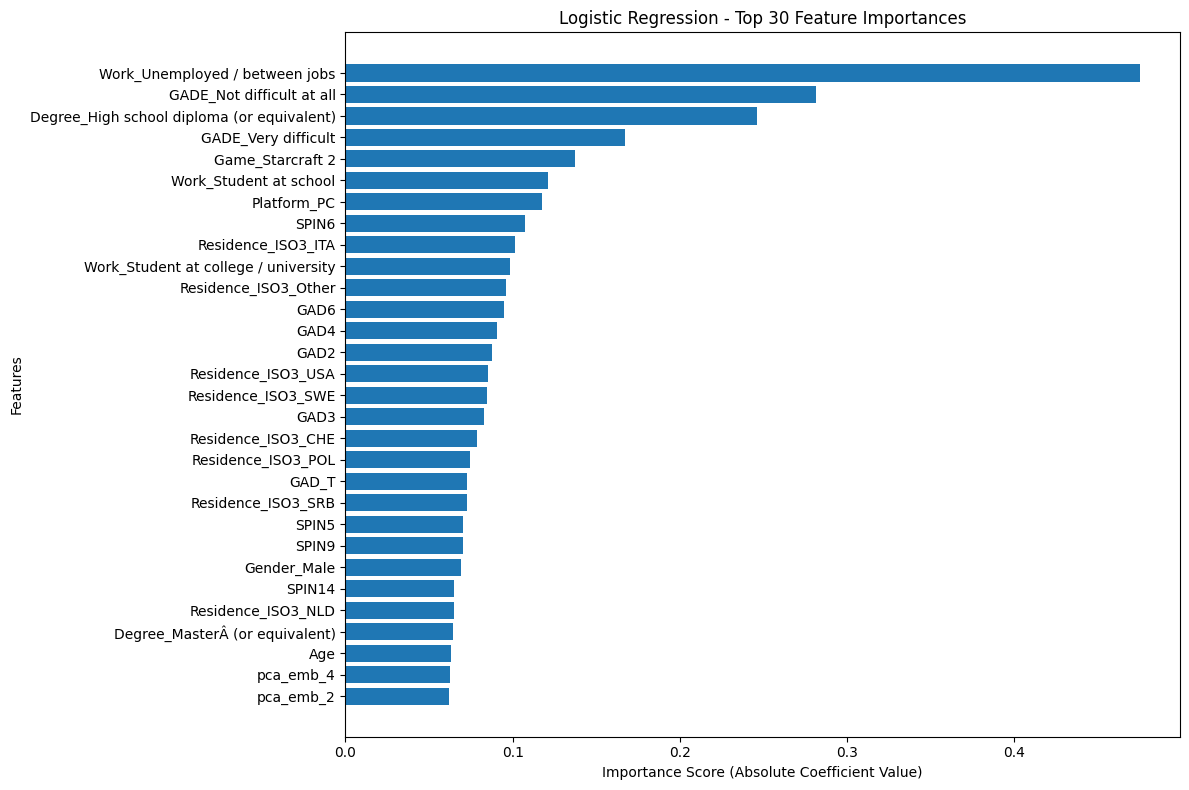

In [ ]:
# Get feature importances from logistic regression

logistic_step = logreg_model.named_steps['classifier']

# Get coefficients from the logistic regression step
logreg_importances = abs(logistic_step.coef_[0])

# Make sure we have feature names
# This assumes X_train_rfecv_xgb contains your feature names
logreg_feature_names = X_train_rfecv_xgb.columns

# Create a DataFrame for plotting
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame with feature names and importance scores
logreg_feat_imp_df = pd.DataFrame({
    'Feature': logreg_feature_names,
    'Importance': logreg_importances
}).sort_values(by='Importance', ascending=False)

# Plot top 30 features
plt.figure(figsize=(12, 8))
plt.barh(logreg_feat_imp_df['Feature'][:30][::-1], logreg_feat_imp_df['Importance'][:30][::-1])
plt.title("Logistic Regression - Top 30 Feature Importances")
plt.xlabel("Importance Score (Absolute Coefficient Value)")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("LogisticReg_top30features.pdf", format='pdf', bbox_inches='tight')
plt.show()

LOGISTICREGRESSION_CONFUSION MATRIX


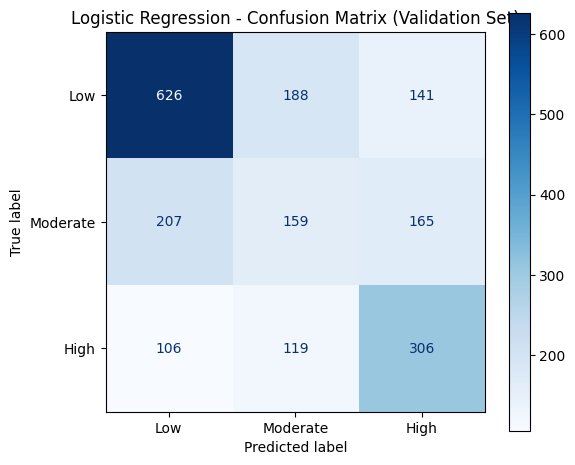

Logistic Regression - Classification Report (Validation Set)
              precision    recall  f1-score   support

         Low       0.67      0.66      0.66       955
    Moderate       0.34      0.30      0.32       531
        High       0.50      0.58      0.54       531

    accuracy                           0.54      2017
   macro avg       0.50      0.51      0.51      2017
weighted avg       0.54      0.54      0.54      2017

Overall F1-macro: 0.5051

Class: Low
  Sensitivity/Recall: 0.6555
  Specificity: 0.7053
  Precision: 0.6667
  F1 Score: 0.6610

Class: Moderate
  Sensitivity/Recall: 0.2994
  Specificity: 0.7934
  Precision: 0.3412
  F1 Score: 0.3190

Class: High
  Sensitivity/Recall: 0.5763
  Specificity: 0.7941
  Precision: 0.5000
  F1 Score: 0.5354


In [ ]:
# Create a confusion matrix for logistic regression model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Assuming you have these variables available:
# - logreg_model: your trained logistic regression model (or pipeline)
# - X_val: your validation features
# - y_val_raw: your validation labels

# Get predictions
y_val_pred = logreg_model.predict(X_val_rfecv_xgb)

# Create the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Create a ConfusionMatrixDisplay for better visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Moderate", "High"])
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(cmap='Blues', ax=ax)
plt.title("Logistic Regression - Confusion Matrix (Validation Set)")
plt.tight_layout()

# Save for Overleaf (PDF vector format)
plt.savefig("LogisticReg_ConfusionMatrix_Validation.pdf", format='pdf', bbox_inches='tight')
plt.show()

# Print classification report with proper class labels
print("Logistic Regression - Classification Report (Validation Set)")
print(classification_report(y_val, y_val_pred, target_names=["Low", "Moderate", "High"]))

f1_macro = f1_score(y_val, y_val_pred, average='macro')
print(f"Overall F1-macro: {f1_macro:.4f}")


# Calculate class-specific metrics
class_names = ["Low", "Moderate", "High"]
for i, class_name in enumerate(class_names):
    true_positive = cm[i, i]
    false_negative = sum(cm[i, :]) - true_positive
    false_positive = sum(cm[:, i]) - true_positive
    true_negative = np.sum(cm) - true_positive - false_negative - false_positive

    # Calculate metrics
    sensitivity = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0

    print(f"\nClass: {class_name}")
    print(f"  Sensitivity/Recall: {sensitivity:.4f}")
    print(f"  Specificity: {specificity:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  F1 Score: {f1:.4f}")

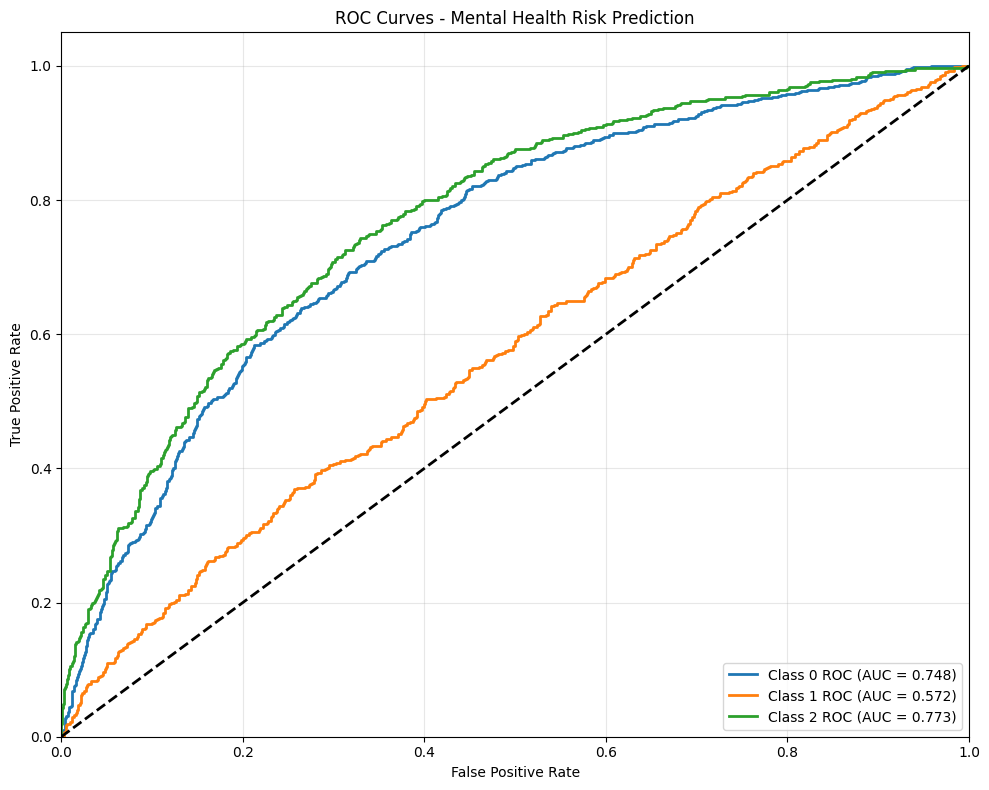

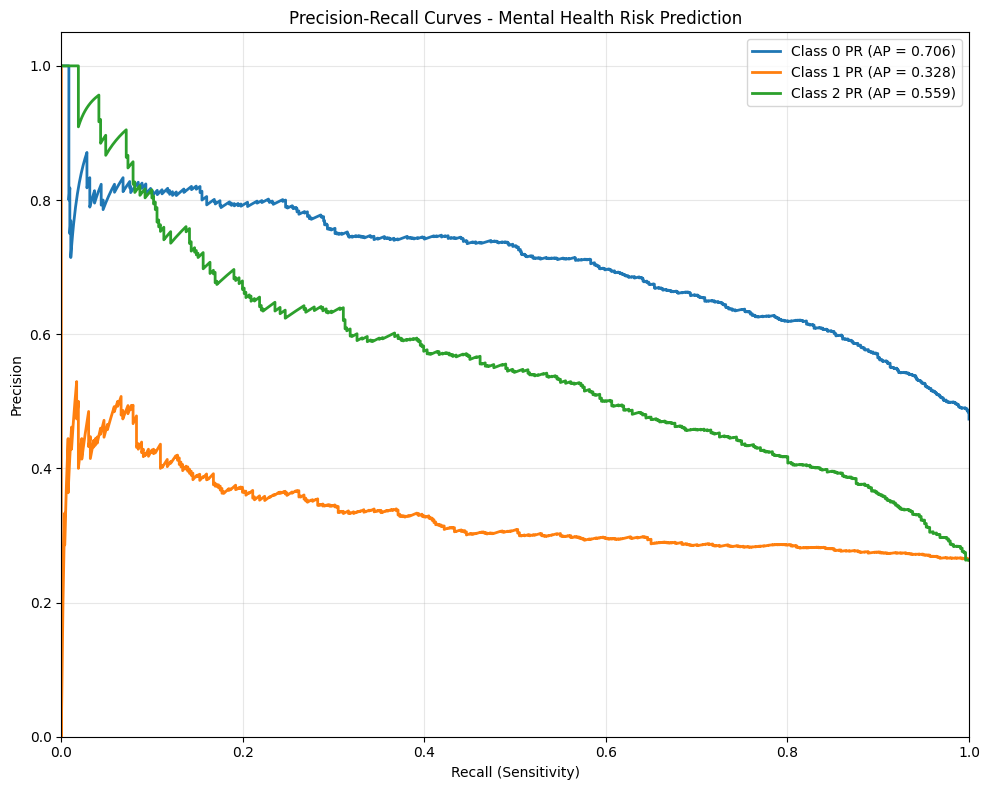


--- Model Performance Summary (Validation Set) ---
Macro-average ROC AUC: 0.6978
Macro-average Average Precision (AP): 0.5307

Per-Class ROC AUC and AP Scores:
- Low Risk: ROC AUC = 0.7485, AP = 0.7058
- Moderate Risk: ROC AUC = 0.5724, AP = 0.3277
- High Risk: ROC AUC = 0.7726, AP = 0.5587


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (roc_curve, roc_auc_score, precision_recall_curve,
                             average_precision_score, auc)

# Prediction probabilities for each class
y_prob = logreg_model.predict_proba(X_val_rfecv_xgb)
y_true = y_val  # Actual mental health risk levels (0: Low, 1: Moderate, 2: High)

n_classes = len(np.unique(y_true))

# ROC Curves for Multiclass Classification (One-vs-Rest)
plt.figure(figsize=(10, 8))
roc_aucs = []

for class_idx in range(n_classes):
    y_true_binary = (y_true == class_idx).astype(int)
    y_prob_class = y_prob[:, class_idx]

    fpr, tpr, _ = roc_curve(y_true_binary, y_prob_class)
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)

    plt.plot(fpr, tpr, lw=2, label=f'Class {class_idx} ROC (AUC = {roc_auc:.3f})')

# Plot random classifier line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Mental Health Risk Prediction')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("LogReg_MentalHealth_ROC.pdf", format='pdf', bbox_inches='tight')
plt.show()

# Precision-Recall Curves for Multiclass Classification
plt.figure(figsize=(10, 8))
average_precisions = []

for class_idx in range(n_classes):
    y_true_binary = (y_true == class_idx).astype(int)
    y_prob_class = y_prob[:, class_idx]

    precision, recall, _ = precision_recall_curve(y_true_binary, y_prob_class)
    ap = average_precision_score(y_true_binary, y_prob_class)
    average_precisions.append(ap)

    plt.plot(recall, precision, lw=2, label=f'Class {class_idx} PR (AP = {ap:.3f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves - Mental Health Risk Prediction')
plt.legend(loc="best")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("LogReg_MentalHealth_PR.pdf", format='pdf', bbox_inches='tight')
plt.show()

# Final Summary of Results
macro_roc_auc = np.mean(roc_aucs)
macro_ap = np.mean(average_precisions)

print("\n--- Model Performance Summary (Validation Set) ---")
print(f"Macro-average ROC AUC: {macro_roc_auc:.4f}")
print(f"Macro-average Average Precision (AP): {macro_ap:.4f}")
print("\nPer-Class ROC AUC and AP Scores:")
for class_idx in range(n_classes):
    label_name = ["Low Risk", "Moderate Risk", "High Risk"][class_idx]
    print(f"- {label_name}: ROC AUC = {roc_aucs[class_idx]:.4f}, AP = {average_precisions[class_idx]:.4f}")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap

# Data and Model
X_val_np = np.asarray(X_val_rfecv_xgb, dtype=np.float64)  # Features for SHAP
y_true = y_val  # Encoded target: 0 (Low), 1 (Moderate), 2 (High)

# Feature Names
feature_names = X_val_rfecv_xgb.columns.tolist() if isinstance(X_val_rfecv_xgb, pd.DataFrame) else [f'Feature_{i}' for i in range(X_val_np.shape[1])]

# Get the base model if using Pipeline
base_model = logreg_model.named_steps['classifier'] if hasattr(logreg_model, 'named_steps') else logreg_model


In [ ]:
explainer = shap.Explainer(base_model, X_val_np)

shap_values = explainer(X_val_np)  # This returns a proper Explanation object
print(f"SHAP values shape: {shap_values.values.shape}")  # Should be (n_samples, n_classes, n_features)


SHAP values shape: (2017, 99, 3)


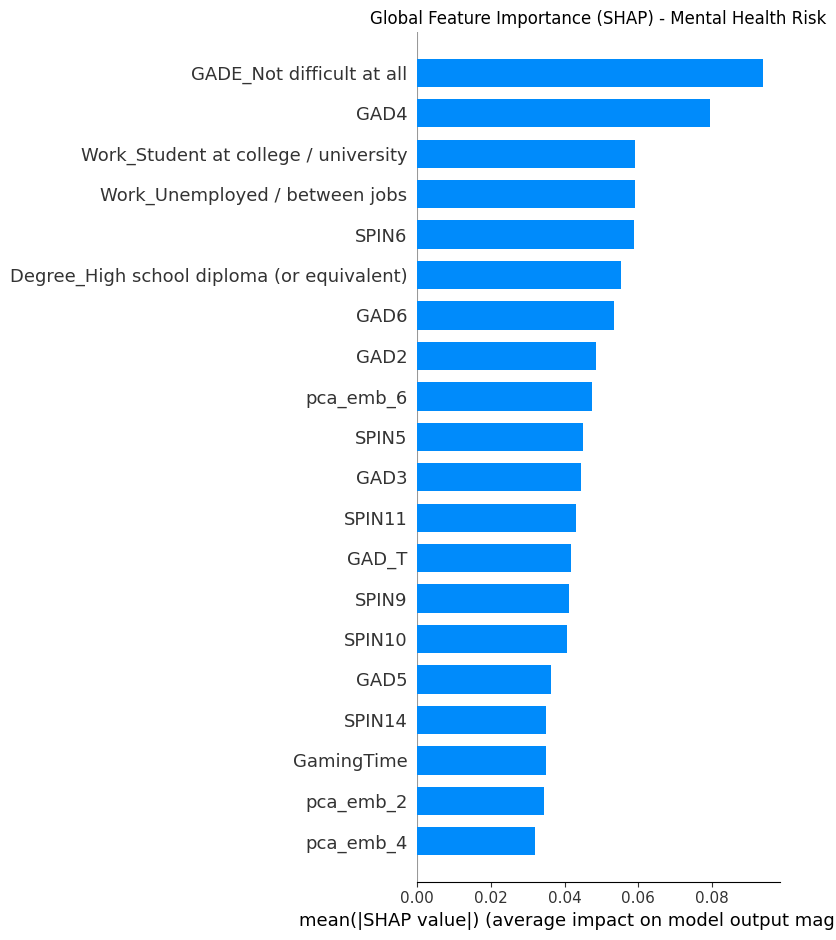

In [ ]:
# Aggregate SHAP values over classes (axis=2 is classes)
shap_values_avg = np.mean(np.abs(shap_values.values), axis=2)  # Result shape: (n_samples, n_features)

plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values_avg,
    X_val_np,
    feature_names=feature_names,
    plot_type="bar",
    show=False
)
plt.title('Global Feature Importance (SHAP) - Mental Health Risk')
plt.tight_layout()
plt.savefig('shap_global_importance_mental_health.pdf', bbox_inches='tight')
plt.show()



SHAP values shape: (2017, 99, 3)


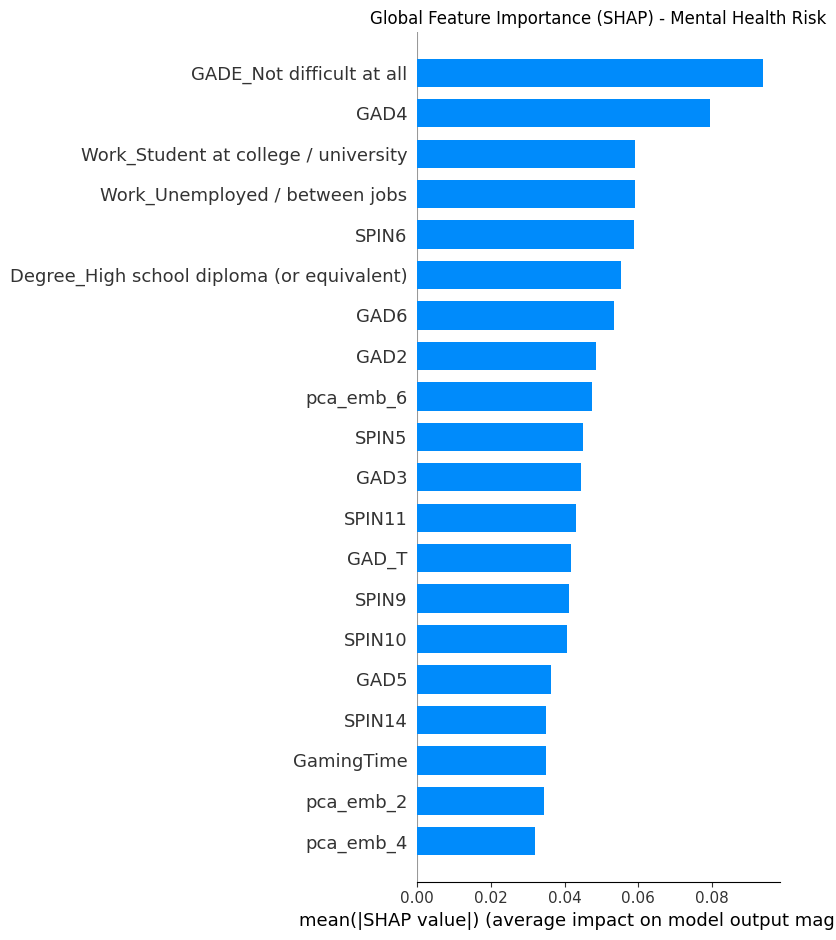

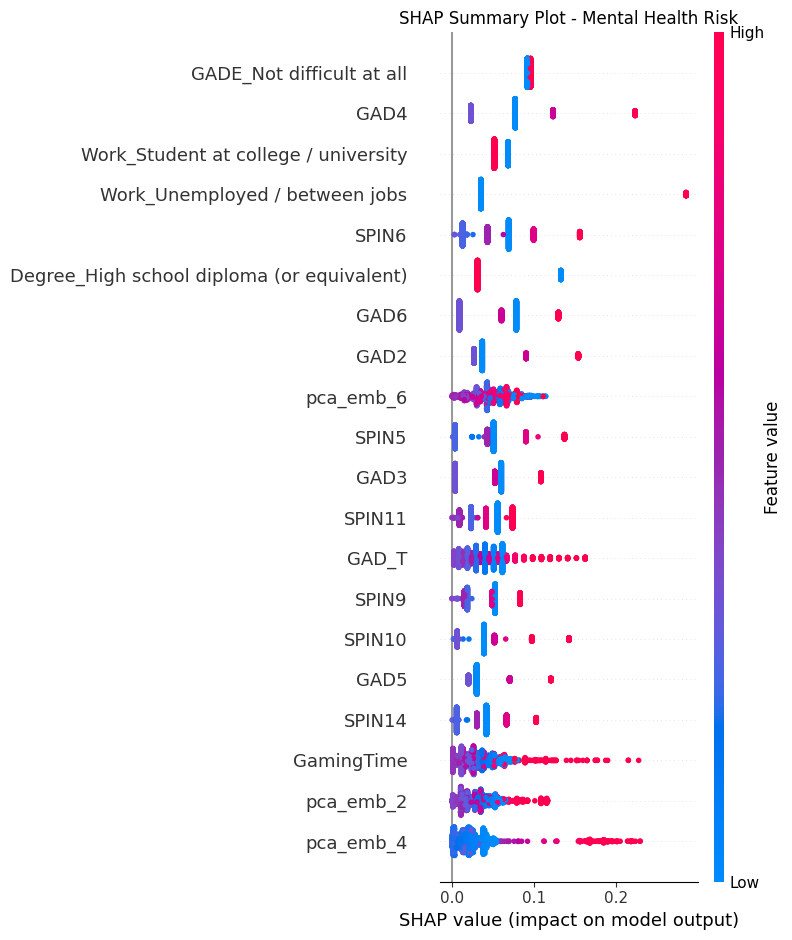

Total Validation Samples: 2017
Misclassified Samples: 926
Misclassification Rate: 45.91%


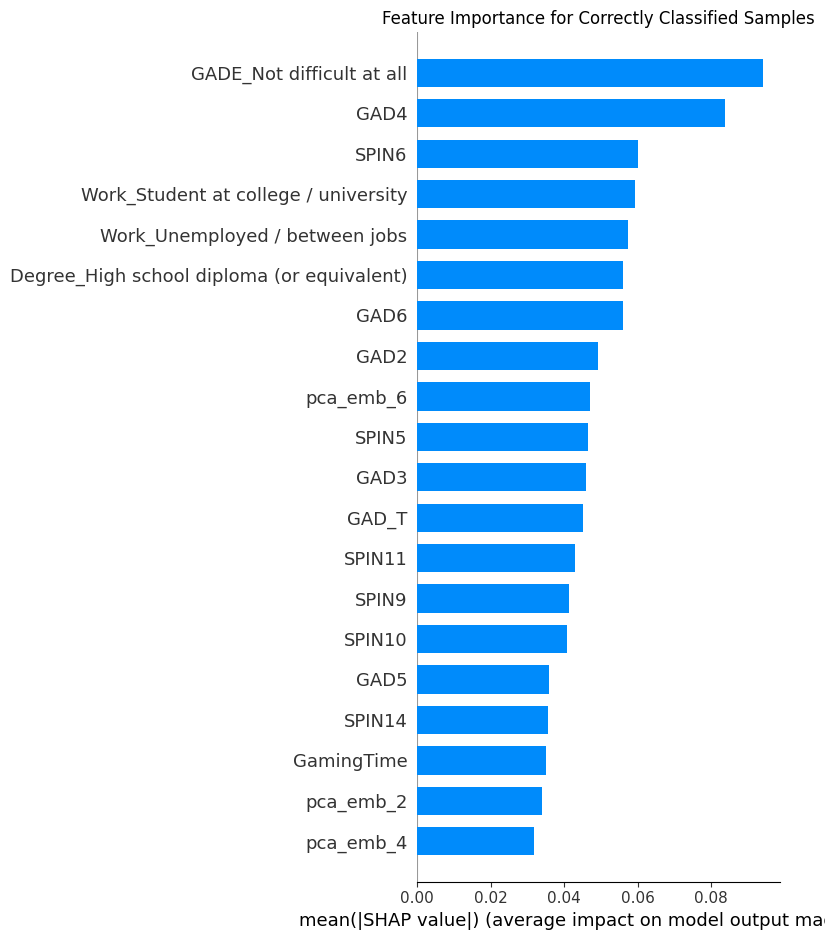

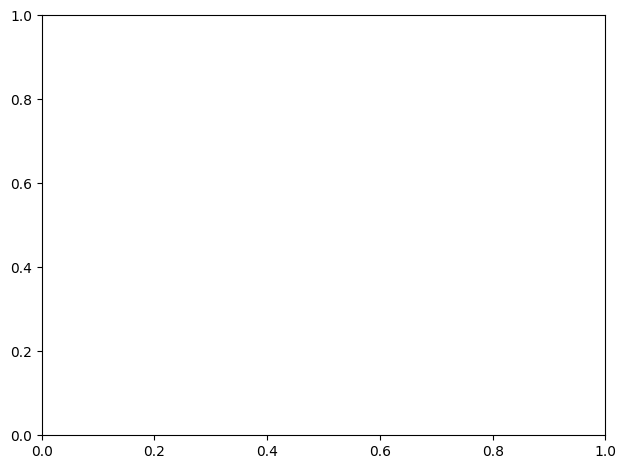

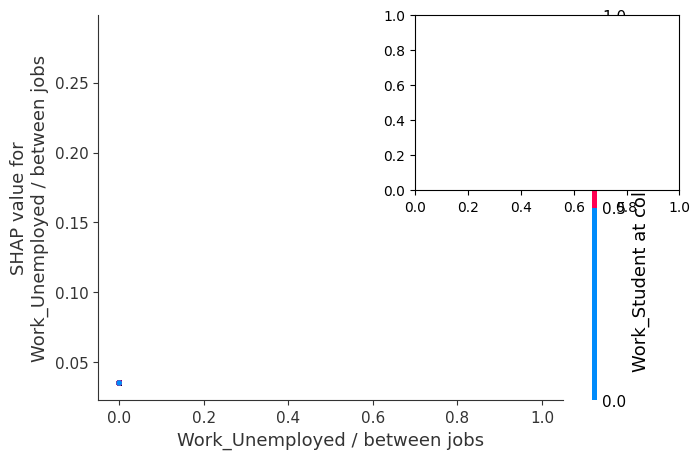

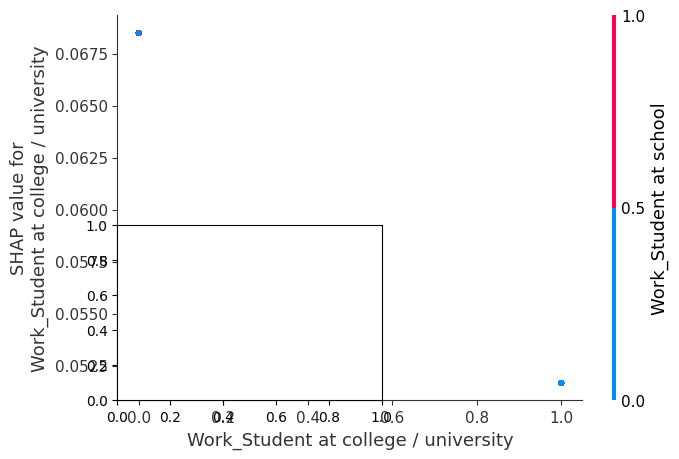

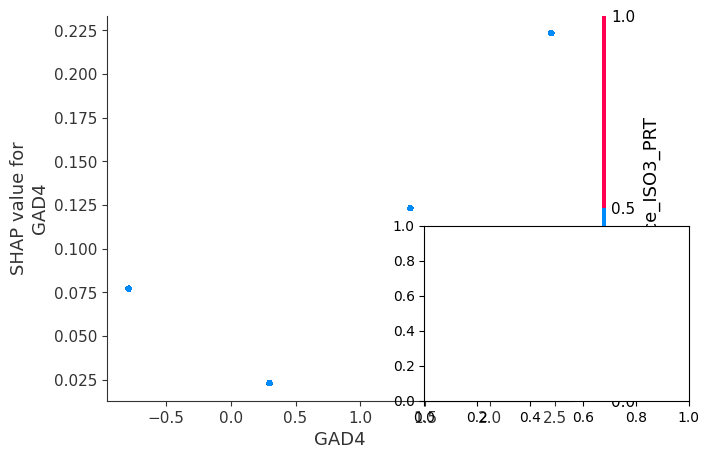

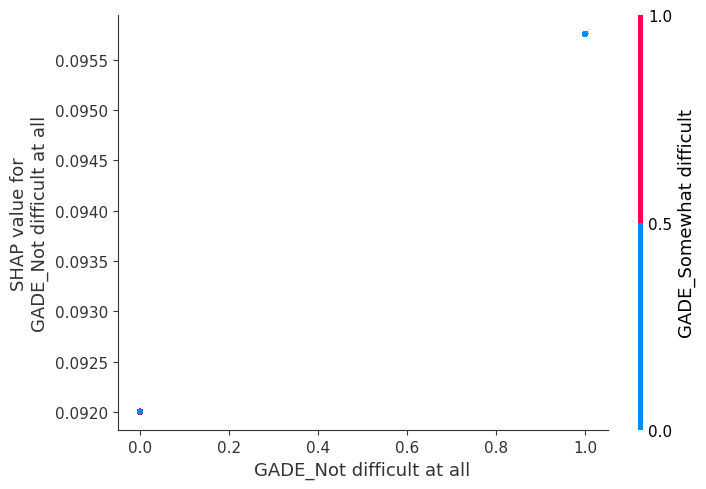

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap

# Prepare Data
X_val_np = np.asarray(X_val_rfecv_xgb, dtype=np.float64)
y_true = y_val  # Encoded target: 0 (Low), 1 (Moderate), 2 (High)

# Feature Names
if isinstance(X_val_rfecv_xgb, pd.DataFrame):
    feature_names = X_val_rfecv_xgb.columns.tolist()
else:
    feature_names = [f'Feature_{i}' for i in range(X_val_np.shape[1])]

# Extract Base Model
if hasattr(logreg_model, 'named_steps'):
    base_model = logreg_model.named_steps['classifier']
else:
    base_model = logreg_model


# Verify Shapes
print(f"SHAP values shape: {shap_values.shape}")



# Global Feature Importance Plot (Bar)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_avg, X_val_np, feature_names=feature_names, plot_type="bar", show=False)
plt.title('Global Feature Importance (SHAP) - Mental Health Risk')
plt.tight_layout()
plt.savefig('2shap_global_importance.pdf', bbox_inches='tight')
plt.show()

# Detailed SHAP Summary Plot (Beeswarm)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_avg, X_val_np, feature_names=feature_names, show=False)
plt.title('SHAP Summary Plot - Mental Health Risk')
plt.tight_layout()
plt.savefig('1shap_summary_plot.pdf', bbox_inches='tight')
plt.show()

# Error Analysis
y_pred = logreg_model.predict(X_val_rfecv_xgb)
y_pred_proba = logreg_model.predict_proba(X_val_rfecv_xgb)
misclassified_mask = y_true != y_pred

print(f"Total Validation Samples: {len(y_true)}")
print(f"Misclassified Samples: {misclassified_mask.sum()}")
print(f"Misclassification Rate: {misclassified_mask.mean():.2%}")

# SHAP Misclassification Analysis
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
shap.summary_plot(
    shap_values_avg[misclassified_mask],
    X_val_np[misclassified_mask],
    feature_names=feature_names, plot_type="bar", show=False
)
plt.title('Feature Importance for Misclassified Samples')

plt.subplot(2, 1, 2)
shap.summary_plot(
    shap_values_avg[~misclassified_mask],
    X_val_np[~misclassified_mask],
    feature_names=feature_names, plot_type="bar", show=False
)
plt.title('Feature Importance for Correctly Classified Samples')

plt.tight_layout()
plt.savefig('3shap_misclassification_comparison.pdf', bbox_inches='tight')
plt.show()

# SHAP Dependence Plots for Top Features
mean_shap_importance = np.mean(shap_values_avg, axis=0)
top_feature_indices = np.argsort(mean_shap_importance)[-4:]

plt.figure(figsize=(16, 12))
for idx, feature_idx in enumerate(top_feature_indices, 1):
    plt.subplot(2, 2, idx)
    shap.dependence_plot(
        feature_idx,
        shap_values_avg,
        X_val_np,
        feature_names=feature_names,
        show=False
    )
plt.tight_layout()
plt.savefig('4shap_feature_dependence.pdf', bbox_inches='tight')
plt.show()


In [ ]:
# Detailed Error Analysis
error_analysis_df = pd.DataFrame({
    'Actual': y_val,
    'Predicted': y_pred,
    'Prediction_Probability': np.max(y_pred_proba, axis=1),
    'Is_Misclassified': misclassified_mask
})

# Add SHAP values for each feature to the error analysis DataFrame
for i, feature_name in enumerate(feature_names):
    error_analysis_df[f'SHAP_{feature_name}'] = shap_values[:, i]

# Sort misclassified instances by prediction probability
misclassified_df = error_analysis_df[error_analysis_df['Is_Misclassified']].sort_values('Prediction_Probability')

# Print summary of misclassification
print("Misclassification Summary:")
print(f"Total Instances: {len(y_val)}")
print(f"Misclassified Instances: {sum(misclassified_mask)}")
print(f"Misclassification Rate: {sum(misclassified_mask) / len(y_val):.4f}")



Misclassification Summary:
Total Instances: 2017
Misclassified Instances: 926
Misclassification Rate: 0.4591


SHAP shape: (2017, 99, 3)
X_val shape: (2017, 99)


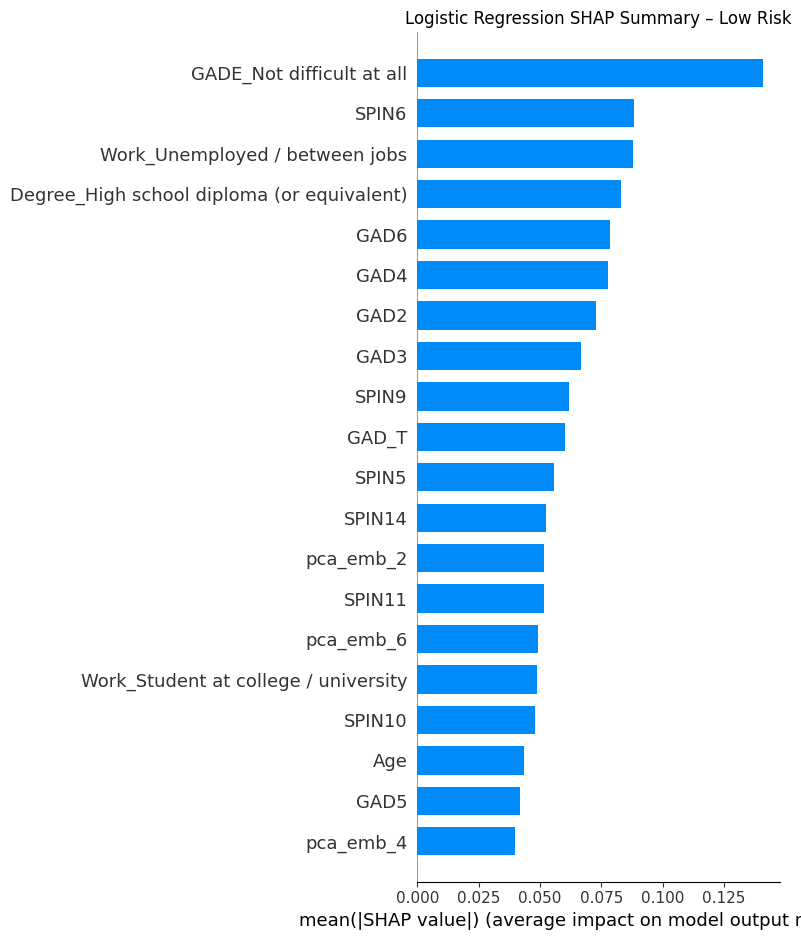

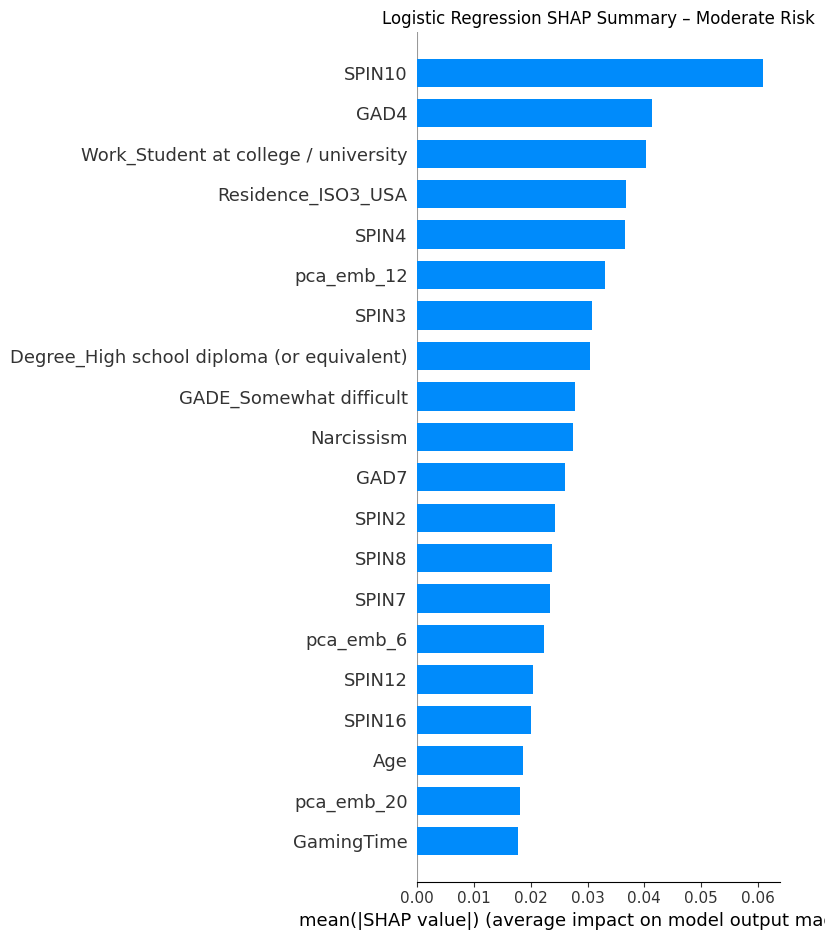

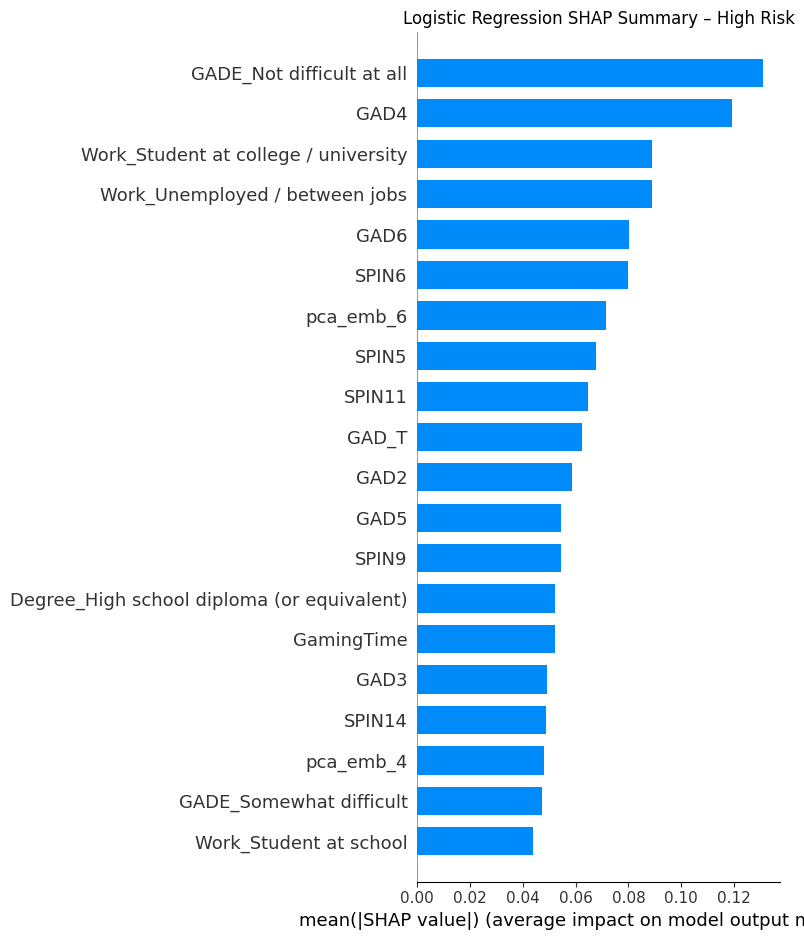

In [ ]:
##SHAP
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For multiclass problems, shap_values is a list or array with shape (n_classes, n_samples, n_features)
# For plotting a specific class, we need to extract the values for that class

# Print shapes to confirm dimensions
print(f"SHAP shape: {shap_values.shape}")
print(f"X_val shape: {X_val_rfecv_xgb.shape}")

# Define class names
class_names = ["Low Risk", "Moderate Risk", "High Risk"]  # Adjust as needed

# Loop through each class and create a plot
for i in range(3):  # 3 classes
    plt.figure(figsize=(10, 8))

    # Extract SHAP values for class i
    # The key is to reshape the data correctly - we need shape (n_samples, n_features)
    shap_values_for_class = shap_values[:, :, i]

    # Now call summary_plot with properly shaped data
    shap.summary_plot(
        shap_values_for_class,  # Shape should be (2017, 41)
        X_val_rfecv_xgb,
        feature_names=feature_names,
        plot_type="bar",
        show=False
    )

    plt.title(f"Logistic Regression SHAP Summary – {class_names[i]}")
    plt.tight_layout()
    plt.savefig(f"logref_shap_{class_names[i].lower().replace(' ', '_')}.pdf", format='pdf', bbox_inches='tight')
    plt.show()

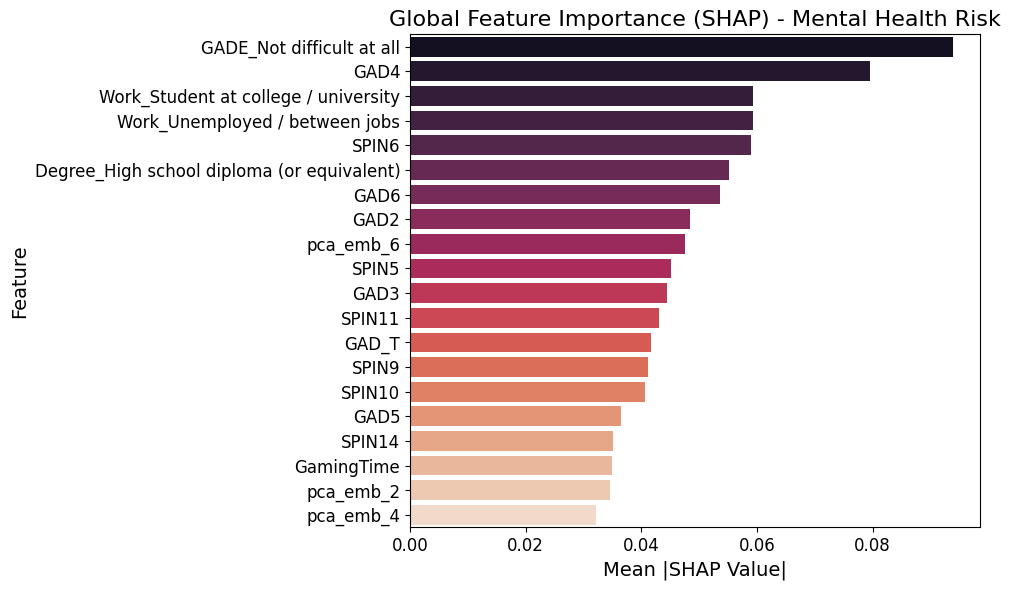

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate mean absolute SHAP values per feature
mean_abs_shap = np.mean(np.abs(shap_values_avg), axis=0)
shap_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean |SHAP|': mean_abs_shap
}).sort_values(by='Mean |SHAP|', ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=shap_importance_df,
    x='Mean |SHAP|',
    y='Feature',
    palette='rocket'
)
plt.title('Global Feature Importance (SHAP) - Mental Health Risk', fontsize=16)
plt.xlabel('Mean |SHAP Value|', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('val_shap_global_importance_consistent.pdf', bbox_inches='tight')
plt.show()


In [ ]:
#EVALUATION ON TEST SET

Logistic Regression - Test Set Evaluation
Accuracy:  0.5191
Precision: 0.4791
Recall:    0.4888
F1 Score:  0.4824
AUC OvR:   0.6916

Classification Report (Test Set):
              precision    recall  f1-score   support

         Low       0.64      0.63      0.64       956
    Moderate       0.31      0.26      0.28       531
        High       0.49      0.57      0.53       530

    accuracy                           0.52      2017
   macro avg       0.48      0.49      0.48      2017
weighted avg       0.51      0.52      0.52      2017



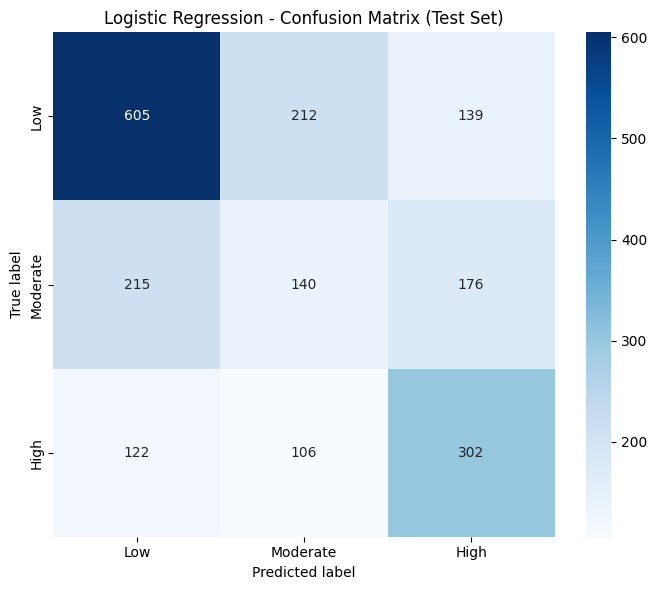

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix
)
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Predict
y_test_pred = logreg_model.predict(X_test_rfecv_xgb)
y_test_proba = logreg_model.predict_proba(X_test_rfecv_xgb)

# 2. Binarize labels for AUC (assuming 3 classes: 0, 1, 2)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# 3. Compute Evaluation Metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')
auc = roc_auc_score(y_test_bin, y_test_proba, average='macro', multi_class='ovr')

# 4. Print Results
print("Logistic Regression - Test Set Evaluation")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC OvR:   {auc:.4f}")

# 5. Classification Report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=["Low", "Moderate", "High"]))

# 6. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
             xticklabels=["Low", "Moderate", "High"],
             yticklabels=["Low", "Moderate", "High"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Logistic Regression - Confusion Matrix (Test Set)")
plt.tight_layout()
plt.savefig("logreg_confusion_matrix_test.pdf", format="pdf")
plt.show()


### ANOTHER MODEL EVALUAATION

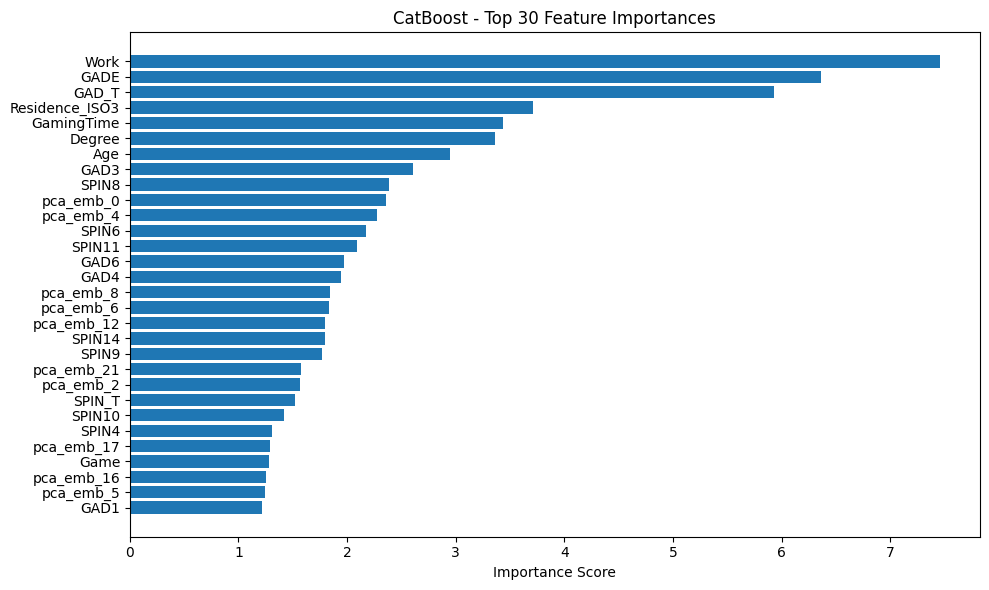

In [ ]:
# Get feature importances
catboost_importances = catboost_model.get_feature_importance()
catboost_feature_names = X_train_raw.columns

# Create a DataFrame for plotting
import pandas as pd
import matplotlib.pyplot as plt

catboost_feat_imp_df = pd.DataFrame({
    'Feature': catboost_feature_names,
    'Importance': catboost_importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15
plt.figure(figsize=(10, 6))
plt.barh(catboost_feat_imp_df['Feature'][:30][::-1], catboost_feat_imp_df['Importance'][:30][::-1])
plt.title("CatBoost - Top 30 Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig("Catboost_top30features.pdf", format='pdf', bbox_inches='tight')
plt.show()


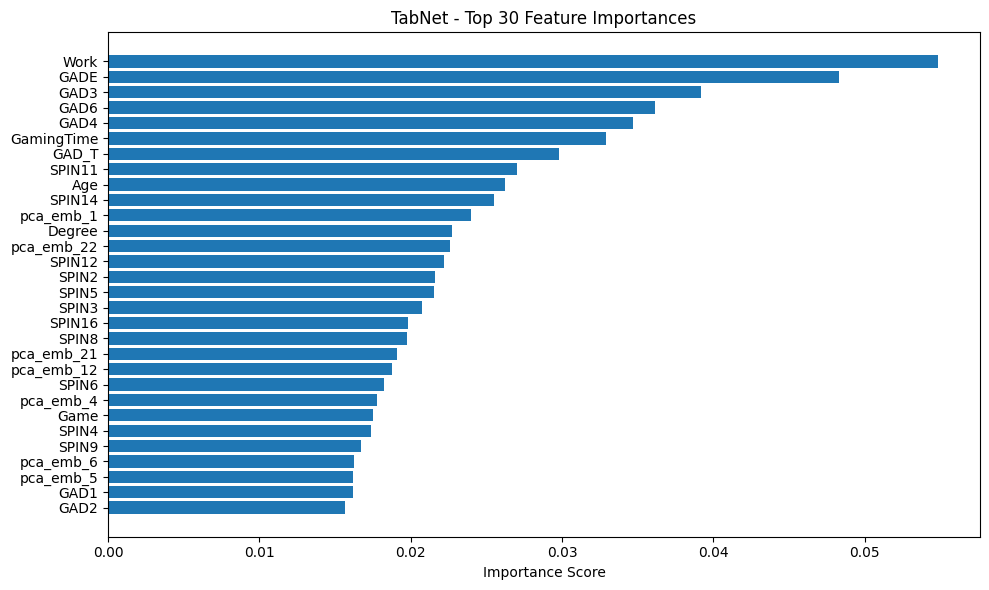

In [ ]:
tabnet_feature_importances = tabnet_model.feature_importances_

tabnet_feature_names = X_train_tabnet.columns

# Create DataFrame
tabnet_feat_imp_df = pd.DataFrame({
    'Feature': tabnet_feature_names,
    'Importance': tabnet_feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15
plt.figure(figsize=(10, 6))
plt.barh(tabnet_feat_imp_df['Feature'][:30][::-1], tabnet_feat_imp_df['Importance'][:30][::-1])
plt.title("TabNet - Top 30 Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig("Tabnet_top30features.pdf", format='pdf', bbox_inches='tight')
plt.show()

